In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## 데이터셋들

In [42]:
df = pd.read_csv("Customer_data.csv") #고객데이터
df

,고객ID,사용기기,사용OS,유입경로,회원상태,거주지,연령,성별,서비스총구매수,총구매금액,총수정요청수,총추가결제금액
0,1001010041,iPhone,iOS11.4.1,유튜브,정상회원,경기도,25.0,남성,1,44500.0,0.0,14500
1,10010100410,SM-N935S,Android7.0,검색광고,정상회원,경기도,26.0,NaN,1,44500.0,0.0,14500
2,100101004108,iPhone,iOS12.0,네이버블로그,정상회원,경기도,23.0,남성,1,34500.0,0.0,14500
3,100101004109,iPhone,iOS11.4.1,인스타그램,정상회원,경기도,20.0,남성,1,364500.0,0.0,14500
4,100101004112,iPhone,iOS11.4.1,직접검색,정상회원,경기도,28.0,남성,1,34500.0,0.0,14500
...,...,...,...,...,...,...,...,...,...,...,...,...
137521,9050206990,SM-N950N,Android8.0.0,유튜브,정상회원,경상도,21.0,남성,2,75000.0,0.0,20000
137522,9050206992,iPhone,iOS11.4,네이버카페,탈퇴,강원도,26.0,NaN,1,310000.0,0.0,10000
137523,9050206995,iPhone,iOS12.0,인스타그램,정상회원,강원도,28.0,남성,1,89000.0,0.0,10000
137524,9050206996,SM-G930S,Android8.0.0,네이버블로그,정상회원,강원도,43.0,남성,1,9000.0,1.0,4000


In [164]:
df1 = pd.read_csv("Expert_Data.csv") #판매자 데이터
df1

,판매자ID,판매자,판매 서비스 수,총 판매 금액,프리미엄 서비스 가입여부,신속 알람 서비스 사용여부
0,V2_0,김러그,326,147927420,가입,미사용
1,V2_1,디프라이,43,146832200,가입,미사용
2,V2_2,Sailorkr,14,140029000,가입,미사용
3,V2_3,신뢰할만한지식인65,16,130713200,가입,미사용
4,V2_4,에픽핫,18,126229400,가입,미사용
...,...,...,...,...,...,...
2061,V2_2061,web3expert,1,7800,미가입,미사용
2062,V2_2062,enos,2,6950,미가입,미사용
2063,V2_2063,K9027456501,1,5000,미가입,미사용
2064,V2_2064,승쿠딩,1,5000,가입,미사용


In [165]:
df2 = pd.read_csv("Log_Data02.csv") #거래데이터
df2

,거래일자,수수료율,고객ID,프로그램수정횟수,추가결제금액,거래취소여부,거래취소일자,서비스명,판매자,판매금액,서비스가격,평점,이용자수,대분류,서비스번호
0,20210201,6.5,5030100140,0.0,9800,NaN,NaN,"카페24,고도몰,메이크샵등 쇼핑몰 수정,코딩,유지보수",logf1,14800.0,5000.0,5.0,584.0,커머스,2102.0
1,20210201,6.5,8020105385,0.0,0,NaN,NaN,"카페24,고도몰,메이크샵등 쇼핑몰 수정,코딩,유지보수",logf1,5000.0,5000.0,5.0,584.0,커머스,2102.0
2,20210201,6.5,110104033157,0.0,9200,NaN,NaN,"엑셀 VBA, 매크로, ERP 프로그램 개발해 드립니다.",엑셀의신,19200.0,10000.0,5.0,583.0,데이터,2103.0
3,20210201,7.5,40203001176,0.0,11000,NaN,NaN,"엑셀을 이용 서식과 집계, 분석 및 VBA 프로그래밍",태구리,61000.0,50000.0,5.0,504.0,데이터,2105.0
4,20210201,6.5,5041700297,0.0,0,NaN,NaN,"엑셀을 이용 서식과 집계, 분석 및 VBA 프로그래밍",태구리,50000.0,50000.0,5.0,504.0,데이터,2105.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344294,20210630,9.0,50150001196,0.0,0,NaN,NaN,데이터 분석 및 시각화 제공해 드립니다.,전문가오리,20000.0,20000.0,4.6,33.0,데이터,2600.0
344295,20210630,7.5,60107010137,0.0,0,NaN,NaN,데이터 분석 및 시각화 제공해 드립니다.,전문가오리,20000.0,20000.0,4.6,33.0,데이터,2600.0
344296,20210630,9.0,70406002101,0.0,0,NaN,NaN,데이터 분석 및 시각화 제공해 드립니다.,전문가오리,20000.0,20000.0,4.6,33.0,데이터,2600.0
344297,20210630,6.5,9010306354,0.0,0,NaN,NaN,데이터 분석 및 시각화 제공해 드립니다.,전문가오리,20000.0,20000.0,4.6,33.0,데이터,2600.0


In [185]:
df2.isnull().sum()

거래일자             0
수수료율             0
고객ID             0
프로그램수정횟수         0
추가결제금액           0
거래취소여부      339702
거래취소일자      339702
서비스명            22
판매자             22
판매금액            21
서비스가격           22
평점              22
이용자수            22
대분류             22
서비스번호           22
dtype: int64

In [197]:
df3 = pd.read_csv("Service_Data.csv") #서비스 고정가
df3

,서비스명,판매자,서비스가격,평점,대분류,서비스번호,판매수
0,"""P2P 대출"" 서비스를 위한 기획을 해 드립니다.",디자인쇼크리더,400000.0,0.0,기획,5651.0,6
1,"""반응형 웹 퍼블리싱"" 모든 퍼블리싱 작업 맞춤 진행",ThunDesign,15000.0,0.0,홈페이지,6122.0,1
2,"""이커머스 웹 사이트개발 경력자""의 쇼핑몰 제작",IAMTRY,500000.0,0.0,커머스,6152.0,3
3,.NET C# 개발. WPF 또는 WinForms,혼살,1200000.0,5.0,프로그래밍,5009.0,1
4,".NET, c# 응용프로그램 개발, delphi",JAVASCRIPT,60000.0,5.0,프로그램,4419.0,10
...,...,...,...,...,...,...,...
4154,"회로 설계 , PCB Artwork, 시제품 개발해 드립니다.",mangolab,50000.0,5.0,프로그래밍,4985.0,7
4155,"회로 설계, PCB 제작, 아두이노, 3D 프린팅",이즈Circuit,55000.0,4.9,프로그래밍,2390.0,18
4156,회로/PCB/펌웨어/AVR/아두이노제작 해 드립니다.,SWMJ,25000.0,5.0,UnReal,3141.0,3
4157,효과적인 연락처 수집용 랜딩페이지 제작해 드립니다.,안단테연구소,300000.0,5.0,프로그래밍,4911.0,6


#### 거래 취소에 대해서

In [176]:
unique_values = df2['거래취소여부'].unique()
unique_values

array([nan,  1.])

In [184]:
cancel = df2[df2['거래취소여부'] == 1]
cancel

,거래일자,수수료율,고객ID,프로그램수정횟수,추가결제금액,거래취소여부,거래취소일자,서비스명,판매자,판매금액,서비스가격,평점,이용자수,대분류,서비스번호
174,20210201,7.5,10020100522,-1.0,0,1.0,20210201.0,고퀄리티 반응형 홈페이지를 드립니다.,포인원,0.0,270000.0,5.0,207.0,홈페이지,2146.0
246,20210201,9.0,130202005142,-1.0,0,1.0,20210201.0,사람 일을 대신하는 메크로 프로그램 개발해 드립니다.,오토프로메이커,0.0,33000.0,5.0,179.0,프로그램,2168.0
248,20210201,6.5,13020200731,-1.0,0,1.0,20210201.0,사람 일을 대신하는 메크로 프로그램 개발해 드립니다.,오토프로메이커,0.0,33000.0,5.0,179.0,프로그램,2168.0
297,20210201,6.5,10201029167,-1.0,0,1.0,20210201.0,1일이내 작업가능 웹퍼블리싱 작업해 드립니다.,var,0.0,50000.0,5.0,150.0,홈페이지,2189.0
299,20210201,6.5,4010201972,-1.0,0,1.0,20210201.0,1일이내 작업가능 웹퍼블리싱 작업해 드립니다.,var,0.0,50000.0,5.0,150.0,홈페이지,2189.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343843,20210630,6.5,10020100351,-1.0,0,1.0,20210630.0,웹사이트 오류 버그 수정해 드립니다.,Tabago,0.0,5000.0,5.0,12.0,홈페이지,3151.0
343845,20210630,6.5,1002010055,-1.0,0,1.0,20210630.0,웹사이트 오류 버그 수정해 드립니다.,Tabago,0.0,5000.0,5.0,12.0,홈페이지,3151.0
343851,20210630,7.5,5050800558,-1.0,0,1.0,20210630.0,퍼블리싱 웹퍼블리싱 반응형 js간단한 애니메이션 작업해 드립니다.,토드로,0.0,50000.0,5.0,18.0,홈페이지,2911.0
343853,20210630,6.5,602050077,-1.0,0,1.0,20210630.0,퍼블리싱 웹퍼블리싱 반응형 js간단한 애니메이션 작업해 드립니다.,토드로,0.0,50000.0,5.0,18.0,홈페이지,2911.0


In [207]:
cancel_df = cancel[cancel['프로그램수정횟수'].isin([0, 1])]
cancel_df

,거래일자,수수료율,고객ID,프로그램수정횟수,추가결제금액,거래취소여부,거래취소일자,서비스명,판매자,판매금액,서비스가격,평점,이용자수,대분류,서비스번호,취소까지_소요일
64873,2021-01-08,6.5,30203005155,0.0,0,1.0,2021-01-08,간단한 아두이노 장치 제작해 드립니다.,수제비1,50000.0,50000.0,4.9,269.0,프로그래밍,2130.0,0
73811,2021-01-12,7.5,40113052150,1.0,12800,1.0,2021-01-11,홈페이지 유지보수 및 추가기능 개발해 드립니다.,코딩팝,22800.0,10000.0,5.0,13.0,홈페이지,3072.0,-1
119703,2021-03-05,6.5,705010014,0.0,6200,1.0,2021-03-05,반응형 퍼블리싱 랜딩페이지 코딩해 드립니다.,씽씽패밀리,36200.0,30000.0,5.0,22.0,홈페이지,2803.0,0
120722,2021-03-06,9.0,5030100120,0.0,7800,1.0,2021-03-06,"경력 17년 VBA 크롤링, 데이터관리를 위해 만들어 드립니다.",EBConsulting,37800.0,30000.0,5.0,27.0,데이터,2685.0,0
257704,2021-05-18,6.5,50421001142,1.0,3700,1.0,2021-05-18,"카페24,고도몰,메이크샵 쇼핑몰 수정 및 유지보수 전문",STUDIOVIE,8700.0,5000.0,5.0,61.0,커머스,2381.0,0
325024,2021-06-21,6.5,6040133988,0.0,0,1.0,2021-06-20,"React, Html 웹 페이지 제작 전문 프론트엔드",임쁘띠,100000.0,100000.0,5.0,57.0,홈페이지,2399.0,-1


In [208]:
cancel_df = pd.merge(cancel_df, df, on='고객ID', how='inner')
cancel_df

,거래일자,수수료율,고객ID,프로그램수정횟수,추가결제금액,거래취소여부,거래취소일자,서비스명,판매자,판매금액,...,사용OS,유입경로,회원상태,거주지,연령,성별,서비스총구매수,총구매금액,총수정요청수,총추가결제금액
0,2021-01-08,6.5,30203005155,0.0,0,1.0,2021-01-08,간단한 아두이노 장치 제작해 드립니다.,수제비1,50000.0,...,iOS12.0,유튜브,정상회원,경기도,21.0,여성,1,50000.0,0.0,0
1,2021-01-12,7.5,40113052150,1.0,12800,1.0,2021-01-11,홈페이지 유지보수 및 추가기능 개발해 드립니다.,코딩팝,22800.0,...,iOS11.4.1,유튜브,정상회원,충청도,23.0,여성,4,63300.0,1.0,26300
2,2021-03-05,6.5,705010014,0.0,6200,1.0,2021-03-05,반응형 퍼블리싱 랜딩페이지 코딩해 드립니다.,씽씽패밀리,36200.0,...,iOS11.4.1,유튜브,정상회원,서울시,30.0,여성,1,36200.0,0.0,6200
3,2021-03-06,9.0,5030100120,0.0,7800,1.0,2021-03-06,"경력 17년 VBA 크롤링, 데이터관리를 위해 만들어 드립니다.",EBConsulting,37800.0,...,Android7.1.1,네이버카페,정상회원,경기도,28.0,남성,14,707000.0,1.0,133000
4,2021-05-18,6.5,50421001142,1.0,3700,1.0,2021-05-18,"카페24,고도몰,메이크샵 쇼핑몰 수정 및 유지보수 전문",STUDIOVIE,8700.0,...,Android8.0.0,유튜브,정상회원,경기도,20.0,남성,1,8700.0,1.0,3700
5,2021-06-21,6.5,6040133988,0.0,0,1.0,2021-06-20,"React, Html 웹 페이지 제작 전문 프론트엔드",임쁘띠,100000.0,...,Android8.0.0,NaN,정상회원,서울시,25.0,남성,1,100000.0,0.0,0


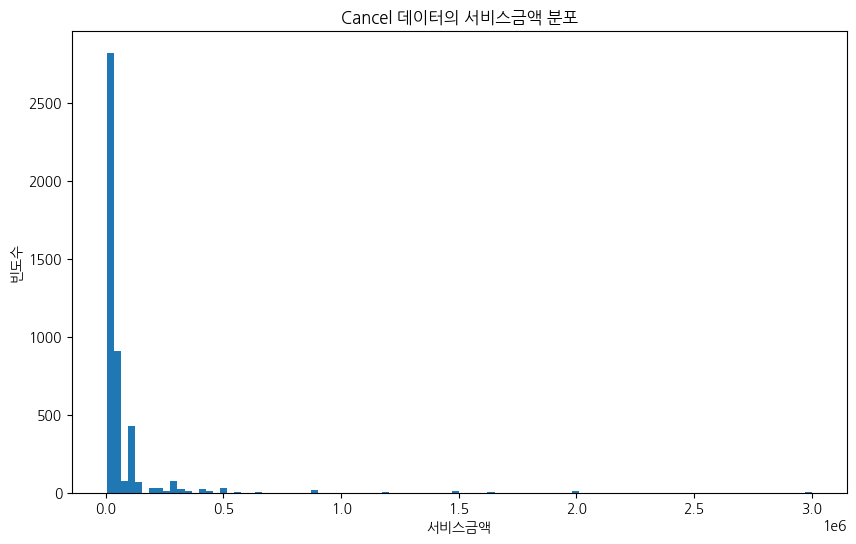

In [187]:
plt.figure(figsize=(10, 6))
plt.hist(cancel['서비스가격'].dropna(), bins=100)  
plt.title('Cancel 데이터의 서비스금액 분포')
plt.xlabel('서비스금액')
plt.ylabel('빈도수')
plt.show()

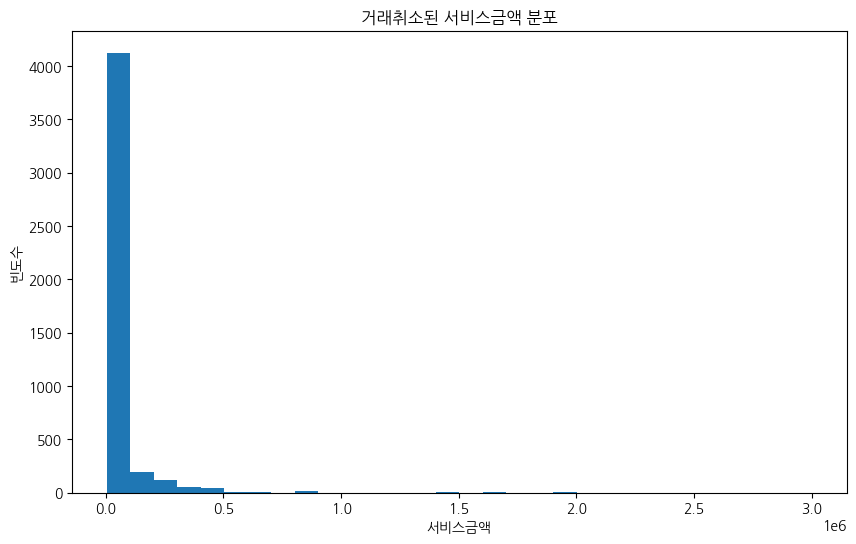

In [188]:
plt.figure(figsize=(10, 6))
plt.hist(cancel['서비스가격'].dropna(), bins=30) 
plt.title('거래취소된 서비스금액 분포')
plt.xlabel('서비스금액')
plt.ylabel('빈도수')
plt.show()

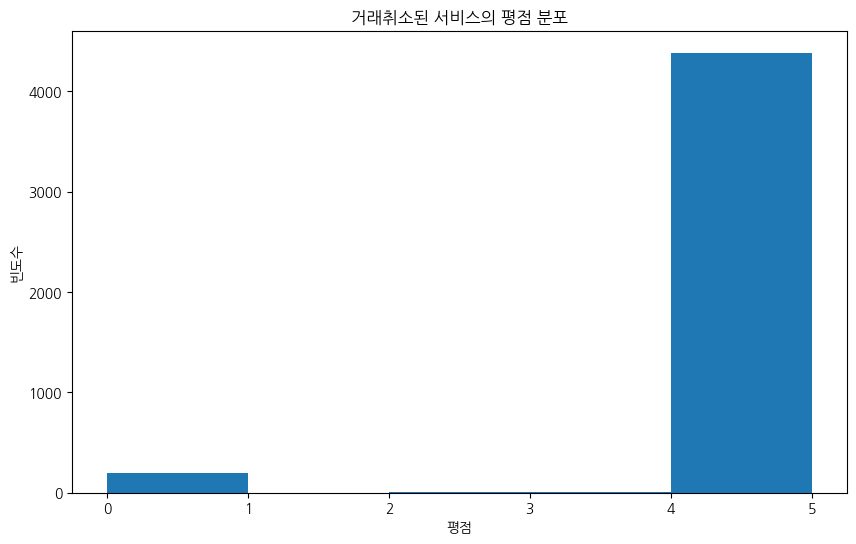

In [189]:
plt.figure(figsize=(10, 6))
plt.hist(cancel['평점'], bins=5, range=(0, 5)) 
plt.title('거래취소된 서비스의 평점 분포')
plt.xlabel('평점')
plt.ylabel('빈도수')
plt.show()


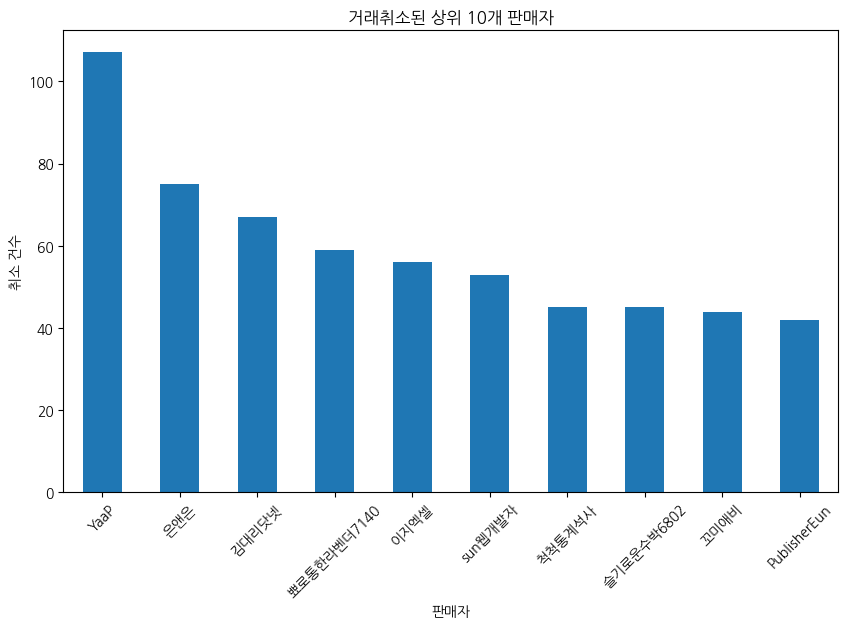

In [190]:
cancel_seller_counts = cancel['판매자'].value_counts().head(10)  # 상위 10개 판매자
plt.figure(figsize=(10, 6))
cancel_seller_counts.plot(kind='bar')
plt.title('거래취소된 상위 10개 판매자')
plt.xlabel('판매자')
plt.ylabel('취소 건수')
plt.xticks(rotation=45)
plt.show()

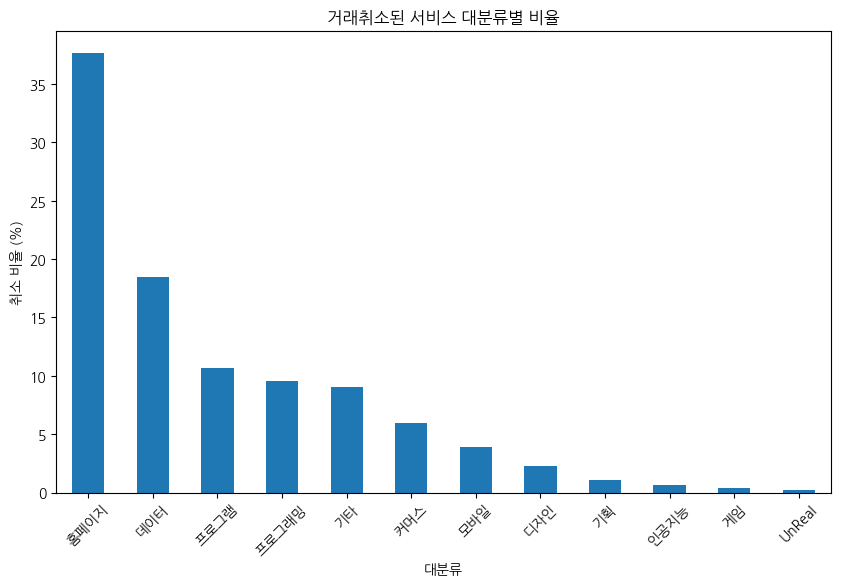

In [191]:
cancel_category_counts = cancel['대분류'].value_counts(normalize=True) * 100  # 백분율로 계산
plt.figure(figsize=(10, 6))
cancel_category_counts.plot(kind='bar')
plt.title('거래취소된 서비스 대분류별 비율')
plt.xlabel('대분류')
plt.ylabel('취소 비율 (%)')
plt.xticks(rotation=45)
plt.show()

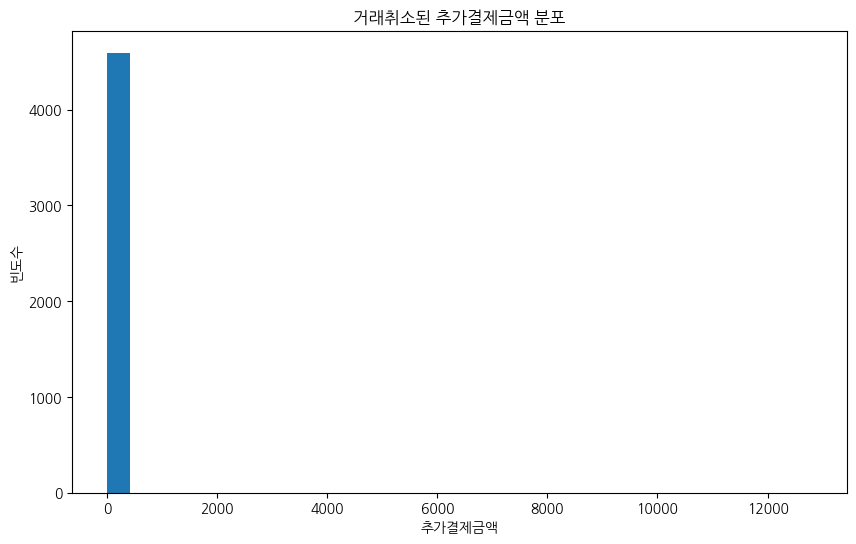

In [192]:
plt.figure(figsize=(10, 6))
plt.hist(cancel['추가결제금액'].dropna(), bins=30)
plt.title('거래취소된 추가결제금액 분포')
plt.xlabel('추가결제금액')
plt.ylabel('빈도수')
plt.show()

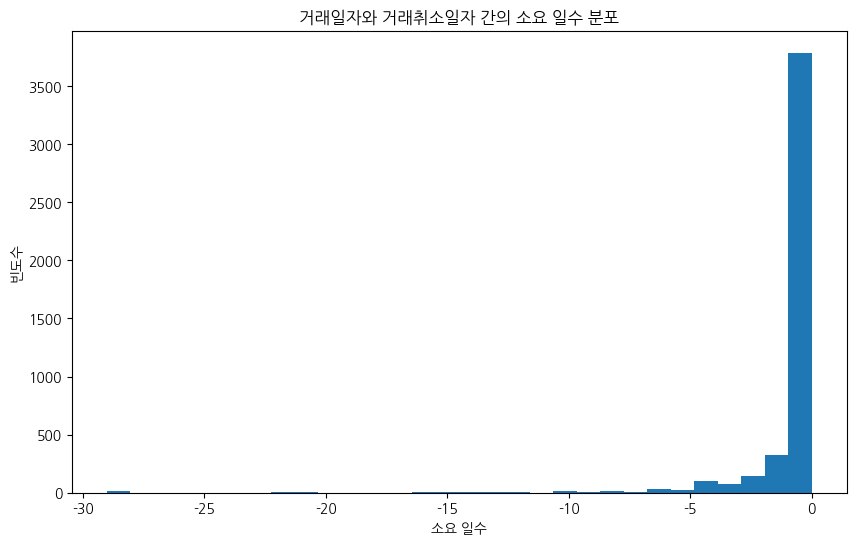

In [209]:
cancel['거래일자'] = pd.to_datetime(cancel['거래일자'], format='%Y%m%d')
cancel['거래취소일자'] = pd.to_datetime(cancel['거래취소일자'], format='%Y%m%d')

cancel['취소까지_소요일'] = (cancel['거래취소일자'] - cancel['거래일자']).dt.days

plt.figure(figsize=(10, 6))
plt.hist(cancel['취소까지_소요일'].dropna(), bins=30) 
plt.title('거래일자와 거래취소일자 간의 소요 일수 분포')
plt.xlabel('소요 일수')
plt.ylabel('빈도수')
plt.show()

In [211]:
cancel['취소까지_소요일'] = (cancel['거래취소일자'] - cancel['거래일자']).dt.days

cancel[cancel['취소까지_소요일'] != 0]

,거래일자,수수료율,고객ID,프로그램수정횟수,추가결제금액,거래취소여부,거래취소일자,서비스명,판매자,판매금액,서비스가격,평점,이용자수,대분류,서비스번호,취소까지_소요일
1452,2021-02-01,6.5,60306001164,-1.0,0,1.0,2021-01-31,문구 및 이미지 수정 또는 기능 추가 및 유지 보수,재택만가능합니다,0.0,10000.0,5.0,41.0,기타,2494.0,-1
1455,2021-02-01,7.5,6060108459,-1.0,0,1.0,2021-01-31,문구 및 이미지 수정 또는 기능 추가 및 유지 보수,재택만가능합니다,0.0,10000.0,5.0,41.0,기타,2494.0,-1
1458,2021-02-01,7.5,12010106658,-1.0,0,1.0,2021-01-31,문구 및 이미지 수정 또는 기능 추가 및 유지 보수,재택만가능합니다,0.0,10000.0,5.0,41.0,기타,2494.0,-1
1673,2021-02-01,7.5,50424002108,-1.0,0,1.0,2021-01-31,컴퓨터 조립 및 대행 업그레이드 견적제작 해드립니다.,우장춘박사,0.0,33000.0,5.0,63.0,프로그래밍,2370.0,-1
1674,2021-02-01,6.5,5042600141,-1.0,0,1.0,2021-01-31,컴퓨터 조립 및 대행 업그레이드 견적제작 해드립니다.,우장춘박사,0.0,33000.0,5.0,63.0,프로그래밍,2370.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340235,2021-06-28,7.5,13040115668,-1.0,0,1.0,2021-06-27,2D 3D 게임 콘텐츠 개발해 드립니다.,elsoft,0.0,2000000.0,0.0,0.0,프로그래밍,6465.0,-1
340237,2021-06-28,6.5,130401160184,-1.0,0,1.0,2021-06-27,2D 3D 게임 콘텐츠 개발해 드립니다.,elsoft,0.0,2000000.0,0.0,0.0,프로그래밍,6465.0,-1
340239,2021-06-28,6.5,130504045129,-1.0,0,1.0,2021-06-27,2D 3D 게임 콘텐츠 개발해 드립니다.,elsoft,0.0,2000000.0,0.0,0.0,프로그래밍,6465.0,-1
340241,2021-06-28,6.5,130902018154,-1.0,0,1.0,2021-06-27,2D 3D 게임 콘텐츠 개발해 드립니다.,elsoft,0.0,2000000.0,0.0,0.0,프로그래밍,6465.0,-1


In [210]:
cancel[cancel['판매금액'] != 0]

,거래일자,수수료율,고객ID,프로그램수정횟수,추가결제금액,거래취소여부,거래취소일자,서비스명,판매자,판매금액,서비스가격,평점,이용자수,대분류,서비스번호,취소까지_소요일
64873,2021-01-08,6.5,30203005155,0.0,0,1.0,2021-01-08,간단한 아두이노 장치 제작해 드립니다.,수제비1,50000.0,50000.0,4.9,269.0,프로그래밍,2130.0,0
73811,2021-01-12,7.5,40113052150,1.0,12800,1.0,2021-01-11,홈페이지 유지보수 및 추가기능 개발해 드립니다.,코딩팝,22800.0,10000.0,5.0,13.0,홈페이지,3072.0,-1
119703,2021-03-05,6.5,705010014,0.0,6200,1.0,2021-03-05,반응형 퍼블리싱 랜딩페이지 코딩해 드립니다.,씽씽패밀리,36200.0,30000.0,5.0,22.0,홈페이지,2803.0,0
120722,2021-03-06,9.0,5030100120,0.0,7800,1.0,2021-03-06,"경력 17년 VBA 크롤링, 데이터관리를 위해 만들어 드립니다.",EBConsulting,37800.0,30000.0,5.0,27.0,데이터,2685.0,0
257704,2021-05-18,6.5,50421001142,1.0,3700,1.0,2021-05-18,"카페24,고도몰,메이크샵 쇼핑몰 수정 및 유지보수 전문",STUDIOVIE,8700.0,5000.0,5.0,61.0,커머스,2381.0,0
325024,2021-06-21,6.5,6040133988,0.0,0,1.0,2021-06-20,"React, Html 웹 페이지 제작 전문 프론트엔드",임쁘띠,100000.0,100000.0,5.0,57.0,홈페이지,2399.0,-1


## 고객데이터만 분석

In [23]:
df.describe()

,고객ID,연령,서비스총구매수,총구매금액,총수정요청수,총추가결제금액
count,1.375260e+05,135722.000000,137526.000000,1.375210e+05,137526.000000,1.375260e+05
mean,4.053386e+10,27.686690,2.503519,1.576986e+05,0.434569,1.001005e+04
std,3.874839e+10,6.633381,3.967558,4.729736e+05,1.570575,1.847627e+04
min,1.010102e+08,0.000000,1.000000,0.000000e+00,-6.000000,0.000000e+00
25%,7.020105e+09,23.000000,1.000000,2.020000e+04,0.000000,0.000000e+00
50%,1.305040e+10,26.000000,1.000000,5.370000e+04,0.000000,4.270000e+03
75%,7.040301e+10,31.000000,3.000000,1.322000e+05,0.000000,1.150000e+04
max,1.501042e+11,85.000000,96.000000,4.505250e+07,120.000000,1.445200e+06


In [61]:
df.isna().sum()

고객ID           0
사용기기           0
사용OS           0
유입경로        1606
회원상태           0
거주지            0
연령          1804
성별         10259
서비스총구매수        0
총구매금액          5
총수정요청수         0
총추가결제금액        0
dtype: int64

#### 성별, 연령

In [127]:
s = df['성별'].dropna()
s

0         남성
2         남성
3         남성
4         남성
5         남성
          ..
137520    여성
137521    남성
137523    남성
137524    남성
137525    여성
Name: 성별, Length: 127267, dtype: object

In [128]:
s.value_counts()

성별
남성    93834
여성    33433
Name: count, dtype: int64

In [156]:
age_groups = pd.cut(df['연령'], bins=[10, 19, 29, 39, 49, 59, 69, 79, 89, 99], 
                    labels=['10대', '20대', '30대', '40대', '50대', '60대', '70대', '80대', '90대'])

f = age_groups.value_counts(normalize=True) * 100
f

연령
20대    66.800655
30대    25.020651
40대     5.836972
10대     1.955983
50대     0.356237
60대     0.019176
80대     0.010326
70대     0.000000
90대     0.000000
Name: proportion, dtype: float64

#### 요청수

In [159]:
##2020기준 다 2~3년 이내 모델들
device_requests = data.groupby('사용기기')['총수정요청수'].sum().sort_values(ascending=False)
print("사용기기별 총 요청 수 (많은 순):\n", device_requests.head())

os_requests = data.groupby('사용OS')['총수정요청수'].sum().sort_values(ascending=False)
print("\n사용OS별 총 요청 수 (많은 순):\n", os_requests.head())

사용기기별 총 요청 수 (많은 순):
 사용기기
iPhone      804.0
SM-N950N    198.0
SM-G950N     95.0
SM-G965N     66.0
SM-G960N     64.0
Name: 총수정요청수, dtype: float64

사용OS별 총 요청 수 (많은 순):
 사용OS
Android8.0.0    696.0
iOS11.4.1       526.0
Android7.0      298.0
iOS12.0         159.0
Android8.1.0     59.0
Name: 총수정요청수, dtype: float64


#### 금액 & 서비스수

In [18]:
df['서비스총구매수'].value_counts().sort_values(ascending = False).head(30)

서비스총구매수
1     71281
2     29640
3     14635
4      7706
5      4426
6      2601
7      1658
8      1061
9       781
10      548
11      464
12      352
13      278
14      241
15      196
16      174
17      138
18      120
19       89
20       84
21       66
23       60
22       55
24       49
25       44
27       41
26       41
28       41
32       40
33       34
Name: count, dtype: int64

In [22]:
df[df['서비스총구매수'].astype(int) >= 18].sort_values(by='서비스총구매수')

,고객ID,사용기기,사용OS,유입경로,회원상태,거주지,연령,성별,서비스총구매수,총구매금액,총수정요청수,총추가결제금액
45922,50142001199,iPhone,iOS11.4.1,네이버블로그,정상회원,경기도,36.0,남성,18,1465000.0,1.0,0
45931,5014200126,iPhone,iOS11.4.1,네이버블로그,정상회원,전라도,25.0,여성,18,477000.0,1.0,10000
34711,3010101550,iPhone,iOS12.0,유튜브,정상회원,강원도,21.0,남성,18,532700.0,1.0,1700
51760,50213002123,SM-A530N,Android8.0.0,인스타그램,정상회원,서울시,48.0,여성,18,633200.0,5.0,3200
34725,3010101563,SM-N920L,Android7.0,검색광고,정상회원,전라도,25.0,남성,18,333000.0,-1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1019,10020100386,iPhone,iOS11.4.1,검색광고,정상회원,충청도,26.0,남성,88,4032550.0,20.0,136050
935,100201003151,LGM-V300K,Android8.0.0,네이버블로그,정상회원,전라도,23.0,남성,90,5717600.0,30.0,202100
922,100201003128,iPhone,iOS11.4.1,유튜브,정상회원,충청도,23.0,남성,91,5276250.0,28.0,164250
927,100201003138,SM-N916S,Android6.0.1,네이버블로그,정상회원,경기도,23.0,남성,94,7075400.0,38.0,285900


In [152]:
df['총구매금액'].sort_values(ascending = False)

1247      45052500.0
129486    40001300.0
18763     16664600.0
72253     16653300.0
21823     16611000.0
             ...    
34470            NaN
71185            NaN
93674            NaN
93719            NaN
118447           NaN
Name: 총구매금액, Length: 137526, dtype: float64

In [153]:
specific_indices = [1247, 129486]  
filtered_rows = df.loc[specific_indices]

filtered_rows

,고객ID,사용기기,사용OS,유입경로,회원상태,거주지,연령,성별,서비스총구매수,총구매금액,총수정요청수,총추가결제금액
1247,100201005117,SM-N950N,Android8.0.0,네이버블로그,정상회원,경기도,37.0,남성,24,45052500.0,4.0,0
129486,90103053144,SM-G955N,Android8.0.0,검색광고,정상회원,경상도,20.0,여성,1,40001300.0,0.0,1300


In [140]:
e = df['총구매금액'] // 10000
e.describe()

count    137521.000000
mean         15.389657
std          47.292147
min           0.000000
25%           2.000000
50%           5.000000
75%          13.000000
max        4505.000000
Name: 총구매금액, dtype: float64

In [150]:
filtered_df = e[e >= 279] #dexcribe의 75%를 4번 반복해서 나온 기준
filtered_df.describe()

count     574.000000
mean      524.139373
std       353.155046
min       279.000000
25%       328.000000
50%       414.500000
75%       552.750000
max      4505.000000
Name: 총구매금액, dtype: float64

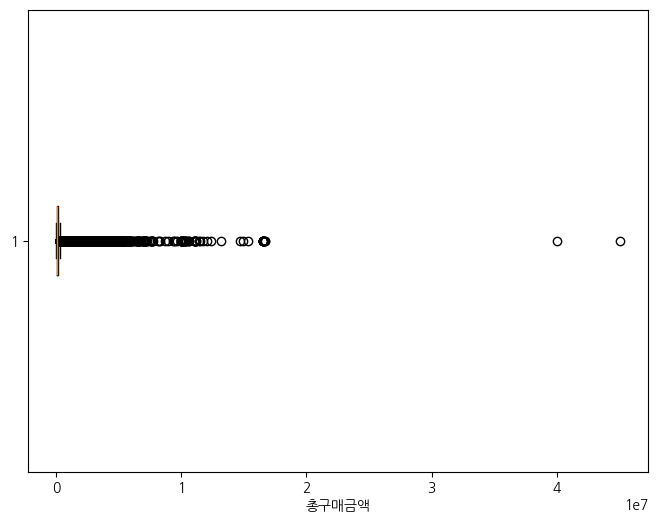

In [27]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['총구매금액'].dropna(), vert=False)
plt.xlabel('총구매금액')
plt.show()

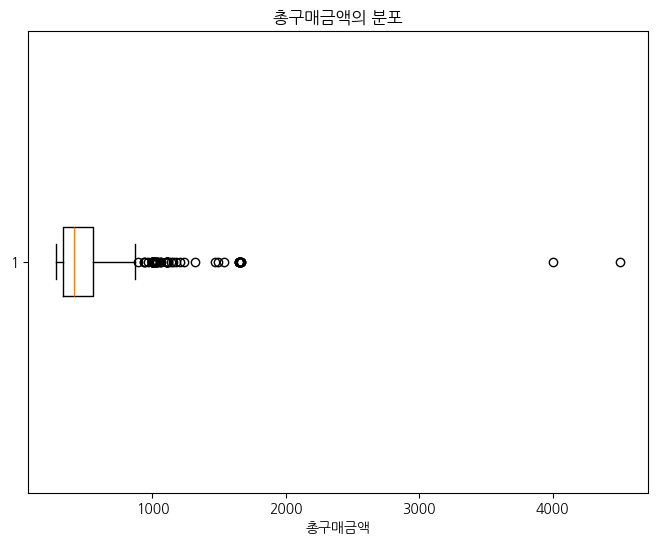

In [151]:
plt.figure(figsize=(8, 6))
plt.boxplot(filtered_df.dropna(), vert=False)
plt.xlabel('총구매금액')
plt.title('총구매금액의 분포')
plt.show()

In [36]:
a = df['총추가결제금액'].value_counts().sort_values(ascending = False).head(36)
a

총추가결제금액
0        47413
10000    10058
20000     3611
30000     1505
2200      1297
1800      1057
3200      1051
1400      1030
1600      1028
4200      1021
2800       952
3800       917
3600       889
3400       830
2600       797
40000      725
7200       717
4700       711
3000       696
8400       682
4800       677
1200       669
6400       665
5200       652
2400       647
10200      614
4000       613
6000       606
8200       599
1300       590
6200       558
5000       555
2700       536
4900       516
2000       512
9200       500
Name: count, dtype: int64

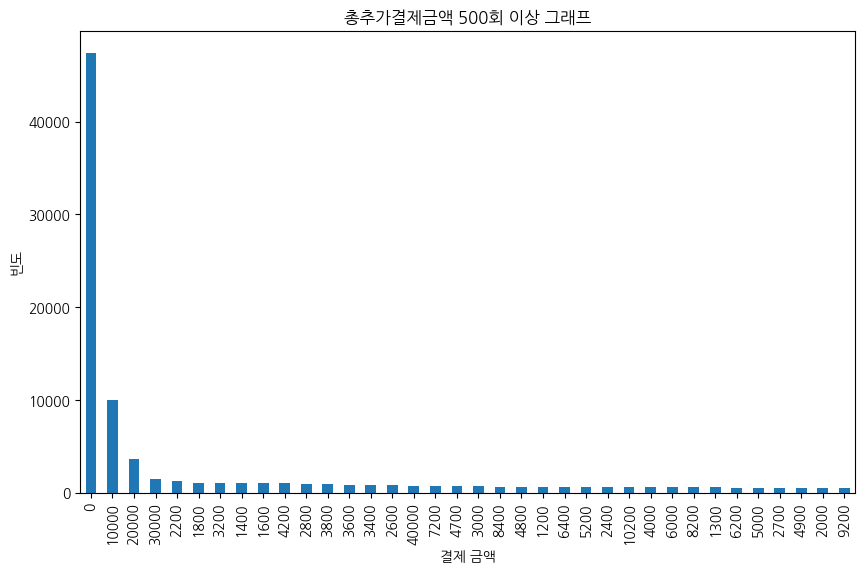

In [38]:
plt.figure(figsize=(10, 6))
a.plot(kind='bar')
plt.title('총추가결제금액 500회 이상 그래프')
plt.xlabel('결제 금액')
plt.ylabel('빈도')
plt.show()

In [51]:
b = df['총추가결제금액'].sort_values(ascending = False).head(26)
b

24576     1445200
20093      946200
134003     815200
24552      752200
24566      626200
22502      572200
24570      536200
20082      517400
20078      496200
20091      496200
20089      496200
20075      492400
20081      492400
67921      470200
40151      466200
37756      451200
83939      363400
38615      363000
20314      348600
134000     347200
134021     347200
90986      335200
19181      316200
41230      314200
41131      313800
66074      301200
Name: 총추가결제금액, dtype: int64

In [59]:
binned_data = (b // 10000)

frequency = pd.cut(binned_data, bins=range(30, 146, 5), right=False).value_counts().sort_index()
frequency

총추가결제금액
[30, 35)      8
[35, 40)      2
[40, 45)      0
[45, 50)      8
[50, 55)      2
[55, 60)      1
[60, 65)      1
[65, 70)      0
[70, 75)      0
[75, 80)      1
[80, 85)      1
[85, 90)      0
[90, 95)      1
[95, 100)     0
[100, 105)    0
[105, 110)    0
[110, 115)    0
[115, 120)    0
[120, 125)    0
[125, 130)    0
[130, 135)    0
[135, 140)    0
[140, 145)    1
Name: count, dtype: int64

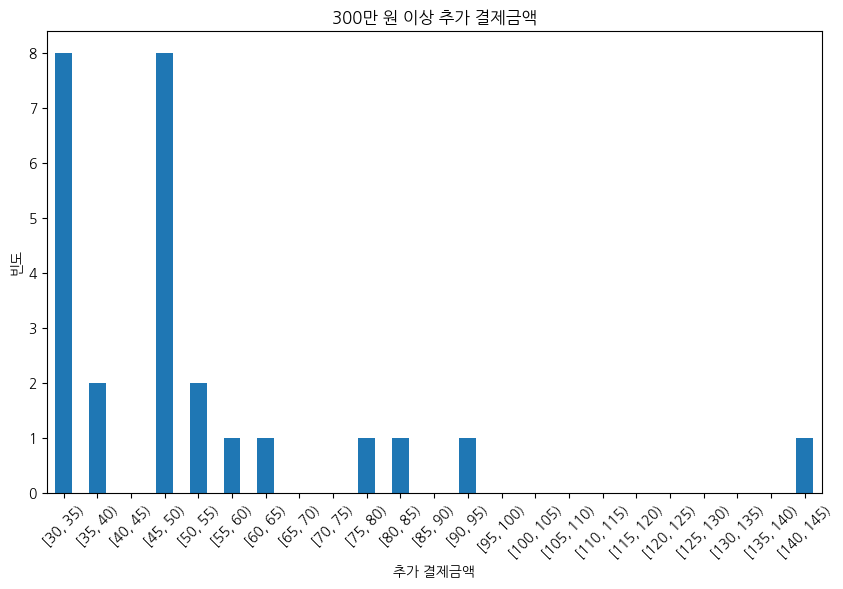

In [60]:
plt.figure(figsize=(10, 6))
frequency.plot(kind='bar')
plt.title('300만 원 이상 추가 결제금액')
plt.xlabel('추가 결제금액')
plt.ylabel('빈도')
plt.xticks(rotation=45)
plt.show()

#### 탈퇴회원만 노려보기

In [67]:
data = df[df['회원상태'] == '탈퇴']
data

,고객ID,사용기기,사용OS,유입경로,회원상태,거주지,연령,성별,서비스총구매수,총구매금액,총수정요청수,총추가결제금액
99,10010101335,SM-A810S,Android7.0,직접검색,탈퇴,경기도,20.0,남성,1,81200.0,0.0,76200
206,10010200886,SM-J111F,Android5.1.1,유튜브,탈퇴,서울시,29.0,남성,1,47700.0,0.0,2700
211,10010200897,SM-N920S,Android7.0,네이버블로그,탈퇴,경상도,30.0,NaN,1,9700.0,0.0,2700
225,100102009137,SM-N950N,Android8.0.0,검색광고,탈퇴,서울시,23.0,남성,1,8100.0,0.0,3100
236,100102009166,SM-G935K,Android8.0.0,네이버블로그,탈퇴,경기도,23.0,남성,2,36200.0,0.0,6200
...,...,...,...,...,...,...,...,...,...,...,...,...
137378,9050206846,LGM-G600K,Android8.0.0,인스타그램,탈퇴,경상도,22.0,남성,2,45800.0,0.0,14800
137408,90502069108,SM-G955N,Android7.0,검색광고,탈퇴,전라도,35.0,남성,3,1135000.0,0.0,30000
137439,90502069151,SM-G920K,Android7.0,유튜브,탈퇴,서울시,23.0,남성,1,15000.0,0.0,10000
137458,90502069175,SM-A530N,Android7.1.1,유튜브,탈퇴,경기도,25.0,남성,1,15000.0,0.0,10000


In [154]:
entry_ratio = data['유입경로'].value_counts(normalize=True) * 100
print(entry_ratio)

유입경로
유튜브       37.748625
네이버블로그    27.782480
검색광고      10.981803
인스타그램      9.691071
네이버카페      7.405840
구글광고       2.306390
페이스북       1.692763
직접검색       1.481168
다음카페       0.655946
뉴스광고       0.253915
Name: proportion, dtype: float64


In [74]:
data.describe()

,고객ID,연령,서비스총구매수,총구매금액,총수정요청수,총추가결제금액
count,4.803000e+03,4735.000000,4803.000000,4.803000e+03,4803.00000,4803.000000
mean,4.054223e+10,27.656600,2.373308,1.430701e+05,0.40787,9882.445347
std,3.881852e+10,6.484352,3.506633,3.816606e+05,1.43497,16397.590747
min,1.010107e+08,0.000000,1.000000,0.000000e+00,-3.00000,0.000000
25%,7.010403e+09,23.000000,1.000000,2.100000e+04,0.00000,0.000000
50%,1.305040e+10,26.000000,1.000000,5.300000e+04,0.00000,4700.000000
75%,7.040200e+10,31.000000,3.000000,1.226500e+05,0.00000,11600.000000
max,1.501030e+11,58.000000,78.000000,1.109180e+07,28.00000,246200.000000


In [73]:
data['서비스총구매수'].value_counts()

서비스총구매수
1     2494
2     1032
3      534
4      282
5      157
6       88
7       52
8       37
9       25
10      17
12      15
11      14
13      14
20       4
15       4
16       4
14       3
29       3
23       3
76       2
28       2
37       2
33       2
46       1
22       1
31       1
32       1
45       1
78       1
25       1
17       1
19       1
56       1
62       1
26       1
18       1
Name: count, dtype: int64

In [86]:
data2 = data[data['서비스총구매수'] <= 2]
data2

,고객ID,사용기기,사용OS,유입경로,회원상태,거주지,연령,성별,서비스총구매수,총구매금액,총수정요청수,총추가결제금액
99,10010101335,SM-A810S,Android7.0,직접검색,탈퇴,경기도,20.0,남성,1,81200.0,0.0,76200
206,10010200886,SM-J111F,Android5.1.1,유튜브,탈퇴,서울시,29.0,남성,1,47700.0,0.0,2700
211,10010200897,SM-N920S,Android7.0,네이버블로그,탈퇴,경상도,30.0,NaN,1,9700.0,0.0,2700
225,100102009137,SM-N950N,Android8.0.0,검색광고,탈퇴,서울시,23.0,남성,1,8100.0,0.0,3100
236,100102009166,SM-G935K,Android8.0.0,네이버블로그,탈퇴,경기도,23.0,남성,2,36200.0,0.0,6200
...,...,...,...,...,...,...,...,...,...,...,...,...
137347,90502068153,SM-N950N,Android8.0.0,유튜브,탈퇴,경상도,33.0,NaN,1,507400.0,0.0,7400
137378,9050206846,LGM-G600K,Android8.0.0,인스타그램,탈퇴,경상도,22.0,남성,2,45800.0,0.0,14800
137439,90502069151,SM-G920K,Android7.0,유튜브,탈퇴,서울시,23.0,남성,1,15000.0,0.0,10000
137458,90502069175,SM-A530N,Android7.1.1,유튜브,탈퇴,경기도,25.0,남성,1,15000.0,0.0,10000


In [87]:
data2.describe()

,고객ID,연령,서비스총구매수,총구매금액,총수정요청수,총추가결제금액
count,3.526000e+03,3474.000000,3526.000000,3.526000e+03,3526.000000,3526.000000
mean,4.180237e+10,27.650547,1.292683,8.206266e+04,0.200794,7757.576574
std,3.972567e+10,6.521041,0.455059,2.639722e+05,0.889631,13582.577289
min,1.010107e+08,0.000000,1.000000,0.000000e+00,-2.000000,0.000000
25%,7.030301e+09,23.000000,1.000000,1.500000e+04,0.000000,0.000000
50%,2.050900e+10,26.000000,1.000000,3.400000e+04,0.000000,4200.000000
75%,7.060204e+10,31.000000,2.000000,7.000000e+04,0.000000,10000.000000
max,1.501030e+11,58.000000,2.000000,1.010000e+07,20.000000,246200.000000


In [103]:
c = df['총추가결제금액'].sort_values(ascending = False)
d = (c // 10000)
d #인덱스 / 가격

24576     144
20093      94
134003     81
24552      75
24566      62
         ... 
103377      0
13561       0
13560       0
103380      0
45265       0
Name: 총추가결제금액, Length: 137526, dtype: int64

In [105]:
d.describe()

count    137526.000000
mean          0.760547
std           1.788642
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max         144.000000
Name: 총추가결제금액, dtype: float64

In [115]:
freq = pd.cut(d, bins=range(0, 146, 5), right=False).value_counts().sort_index()
freq 

총추가결제금액
[0, 5)        133194
[5, 10)         3507
[10, 15)         596
[15, 20)         145
[20, 25)          47
[25, 30)          11
[30, 35)           8
[35, 40)           2
[40, 45)           0
[45, 50)           8
[50, 55)           2
[55, 60)           1
[60, 65)           1
[65, 70)           0
[70, 75)           0
[75, 80)           1
[80, 85)           1
[85, 90)           0
[90, 95)           1
[95, 100)          0
[100, 105)         0
[105, 110)         0
[110, 115)         0
[115, 120)         0
[120, 125)         0
[125, 130)         0
[130, 135)         0
[135, 140)         0
[140, 145)         1
Name: count, dtype: int64

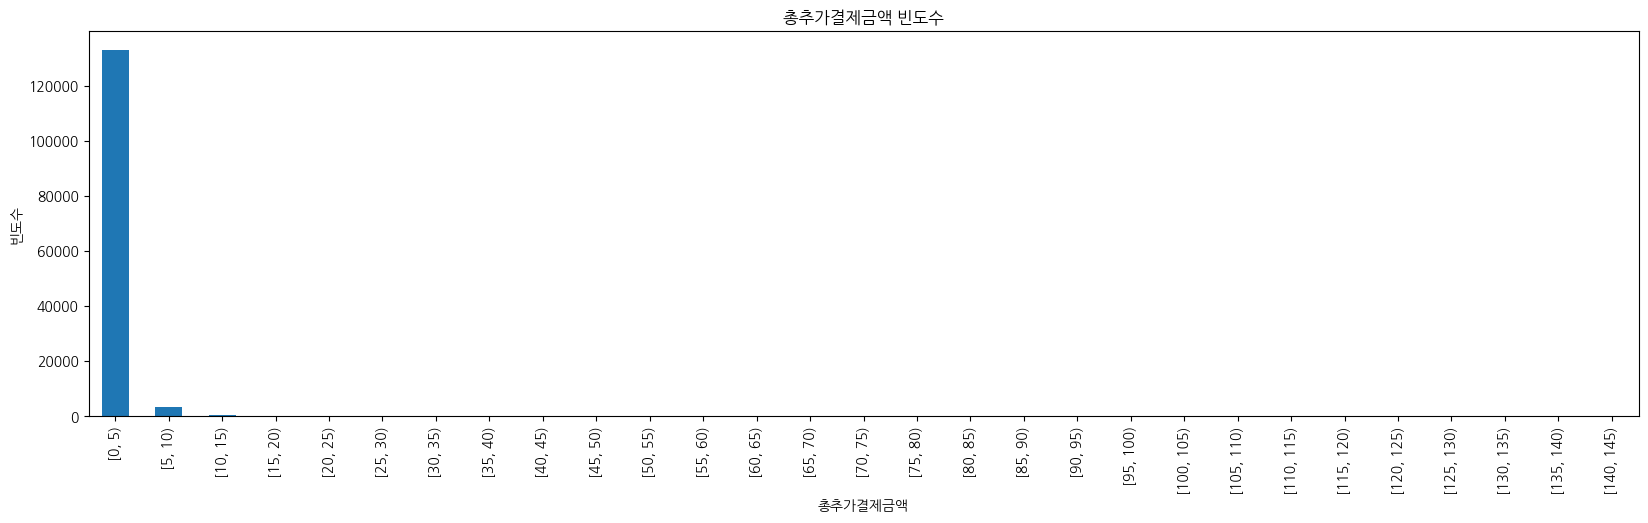

In [123]:
plt.figure(figsize=(20, 5))
freq.plot(kind='bar')
plt.title('총추가결제금액 빈도수')
plt.xlabel('총추가결제금액')
plt.ylabel('빈도수')
plt.show()

In [121]:
freq2 = freq.iloc[3:]

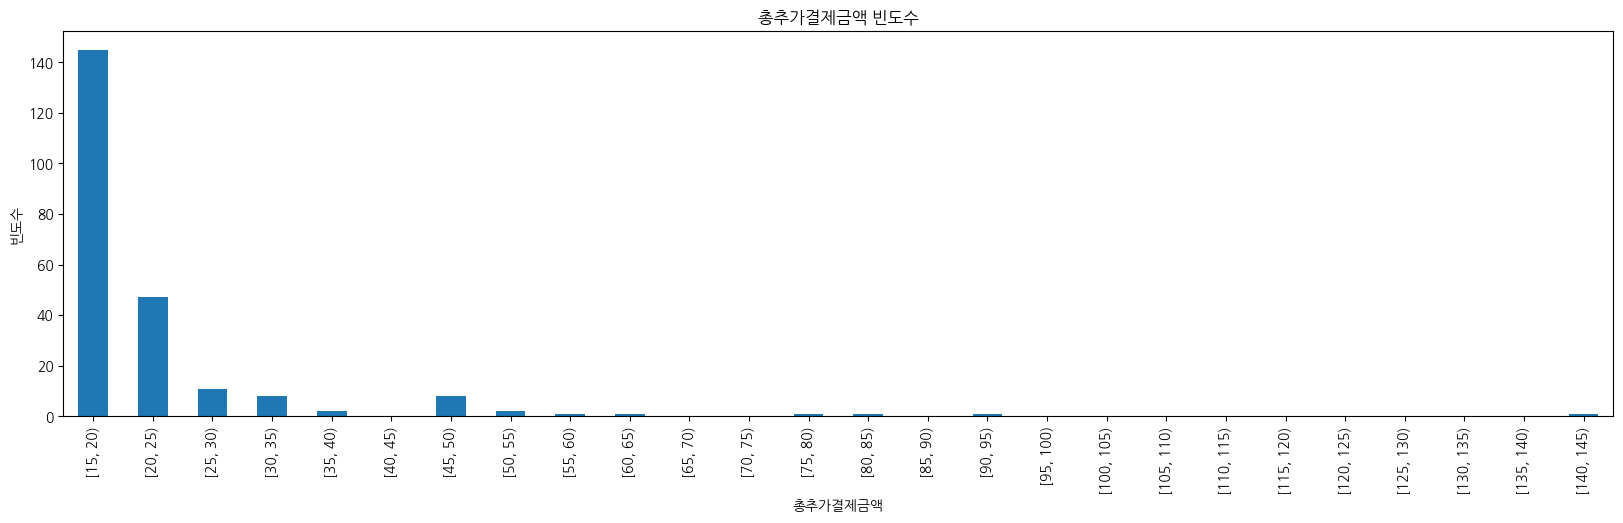

In [122]:
plt.figure(figsize=(20, 5))
freq2.plot(kind='bar')
plt.title('총추가결제금액 빈도수')
plt.xlabel('총추가결제금액')
plt.ylabel('빈도수')
plt.show()

## merge

#### Expert_Data + Log_Data02

In [168]:
final = pd.merge(df2, df3, on=['서비스명', '판매자'], how='inner')

final #x,y 열은 제외하고 보기

,거래일자,수수료율,고객ID,프로그램수정횟수,추가결제금액,거래취소여부,거래취소일자,서비스명,판매자,판매금액,서비스가격_x,평점_x,이용자수,대분류_x,서비스번호_x,서비스가격_y,평점_y,대분류_y,서비스번호_y,판매수
0,20210201,6.5,5030100140,0.0,9800,NaN,NaN,"카페24,고도몰,메이크샵등 쇼핑몰 수정,코딩,유지보수",logf1,14800.0,5000.0,5.0,584.0,커머스,2102.0,5000.0,5.0,커머스,2102.0,402
1,20210201,6.5,8020105385,0.0,0,NaN,NaN,"카페24,고도몰,메이크샵등 쇼핑몰 수정,코딩,유지보수",logf1,5000.0,5000.0,5.0,584.0,커머스,2102.0,5000.0,5.0,커머스,2102.0,402
2,20210201,6.5,110104033157,0.0,9200,NaN,NaN,"엑셀 VBA, 매크로, ERP 프로그램 개발해 드립니다.",엑셀의신,19200.0,10000.0,5.0,583.0,데이터,2103.0,10000.0,5.0,데이터,2103.0,1509
3,20210201,6.5,110104033157,0.0,9200,NaN,NaN,"엑셀 VBA, 매크로, ERP 프로그램 개발해 드립니다.",엑셀의신,19200.0,10000.0,5.0,583.0,데이터,2103.0,10000.0,5.0,데이터,2103.0,1
4,20210201,6.5,110104033157,0.0,9200,NaN,NaN,"엑셀 VBA, 매크로, ERP 프로그램 개발해 드립니다.",엑셀의신,19200.0,10000.0,5.0,583.0,데이터,2103.0,10000.0,5.0,데이터,2103.0,77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853993,20210630,6.5,9010306354,0.0,0,NaN,NaN,데이터 분석 및 시각화 제공해 드립니다.,전문가오리,20000.0,20000.0,4.6,33.0,데이터,2600.0,20000.0,4.6,데이터,2600.0,11
853994,20210630,7.5,9030200780,0.0,10000,NaN,NaN,데이터 분석 및 시각화 제공해 드립니다.,전문가오리,30000.0,20000.0,4.6,33.0,데이터,2600.0,20000.0,4.6,데이터,2600.0,120
853995,20210630,7.5,9030200780,0.0,10000,NaN,NaN,데이터 분석 및 시각화 제공해 드립니다.,전문가오리,30000.0,20000.0,4.6,33.0,데이터,2600.0,20000.0,4.6,데이터,2600.0,62
853996,20210630,7.5,9030200780,0.0,10000,NaN,NaN,데이터 분석 및 시각화 제공해 드립니다.,전문가오리,30000.0,20000.0,4.6,33.0,데이터,2600.0,20000.0,4.6,데이터,2600.0,764


#### Expert_Data + serveice_Data

In [215]:
final2 = pd.merge(df1, df3, on=['판매자'], how='inner')
final2

,판매자ID,판매자,판매 서비스 수,총 판매 금액,프리미엄 서비스 가입여부,신속 알람 서비스 사용여부,서비스명,서비스가격,평점,대분류,서비스번호,판매수
0,V2_0,김러그,326,147927420,가입,미사용,UNITY 2D/3D 게임/앱/솔루션 개발해 드립니다.,450000.0,5.0,모바일,3807.0,326
1,V2_1,디프라이,43,146832200,가입,미사용,하이 퀄리티 반응형 웹사이트를 만들어 드립니다.,3700000.0,0.0,홈페이지,6034.0,25
2,V2_1,디프라이,43,146832200,가입,미사용,인터랙티브 반응형홈페이지제작해 드립니다.,3000000.0,0.0,홈페이지,6033.0,18
3,V2_2,Sailorkr,14,140029000,가입,미사용,"귀사의 소중한 앱, 성심성의껏 제작 드립니다.",10000000.0,0.0,모바일,5780.0,14
4,V2_3,신뢰할만한지식인65,16,130713200,가입,미사용,HTML5 웹 미니게임 제작해 드립니다.,6500000.0,0.0,홈페이지,5553.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...
4153,V2_2061,web3expert,1,7800,미가입,미사용,바이낸스 BEP-20 제작해 드립니다.,5000.0,5.0,프로그래밍,5137.0,1
4154,V2_2062,enos,2,6950,미가입,미사용,블록체인 관련 모든 서비스 만들어 드립니다.,5000.0,5.0,기타,4452.0,2
4155,V2_2063,K9027456501,1,5000,미가입,미사용,쇼핑몰 데이터 크롤링. 잘 팔리는 상품 찾기.,5000.0,5.0,데이터,5095.0,1
4156,V2_2064,승쿠딩,1,5000,가입,미사용,PHP Codeigniter 개발 및 수정해드립니다.,5000.0,5.0,프로그래밍,4706.0,1


## 탈퇴 판매자 제외 데이터셋 로드

In [2]:
df_sv = pd.read_csv("sv_clean.csv", index_col=0) #판매자데이터
sale = df_sv.groupby(['서비스번호', '서비스명', '판매자', '서비스가격', '평점', '대분류'], as_index=False)['판매수'].sum()
sale

,서비스번호,서비스명,판매자,서비스가격,평점,대분류,판매수
0,2102.0,"카페24,고도몰,메이크샵등 쇼핑몰 수정,코딩,유지보수",logf1,5000.0,5.0,커머스,402
1,2103.0,"엑셀 VBA, 매크로, ERP 프로그램 개발해 드립니다.",엑셀의신,10000.0,5.0,데이터,1587
2,2105.0,"엑셀을 이용 서식과 집계, 분석 및 VBA 프로그래밍",태구리,50000.0,5.0,데이터,507
3,2106.0,카페24 쇼핑몰 수정 유지보수 제작 기능개선 오류개선,오Design,5000.0,5.0,커머스,599
4,2107.0,카페24 쇼핑몰 수정 및 개선작업 해 드립니다.,WorldWiseWeb,5000.0,5.0,커머스,1185
...,...,...,...,...,...,...,...
2858,6488.0,기술중심의 백서 및 황서 제작해드립니다.,아틀란기획,850000.0,0.0,프로그래밍,1
2859,6489.0,앱개발 홈페이지제작에 필요한 앱기획 웹기획 해드립니다,어나더클래스,550000.0,0.0,모바일,7
2860,6494.0,대화형 이러닝 동영상 강의 플레이어를 설치해 드립니다.,공부나라,380000.0,0.0,기타,3
2861,6495.0,워드프레스 엘리멘토 프로를 꼼꼼히 설치해 드립니다.,공부나라,33000.0,0.0,홈페이지,1


In [20]:
sale['대분류'].unique()

array(['커머스', '데이터', '홈페이지', '기타', '프로그램', '프로그래밍', '모바일', '디자인', '게임',
       '기획', 'UnReal', '인공지능'], dtype=object)

In [3]:
expert = pd.read_csv("ex_clean.csv", index_col=0)
expert

,판매자ID,판매자,판매 서비스 수,총 판매 금액,프리미엄 서비스 가입여부,신속 알람 서비스 사용여부
0,V2_0,김러그,326,146181660.0,가입,미사용
1,V2_1,디프라이,43,146666100.0,가입,미사용
2,V2_2,Sailorkr,14,140014500.0,가입,미사용
3,V2_3,신뢰할만한지식인65,16,130656600.0,가입,미사용
4,V2_4,에픽핫,18,126114700.0,가입,미사용
...,...,...,...,...,...,...
2061,V2_2061,web3expert,1,6400.0,미가입,미사용
2062,V2_2062,enos,2,5000.0,미가입,미사용
2063,V2_2063,K9027456501,1,5000.0,미가입,미사용
2064,V2_2064,승쿠딩,1,5000.0,가입,미사용


In [4]:
log = pd.read_csv("log_clean.csv", index_col=0)
log

,거래일자,수수료율,고객ID,프로그램수정횟수,추가결제금액,거래취소여부,거래취소일자,서비스명,판매자,판매금액,서비스가격,평점,이용자수,대분류,서비스번호
0,20210201,6.5,5030100140,0.0,9800,0.0,0.0,"카페24,고도몰,메이크샵등 쇼핑몰 수정,코딩,유지보수",logf1,14800.0,5000.0,5.0,584.0,커머스,2102.0
1,20210201,6.5,8020105385,0.0,0,0.0,0.0,"카페24,고도몰,메이크샵등 쇼핑몰 수정,코딩,유지보수",logf1,5000.0,5000.0,5.0,584.0,커머스,2102.0
2,20210201,6.5,110104033157,0.0,9200,0.0,0.0,"엑셀 VBA, 매크로, ERP 프로그램 개발해 드립니다.",엑셀의신,19200.0,10000.0,5.0,583.0,데이터,2103.0
3,20210201,7.5,40203001176,0.0,11000,0.0,0.0,"엑셀을 이용 서식과 집계, 분석 및 VBA 프로그래밍",태구리,61000.0,50000.0,5.0,504.0,데이터,2105.0
4,20210201,6.5,5041700297,0.0,0,0.0,0.0,"엑셀을 이용 서식과 집계, 분석 및 VBA 프로그래밍",태구리,50000.0,50000.0,5.0,504.0,데이터,2105.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344272,20210630,9.0,50150001196,0.0,0,0.0,0.0,데이터 분석 및 시각화 제공해 드립니다.,전문가오리,20000.0,20000.0,4.6,33.0,데이터,2600.0
344273,20210630,7.5,60107010137,0.0,0,0.0,0.0,데이터 분석 및 시각화 제공해 드립니다.,전문가오리,20000.0,20000.0,4.6,33.0,데이터,2600.0
344274,20210630,9.0,70406002101,0.0,0,0.0,0.0,데이터 분석 및 시각화 제공해 드립니다.,전문가오리,20000.0,20000.0,4.6,33.0,데이터,2600.0
344275,20210630,6.5,9010306354,0.0,0,0.0,0.0,데이터 분석 및 시각화 제공해 드립니다.,전문가오리,20000.0,20000.0,4.6,33.0,데이터,2600.0


In [5]:
cus = pd.read_csv("cus_clean.csv", index_col=0)
cus

,고객ID,사용기기,사용OS,유입경로,회원상태,거주지,연령,성별,서비스총구매수,총구매금액,총수정요청수,총추가결제금액
0,1001010041,iPhone,iOS11.4.1,유튜브,정상회원,경기도,25.0,남성,1,44500.0,0.0,14500
1,10010100410,SM-N935S,Android7.0,검색광고,정상회원,경기도,26.0,기타,1,44500.0,0.0,14500
2,100101004108,iPhone,iOS12.0,네이버블로그,정상회원,경기도,23.0,남성,1,34500.0,0.0,14500
3,100101004109,iPhone,iOS11.4.1,인스타그램,정상회원,경기도,20.0,남성,1,364500.0,0.0,14500
4,100101004112,iPhone,iOS11.4.1,직접검색,정상회원,경기도,28.0,남성,1,34500.0,0.0,14500
...,...,...,...,...,...,...,...,...,...,...,...,...
137521,9050206990,SM-N950N,Android8.0.0,유튜브,정상회원,경상도,21.0,남성,2,75000.0,0.0,20000
137522,9050206992,iPhone,iOS11.4,네이버카페,탈퇴,강원도,26.0,기타,1,310000.0,0.0,10000
137523,9050206995,iPhone,iOS12.0,인스타그램,정상회원,강원도,28.0,남성,1,89000.0,0.0,10000
137524,9050206996,SM-G930S,Android8.0.0,네이버블로그,정상회원,강원도,43.0,남성,1,9000.0,1.0,4000


## 상관분석

#### expert + log

In [7]:
DF = pd.merge(expert, log, on=['판매자'], how='inner')
DF

,판매자ID,판매자,판매 서비스 수,총 판매 금액,프리미엄 서비스 가입여부,신속 알람 서비스 사용여부,거래일자,수수료율,고객ID,프로그램수정횟수,추가결제금액,거래취소여부,거래취소일자,서비스명,판매금액,서비스가격,평점,이용자수,대분류,서비스번호
0,V2_0,김러그,326,146181660.0,가입,미사용,20210209,7.5,1010104245,0.0,11200,0.0,0.0,UNITY 2D/3D 게임/앱/솔루션 개발해 드립니다.,461200.0,450000.0,5.0,4.0,모바일,3807.0
1,V2_0,김러그,326,146181660.0,가입,미사용,20210209,6.5,1020115141,0.0,10000,0.0,0.0,UNITY 2D/3D 게임/앱/솔루션 개발해 드립니다.,460000.0,450000.0,5.0,4.0,모바일,3807.0
2,V2_0,김러그,326,146181660.0,가입,미사용,20210209,6.5,20301006176,0.0,0,0.0,0.0,UNITY 2D/3D 게임/앱/솔루션 개발해 드립니다.,450000.0,450000.0,5.0,4.0,모바일,3807.0
3,V2_0,김러그,326,146181660.0,가입,미사용,20210209,6.5,20801001131,1.0,12400,0.0,0.0,UNITY 2D/3D 게임/앱/솔루션 개발해 드립니다.,462400.0,450000.0,5.0,4.0,모바일,3807.0
4,V2_0,김러그,326,146181660.0,가입,미사용,20210209,6.5,20801517168,1.0,4800,0.0,0.0,UNITY 2D/3D 게임/앱/솔루션 개발해 드립니다.,454800.0,450000.0,5.0,4.0,모바일,3807.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344272,V2_2062,enos,2,5000.0,미가입,미사용,20210221,6.5,8010117555,0.0,0,0.0,0.0,블록체인 관련 모든 서비스 만들어 드립니다.,5000.0,5000.0,5.0,2.0,기타,4452.0
344273,V2_2062,enos,2,5000.0,미가입,미사용,20210221,6.5,8010401886,-1.0,1950,0.0,0.0,블록체인 관련 모든 서비스 만들어 드립니다.,0.0,5000.0,5.0,2.0,기타,4452.0
344274,V2_2063,K9027456501,1,5000.0,미가입,미사용,20210121,9.0,60201014183,0.0,0,0.0,0.0,쇼핑몰 데이터 크롤링. 잘 팔리는 상품 찾기.,5000.0,5000.0,5.0,1.0,데이터,5095.0
344275,V2_2064,승쿠딩,1,5000.0,가입,미사용,20210104,7.5,6020101436,0.0,0,0.0,0.0,PHP Codeigniter 개발 및 수정해드립니다.,5000.0,5000.0,5.0,1.0,프로그래밍,4706.0


In [8]:
DF.columns

Index(['판매자ID', '판매자', '판매 서비스 수', '총 판매 금액', '프리미엄 서비스 가입여부',
       '신속 알람 서비스 사용여부', '거래일자', '수수료율', '고객ID', '프로그램수정횟수', '추가결제금액',
       '거래취소여부', '거래취소일자', '서비스명', '판매금액', '서비스가격', '평점', '이용자수', '대분류',
       '서비스번호'],
      dtype='object')

In [9]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344277 entries, 0 to 344276
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   판매자ID           344277 non-null  object 
 1   판매자             344277 non-null  object 
 2   판매 서비스 수        344277 non-null  int64  
 3   총 판매 금액         344277 non-null  float64
 4   프리미엄 서비스 가입여부   344277 non-null  object 
 5   신속 알람 서비스 사용여부  344277 non-null  object 
 6   거래일자            344277 non-null  int64  
 7   수수료율            344277 non-null  float64
 8   고객ID            344277 non-null  int64  
 9   프로그램수정횟수        344277 non-null  float64
 10  추가결제금액          344277 non-null  int64  
 11  거래취소여부          344277 non-null  float64
 12  거래취소일자          344277 non-null  float64
 13  서비스명            344277 non-null  object 
 14  판매금액            344277 non-null  float64
 15  서비스가격           344277 non-null  float64
 16  평점              344277 non-null  float64
 17  이용자수      

####  sale + 기타

In [10]:
# Merge 수행
DF2 = pd.merge(sale, DF, on=['판매자', '서비스명'], how='inner')

# 중복된 열을 하나만 남기고 `_x` 또는 `_y`가 붙은 열 삭제
DF2 = DF2.loc[:, ~DF2.columns.str.endswith('_x')]  # _x가 붙은 열을 삭제
DF2 = DF2.rename(columns=lambda x: x.rstrip('_y'))  # _y를 제거하여 열 이름 통일

# 결과 확인
DF2.head()

,서비스명,판매자,판매수,판매자ID,판매 서비스 수,총 판매 금액,프리미엄 서비스 가입여부,신속 알람 서비스 사용여부,거래일자,수수료율,...,프로그램수정횟수,추가결제금액,거래취소여부,거래취소일자,판매금액,서비스가격,평점,이용자수,대분류,서비스번호
0,"카페24,고도몰,메이크샵등 쇼핑몰 수정,코딩,유지보수",logf1,402,V2_1008,402,3234540.0,미가입,미사용,20210201,6.5,...,0.0,9800,0.0,0.0,14800.0,5000.0,5.0,584.0,커머스,2102.0
1,"카페24,고도몰,메이크샵등 쇼핑몰 수정,코딩,유지보수",logf1,402,V2_1008,402,3234540.0,미가입,미사용,20210201,6.5,...,0.0,0,0.0,0.0,5000.0,5000.0,5.0,584.0,커머스,2102.0
2,"카페24,고도몰,메이크샵등 쇼핑몰 수정,코딩,유지보수",logf1,402,V2_1008,402,3234540.0,미가입,미사용,20210202,7.5,...,0.0,0,0.0,0.0,5000.0,5000.0,5.0,584.0,커머스,2102.0
3,"카페24,고도몰,메이크샵등 쇼핑몰 수정,코딩,유지보수",logf1,402,V2_1008,402,3234540.0,미가입,미사용,20210202,7.5,...,0.0,0,0.0,0.0,5000.0,5000.0,5.0,584.0,커머스,2102.0
4,"카페24,고도몰,메이크샵등 쇼핑몰 수정,코딩,유지보수",logf1,402,V2_1008,402,3234540.0,미가입,미사용,20210202,9.0,...,0.0,0,0.0,0.0,5000.0,5000.0,5.0,584.0,커머스,2102.0


In [11]:
DF2.columns

Index(['서비스명', '판매자', '판매수', '판매자ID', '판매 서비스 수', '총 판매 금액', '프리미엄 서비스 가입여부',
       '신속 알람 서비스 사용여부', '거래일자', '수수료율', '고객ID', '프로그램수정횟수', '추가결제금액',
       '거래취소여부', '거래취소일자', '판매금액', '서비스가격', '평점', '이용자수', '대분류', '서비스번호'],
      dtype='object')

#### cus + 기타

In [12]:
# Merge 수행
DF3 = pd.merge(cus, DF2, on=['고객ID'], how='inner')

# 중복된 열을 하나만 남기고 `_x` 또는 `_y`가 붙은 열 삭제
DF3 = DF3.loc[:, ~DF3.columns.str.endswith('_x')]  # _x가 붙은 열을 삭제
DF3 = DF3.rename(columns=lambda x: x.rstrip('_y'))  # _y를 제거하여 열 이름 통일

# 결과 확인
DF3.head()

,고객ID,사용기기,사용OS,유입경로,회원상태,거주지,연령,성별,서비스총구매수,총구매금액,...,프로그램수정횟수,추가결제금액,거래취소여부,거래취소일자,판매금액,서비스가격,평점,이용자수,대분류,서비스번호
0,1001010041,iPhone,iOS11.4.1,유튜브,정상회원,경기도,25.0,남성,1,44500.0,...,0.0,14500,0.0,0.0,44500.0,30000.0,4.8,20.0,기타,2843.0
1,10010100410,SM-N935S,Android7.0,검색광고,정상회원,경기도,26.0,기타,1,44500.0,...,0.0,14500,0.0,0.0,44500.0,30000.0,4.8,20.0,기타,2843.0
2,100101004108,iPhone,iOS12.0,네이버블로그,정상회원,경기도,23.0,남성,1,34500.0,...,0.0,14500,0.0,0.0,34500.0,20000.0,4.9,22.0,홈페이지,2790.0
3,100101004109,iPhone,iOS11.4.1,인스타그램,정상회원,경기도,20.0,남성,1,364500.0,...,0.0,14500,0.0,0.0,364500.0,350000.0,5.0,2.0,기타,4600.0
4,100101004112,iPhone,iOS11.4.1,직접검색,정상회원,경기도,28.0,남성,1,34500.0,...,0.0,14500,0.0,0.0,34500.0,20000.0,4.9,22.0,홈페이지,2790.0


In [13]:
DF3.columns

Index(['고객ID', '사용기기', '사용OS', '유입경로', '회원상태', '거주지', '연령', '성별', '서비스총구매수',
       '총구매금액', '총수정요청수', '총추가결제금액', '서비스명', '판매자', '판매수', '판매자ID', '판매 서비스 수',
       '총 판매 금액', '프리미엄 서비스 가입여부', '신속 알람 서비스 사용여부', '거래일자', '수수료율',
       '프로그램수정횟수', '추가결제금액', '거래취소여부', '거래취소일자', '판매금액', '서비스가격', '평점', '이용자수',
       '대분류', '서비스번호'],
      dtype='object')

In [14]:
DF3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350018 entries, 0 to 350017
Data columns (total 32 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   고객ID            350018 non-null  int64  
 1   사용기기            350018 non-null  object 
 2   사용OS            350018 non-null  object 
 3   유입경로            350018 non-null  object 
 4   회원상태            350018 non-null  object 
 5   거주지             350018 non-null  object 
 6   연령              350018 non-null  object 
 7   성별              350018 non-null  object 
 8   서비스총구매수         350018 non-null  int64  
 9   총구매금액           350018 non-null  float64
 10  총수정요청수          350018 non-null  float64
 11  총추가결제금액         350018 non-null  int64  
 12  서비스명            350018 non-null  object 
 13  판매자             350018 non-null  object 
 14  판매수             350018 non-null  int64  
 15  판매자ID           350018 non-null  object 
 16  판매 서비스 수        350018 non-null  int64  
 17  총 판매 금액   

**수치형 상관관계**

In [15]:
# 수치형 변수만 선택하여 상관관계 계산
numerical_features = DF3.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_features.corr()

# 상관관계 출력
print("수치형 변수 간의 상관관계:")
print(correlation_matrix)

수치형 변수 간의 상관관계:
              고객ID   서비스총구매수     총구매금액    총수정요청수   총추가결제금액       판매수  \
고객ID      1.000000  0.019571  0.021181  0.076125  0.037526  0.006310   
서비스총구매수   0.019571  1.000000  0.767749  0.813989  0.572119 -0.017738   
총구매금액     0.021181  0.767749  1.000000  0.645239  0.462368 -0.048212   
총수정요청수    0.076125  0.813989  0.645239  1.000000  0.648046 -0.014979   
총추가결제금액   0.037526  0.572119  0.462368  0.648046  1.000000 -0.015597   
판매수       0.006310 -0.017738 -0.048212 -0.014979 -0.015597  1.000000   
판매 서비스 수  0.004618 -0.019990 -0.049788 -0.016226 -0.015769  0.898218   
총 판매 금액   0.001721 -0.015301  0.020641 -0.011222 -0.009845  0.319526   
거래일자      0.003767 -0.038701 -0.027841 -0.009037 -0.028981  0.020468   
수수료율     -0.002776  0.000896  0.001457 -0.000038 -0.000918 -0.000325   
프로그램수정횟수  0.031974  0.021874  0.024207  0.229551  0.074891 -0.020984   
추가결제금액    0.015572 -0.136791 -0.088224 -0.054959  0.374745 -0.016963   
거래취소여부    0.001522 -0.004512 -0.008561 -0.033303

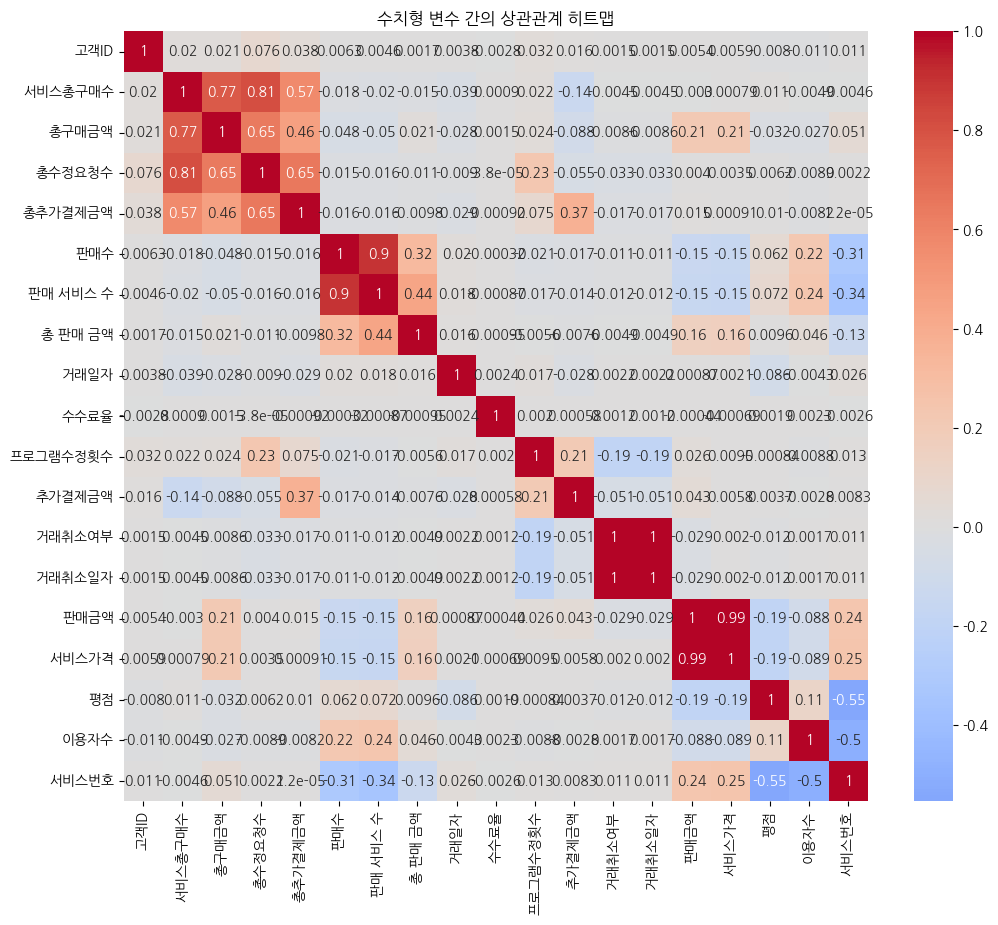

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# 수치형 변수만 선택하여 상관관계 계산
numerical_features = DF3.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_features.corr()

# 상관관계 히트맵 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("수치형 변수 간의 상관관계 히트맵")
plt.show()

평점-이용자수 (+)\
평점-수정횟수 (-)\
평점-이용자수감소여부 (-)\
서비스가격-수수료율 (-)

**범주형상관관계**

In [17]:
from scipy.stats import chi2_contingency

# 범주형 변수 목록 추출
categorical_features = DF3.select_dtypes(include=['object']).columns

# 범주형 변수들 간의 카이제곱 테스트
for i in range(len(categorical_features)):
    for j in range(i + 1, len(categorical_features)):
        var1 = categorical_features[i]
        var2 = categorical_features[j]
        
        # 교차표 생성
        contingency_table = pd.crosstab(DF3[var1], DF3[var2])
        
        # 카이제곱 테스트 수행
        chi2, p, dof, ex = chi2_contingency(contingency_table)
        
        print(f"카이제곱 테스트 결과 - {var1} vs {var2}:")
        print(f"p-value = {p:.4f}")
        if p < 0.05:
            print(f"⇒ 유의미한 상관관계 있음 (p < 0.05)\n")
        else:
            print(f"⇒ 유의미한 상관관계 없음\n")


카이제곱 테스트 결과 - 사용기기 vs 사용OS:
p-value = 0.0000
⇒ 유의미한 상관관계 있음 (p < 0.05)

카이제곱 테스트 결과 - 사용기기 vs 유입경로:
p-value = 0.0000
⇒ 유의미한 상관관계 있음 (p < 0.05)

카이제곱 테스트 결과 - 사용기기 vs 회원상태:
p-value = 0.0000
⇒ 유의미한 상관관계 있음 (p < 0.05)

카이제곱 테스트 결과 - 사용기기 vs 거주지:
p-value = 0.0000
⇒ 유의미한 상관관계 있음 (p < 0.05)

카이제곱 테스트 결과 - 사용기기 vs 연령:
p-value = 0.0000
⇒ 유의미한 상관관계 있음 (p < 0.05)

카이제곱 테스트 결과 - 사용기기 vs 성별:
p-value = 0.0000
⇒ 유의미한 상관관계 있음 (p < 0.05)

카이제곱 테스트 결과 - 사용기기 vs 서비스명:
p-value = 0.0000
⇒ 유의미한 상관관계 있음 (p < 0.05)

카이제곱 테스트 결과 - 사용기기 vs 판매자:
p-value = 0.0000
⇒ 유의미한 상관관계 있음 (p < 0.05)

카이제곱 테스트 결과 - 사용기기 vs 판매자ID:
p-value = 0.0000
⇒ 유의미한 상관관계 있음 (p < 0.05)

카이제곱 테스트 결과 - 사용기기 vs 프리미엄 서비스 가입여부:
p-value = 0.1190
⇒ 유의미한 상관관계 없음

카이제곱 테스트 결과 - 사용기기 vs 신속 알람 서비스 사용여부:
p-value = 0.0001
⇒ 유의미한 상관관계 있음 (p < 0.05)

카이제곱 테스트 결과 - 사용기기 vs 대분류:
p-value = 0.0012
⇒ 유의미한 상관관계 있음 (p < 0.05)

카이제곱 테스트 결과 - 사용OS vs 유입경로:
p-value = 0.0000
⇒ 유의미한 상관관계 있음 (p < 0.05)

카이제곱 테스트 결과 - 사용OS vs 회원상태:
p-value = 0.0000
⇒ 유의미한 상관관계 있음 (p

In [18]:
from scipy.stats import chi2_contingency

# 범주형 변수 목록 추출
categorical_features = DF3.select_dtypes(include=['object']).columns

# 유의미한 상관관계가 있는 변수들 저장할 리스트
significant_relationships = []

# 범주형 변수들 간의 카이제곱 테스트
for i in range(len(categorical_features)):
    for j in range(i + 1, len(categorical_features)):
        var1 = categorical_features[i]
        var2 = categorical_features[j]
        
        # 교차표 생성
        contingency_table = pd.crosstab(DF3[var1], DF3[var2])
        
        # 카이제곱 테스트 수행
        chi2, p, dof, ex = chi2_contingency(contingency_table)
        
        # 유의미한 상관관계가 있는 경우만 저장
        if p < 0.05:
            significant_relationships.append((var1, var2, p))

# 유의미한 상관관계 출력
print("유의미한 상관관계가 있는 변수들:")
for var1, var2, p in significant_relationships:
    print(f"{var1} vs {var2}: p-value = {p:.4f}")

유의미한 상관관계가 있는 변수들:
사용기기 vs 사용OS: p-value = 0.0000
사용기기 vs 유입경로: p-value = 0.0000
사용기기 vs 회원상태: p-value = 0.0000
사용기기 vs 거주지: p-value = 0.0000
사용기기 vs 연령: p-value = 0.0000
사용기기 vs 성별: p-value = 0.0000
사용기기 vs 서비스명: p-value = 0.0000
사용기기 vs 판매자: p-value = 0.0000
사용기기 vs 판매자ID: p-value = 0.0000
사용기기 vs 신속 알람 서비스 사용여부: p-value = 0.0001
사용기기 vs 대분류: p-value = 0.0012
사용OS vs 유입경로: p-value = 0.0000
사용OS vs 회원상태: p-value = 0.0000
사용OS vs 거주지: p-value = 0.0000
사용OS vs 연령: p-value = 0.0000
사용OS vs 성별: p-value = 0.0000
사용OS vs 서비스명: p-value = 0.0000
사용OS vs 판매자: p-value = 0.0000
사용OS vs 판매자ID: p-value = 0.0000
유입경로 vs 회원상태: p-value = 0.0000
유입경로 vs 거주지: p-value = 0.0000
유입경로 vs 연령: p-value = 0.0000
유입경로 vs 성별: p-value = 0.0000
유입경로 vs 서비스명: p-value = 0.0000
유입경로 vs 판매자: p-value = 0.0000
유입경로 vs 판매자ID: p-value = 0.0000
회원상태 vs 거주지: p-value = 0.0000
회원상태 vs 연령: p-value = 0.0000
회원상태 vs 성별: p-value = 0.0000
회원상태 vs 프리미엄 서비스 가입여부: p-value = 0.0164
거주지 vs 연령: p-value = 0.0000
거주지 vs 성별: p-value = 0.00

**이탈요인과 상관관계**

In [29]:
# 거래취소여부와 다른 변수들 간의 상관관계 분석
variables_of_interest = ['평점', '수수료율', '추가결제금액', '프로그램수정횟수', '거래취소여부']
DF3_subset = DF3[variables_of_interest]

# 수치형 변수들 간의 상관관계
correlation_matrix = DF3_subset.corr()
print("거래취소여부와 주요 변수들 간의 상관관계:")
print(correlation_matrix['거래취소여부'].sort_values(ascending=False))


거래취소여부와 주요 변수들 간의 상관관계:
거래취소여부      1.000000
수수료율        0.001207
평점         -0.012360
추가결제금액     -0.051207
프로그램수정횟수   -0.188410
Name: 거래취소여부, dtype: float64


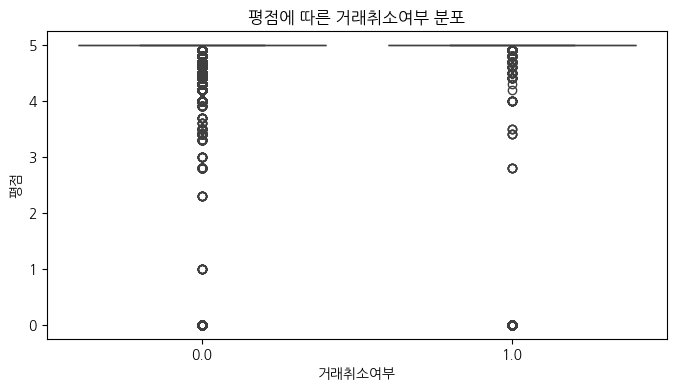

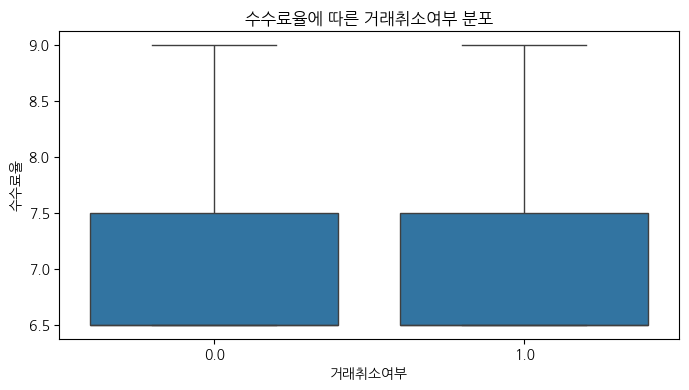

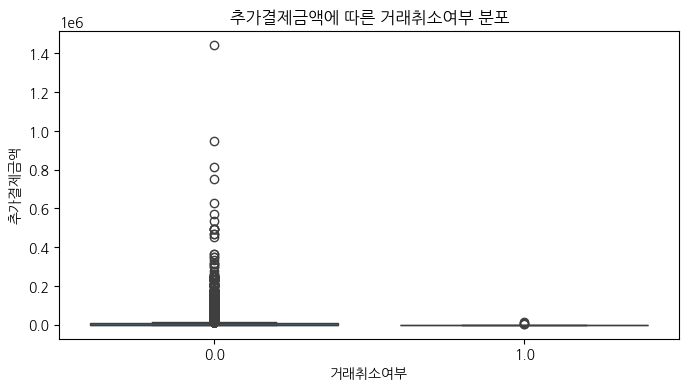

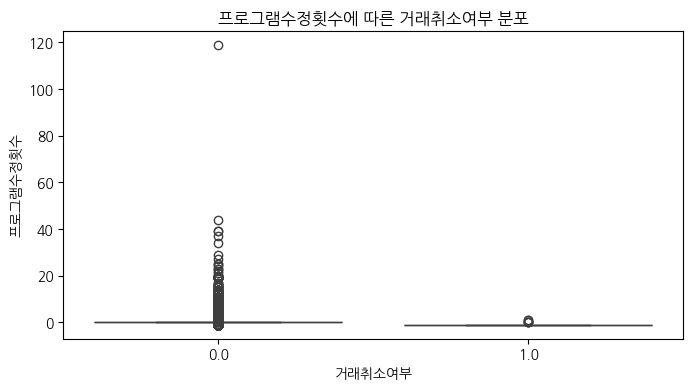

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# 거래취소여부에 따른 평점, 수수료율, 추가결제금액, 프로그램 수정횟수의 분포 시각화
for feature in ['평점', '수수료율', '추가결제금액', '프로그램수정횟수']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='거래취소여부', y=feature, data=DF3)
    plt.title(f'{feature}에 따른 거래취소여부 분포')
    plt.show()

**감소원인과 상관관계**

In [33]:
# 예시: 이용자수 감소 여부를 새로운 타겟 변수로 생성 (이전 기간 대비 이용자수가 감소한 경우 1, 그렇지 않으면 0)
DF3['이용자수감소여부'] = DF3['이용자수'].diff().apply(lambda x: 1 if x < 0 else 0)

# 주요 변수와의 상관관계 확인
variables_of_interest = ['평점', '수수료율', '추가결제금액', '프로그램수정횟수', '이용자수감소여부']
DF3_subset = DF3[variables_of_interest]
correlation_matrix = DF3_subset.corr()
print("이용자수 감소 여부와 주요 변수들 간의 상관관계:")
print(correlation_matrix['이용자수감소여부'].sort_values(ascending=False))

이용자수 감소 여부와 주요 변수들 간의 상관관계:
이용자수감소여부    1.000000
프로그램수정횟수    0.002769
수수료율       -0.000009
추가결제금액     -0.048439
평점         -0.093085
Name: 이용자수감소여부, dtype: float64


###  1. 고객이 여러 전문가와 거래했는지 또는 동일한 전문가와 반복적으로 거래했는지 확인

In [251]:
customer_expert_counts = log.groupby('고객ID')['판매자'].nunique().reset_index()
customer_expert_counts.columns = ['고객ID', '고유_판매자수']

repeat_transactions = log.groupby(['고객ID', '판매자']).size().reset_index(name='거래횟수')
repeat_transactions = repeat_transactions[repeat_transactions['거래횟수'] > 1]

print("고유 전문가와 거래한 고객 수 (상위 10개):")
print(customer_expert_counts.head(10).to_string(index=False))  # index=False로 인덱스 숨김

print("\n동일한 전문가와 반복적으로 거래한 고객 (상위 10개):")
print(repeat_transactions.head(10).to_string(index=False))  # index=False로 인덱스 숨김

고유 전문가와 거래한 고객 수 (상위 10개):
     고객ID  고유_판매자수
101010181        1
101010183        2
101010185        1
101010186        1
101010187        2
101010188        1
101010391        4
101010392        2
101010393        2
101010394        2

동일한 전문가와 반복적으로 거래한 고객 (상위 10개):
     고객ID             판매자  거래횟수
101010457   DevelopersUFO     2
101010462            DA블루     2
101011571 WebiusDeveloper     2
301010153             kbs     2
301010155          오즈의해결사     2
301010156            시스픽스     2
302010097   MasterPlanner     2
401152229            이지엑셀     2
401162269             슈징코     2
401162282             애런강     2


### 2. 첫 거래에서 높은 평점을 받은 서비스의 고객이 장기적으로 서비스를 이용하는지, 혹은 탈주하는지 확인

In [252]:
log['거래일자'] = pd.to_datetime(log['거래일자'])

first_transactions = log.sort_values('거래일자').groupby('고객ID').first().reset_index()

high_rating_customers = first_transactions[first_transactions['평점'] >= 5]

high_rating_customers = high_rating_customers.merge(cus[['고객ID', '회원상태']], on='고객ID', how='left')
churned_high_rating = high_rating_customers[high_rating_customers['회원상태'] == '탈퇴']

print("첫 거래에서 높은 평점을 받고 탈주한 고객:")
print(churned_high_rating)

첫 거래에서 높은 평점을 받고 탈주한 고객:
                고객ID                          거래일자  수수료율  프로그램수정횟수  추가결제금액  \
46         101010687 1970-01-01 00:00:00.020210131   6.5       0.0   25400   
75         102010213 1970-01-01 00:00:00.020210210   6.5       0.0   13100   
76         102010214 1970-01-01 00:00:00.020210518   6.5      -1.0       0   
83         102010299 1970-01-01 00:00:00.020210302   6.5       0.0    4500   
84         102011513 1970-01-01 00:00:00.020210224   6.5       0.0   10000   
...              ...                           ...   ...       ...     ...   
113086  140102001124 1970-01-01 00:00:00.020210102   6.5       0.0    8000   
113087  140102001179 1970-01-01 00:00:00.020210506   6.5       0.0    8000   
113121  140104001137 1970-01-01 00:00:00.020210404   6.5       0.0    2000   
113162  140201009120 1970-01-01 00:00:00.020210115   6.5       0.0    8200   
113182  150103010169 1970-01-01 00:00:00.020210601   6.5       0.0       0   

        거래취소여부      거래취소일자            

### 수수료율 경향성

In [ ]:
# 1. 대분류와 평점별
category_rating_fee_stats = log.groupby(['대분류', '평점'])['수수료율'].agg(['min', 'max', 'mean']).reset_index()
category_rating_fee_stats.columns = ['대분류', '평점', '수수료율_최소', '수수료율_최대', '수수료율_평균']

print("대분류와 평점별 수수료율 경향성:")
print(category_rating_fee_stats)

# 2. 대분류와 판매금액 구간별 
log['판매금액구간'] = pd.cut(log['판매금액'].fillna(0).astype(int), bins=range(0, int(log['판매금액'].max()) + 50000, 50000))

category_amount_fee_stats = log.groupby(['대분류', '판매금액구간'])['수수료율'].mean().reset_index()
category_amount_fee_stats.columns = ['대분류', '판매금액구간', '수수료율_평균']

print("\n대분류와 판매금액 구간별 수수료율 평균:")
print(category_amount_fee_stats)

# 3. 판매자별 수수료율 
seller_fee_stats = log.groupby('판매자')['수수료율'].agg(['min', 'max', 'mean', 'count']).reset_index()
seller_fee_stats.columns = ['판매자', '수수료율_최소', '수수료율_최대', '수수료율_평균', '거래수']
top_sellers_fee_stats = seller_fee_stats.sort_values(by='거래수', ascending=False).head(10)

print("\n상위 10개 판매자의 수수료율 통계:")
print(top_sellers_fee_stats)

# 4. 서비스가격 구간
log['서비스가격구간'] = pd.cut(log['서비스가격'].fillna(0).astype(int), bins=range(0, int(log['서비스가격'].max()) + 10000, 10000))

price_fee_stats = log.groupby('서비스가격구간')['수수료율'].mean().reset_index()
price_fee_stats.columns = ['서비스가격구간', '수수료율_평균']

print("\n서비스가격 구간별 수수료율 평균:")
print(price_fee_stats)

In [16]:
# Select numerical columns for correlation analysis with '수수료율'
numerical_features = DF[['수수료율', '총 판매 금액', '판매 서비스 수', '프로그램수정횟수', '추가결제금액', 
                         '거래취소여부', '거래취소일자', '판매금액', '서비스가격', '평점', '이용자수']]

# Calculate correlations
correlation_matrix = numerical_features.corr()

# Display correlation of '수수료율' with other features
print("Correlation of '수수료율' with other features:")
print(correlation_matrix['수수료율'].sort_values(ascending=False))


Correlation of '수수료율' with other features:
수수료율        1.000000
프로그램수정횟수    0.002317
이용자수        0.002292
평점          0.001856
거래취소일자      0.001404
거래취소여부      0.001404
추가결제금액      0.000460
판매금액       -0.000538
판매 서비스 수   -0.000767
서비스가격      -0.000786
총 판매 금액    -0.001116
Name: 수수료율, dtype: float64


## 수수료율

In [50]:
# 수수료 이익 계산 (수수료율 * 판매금액 / 100)
log['수수료이익'] = log['수수료율'] * log['판매금액'] / 100

# 전체 수수료 이익 합계 계산
total_profit = log['수수료이익'].sum()
print("전체 수수료 이익 합계:", total_profit)

전체 수수료 이익 합계: 1506865144.6000001


In [39]:
log

,거래일자,수수료율,고객ID,프로그램수정횟수,추가결제금액,거래취소여부,거래취소일자,서비스명,판매자,판매금액,서비스가격,평점,이용자수,대분류,서비스번호,Cluster,수수료이익
0,20210201,6.5,5030100140,0.0,9800,0.0,0.0,"카페24,고도몰,메이크샵등 쇼핑몰 수정,코딩,유지보수",logf1,14800.0,5000.0,5.0,584.0,커머스,2102.0,0,962.0
1,20210201,6.5,8020105385,0.0,0,0.0,0.0,"카페24,고도몰,메이크샵등 쇼핑몰 수정,코딩,유지보수",logf1,5000.0,5000.0,5.0,584.0,커머스,2102.0,0,325.0
2,20210201,6.5,110104033157,0.0,9200,0.0,0.0,"엑셀 VBA, 매크로, ERP 프로그램 개발해 드립니다.",엑셀의신,19200.0,10000.0,5.0,583.0,데이터,2103.0,0,1248.0
3,20210201,7.5,40203001176,0.0,11000,0.0,0.0,"엑셀을 이용 서식과 집계, 분석 및 VBA 프로그래밍",태구리,61000.0,50000.0,5.0,504.0,데이터,2105.0,2,4575.0
4,20210201,6.5,5041700297,0.0,0,0.0,0.0,"엑셀을 이용 서식과 집계, 분석 및 VBA 프로그래밍",태구리,50000.0,50000.0,5.0,504.0,데이터,2105.0,0,3250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344272,20210630,9.0,50150001196,0.0,0,0.0,0.0,데이터 분석 및 시각화 제공해 드립니다.,전문가오리,20000.0,20000.0,4.6,33.0,데이터,2600.0,2,1800.0
344273,20210630,7.5,60107010137,0.0,0,0.0,0.0,데이터 분석 및 시각화 제공해 드립니다.,전문가오리,20000.0,20000.0,4.6,33.0,데이터,2600.0,2,1500.0
344274,20210630,9.0,70406002101,0.0,0,0.0,0.0,데이터 분석 및 시각화 제공해 드립니다.,전문가오리,20000.0,20000.0,4.6,33.0,데이터,2600.0,2,1800.0
344275,20210630,6.5,9010306354,0.0,0,0.0,0.0,데이터 분석 및 시각화 제공해 드립니다.,전문가오리,20000.0,20000.0,4.6,33.0,데이터,2600.0,0,1300.0


In [40]:
# 고객의 연령대, 성별, 유입경로별 평균 거래 금액과 평균 수수료율 확인
cus_log_merged = pd.merge(log, cus, on='고객ID', how='inner')
cus_grouped = cus_log_merged.groupby(['연령', '성별', '유입경로']).agg({
    '판매금액': 'mean',
    '수수료율': 'mean',
    '수수료이익': 'mean'
}).reset_index()

print("연령대, 성별, 유입경로별 평균 거래 금액과 수수료율:")
print(cus_grouped)


연령대, 성별, 유입경로별 평균 거래 금액과 수수료율:
       연령  성별    유입경로           판매금액      수수료율        수수료이익
0     0.0  기타    검색광고   34580.000000  6.700000  2367.700000
1     0.0  기타  네이버블로그   47018.181818  7.045455  3251.636364
2     0.0  기타   네이버카페   55250.000000  6.833333  3831.250000
3     0.0  기타     유튜브   39908.333333  7.291667  2897.375000
4     0.0  남성    검색광고  137500.000000  6.750000  9012.500000
...   ...  ..     ...            ...       ...          ...
1131   기타  여성   네이버카페   58557.500000  6.950000  4172.312500
1132   기타  여성     유튜브   60759.868173  6.961394  4299.681638
1133   기타  여성   인스타그램   35587.066667  6.866667  2463.092667
1134   기타  여성    직접검색   39484.615385  7.000000  2730.346154
1135   기타  여성    페이스북   76807.692308  6.807692  5149.884615

[1136 rows x 6 columns]


분석 결과: 연령대, 성별, 유입경로에 따라 평균 거래 금액과 수수료율이 다르게 나타남.
적용 방안: 특정 연령대나 유입경로에서 높은 거래 금액을 보이는 고객들에게는 더 낮은 수수료율을 적용하여 충성 고객을 유치하거나 유지할 수 있는 방안을 고려해볼 수 있습니다.
예시: 유입 경로가 검색광고 또는 유튜브를 통해 유입된 고객의 경우 거래 금액이 높다면, 이들 고객에게 약간의 수수료 할인을 적용할 수 있습니다.

In [51]:
# expert 데이터셋의 이름을 올바르게 설정 (ex에서 expert로 수정)
# expert 데이터를 불러온 상태라고 가정
expert_log_merged = pd.merge(log, expert, on='판매자', how='inner')

# 판매한 서비스 수를 '판매횟수'로 가정하여 경력 또는 경험을 간접적으로 나타냄
# 판매한 서비스 수에 따라 구간을 나누어 그룹화
expert_log_merged['판매횟수_구간'] = pd.cut(expert_log_merged['판매 서비스 수'], bins=[0, 10, 50, 100, 500, 1000], 
                                         labels=['10 이하', '10-50', '50-100', '100-500', '500 이상'])

# 판매 횟수 구간과 평점별 평균 수수료율과 수수료 이익 계산
ex_grouped = expert_log_merged.groupby(['판매횟수_구간', '평점']).agg({
    '수수료율': 'mean',
    '수수료이익': 'mean',
    '판매금액': 'mean'
}).reset_index()

print("판매횟수 구간 및 평점별 평균 수수료율과 수수료 이익:")
print(ex_grouped)


판매횟수 구간 및 평점별 평균 수수료율과 수수료 이익:
    판매횟수_구간   평점      수수료율         수수료이익           판매금액
0     10 이하  0.0  6.952032  64004.574379  917828.555305
1     10 이하  1.0  6.500000    862.333333   13266.666667
2     10 이하  2.3  7.687500    661.875000    8337.500000
3     10 이하  2.8       NaN           NaN            NaN
4     10 이하  3.0       NaN           NaN            NaN
..      ...  ...       ...           ...            ...
100  500 이상  4.6  6.922707   1779.356412   25699.898632
101  500 이상  4.7  6.949775   1626.482387   23433.887387
102  500 이상  4.8  6.945894   1879.845576   27069.070656
103  500 이상  4.9  6.952126   2279.224850   32770.511663
104  500 이상  5.0  6.953980   2053.243249   29534.234974

[105 rows x 5 columns]


In [103]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# 수수료율에 대해 ANOVA 분석
model = ols('수수료율 ~ C(판매횟수_구간) * C(평점)', data=expert_log_merged).fit()
anova_results = anova_lm(model)
print("ANOVA 결과 (수수료율):")
print(anova_results)

# 수수료이익에 대해 ANOVA 분석
model_profit = ols('수수료이익 ~ C(판매횟수_구간) * C(평점)', data=expert_log_merged).fit()
anova_results_profit = anova_lm(model_profit)
print("\nANOVA 결과 (수수료이익):")
print(anova_results_profit)

ANOVA 결과 (수수료율):
                        df         sum_sq   mean_sq         F    PR(>F)
C(판매횟수_구간)             4.0       1.815057  0.453764  0.728803  0.572114
C(평점)                 20.0      15.190452  0.759523  1.219890  0.225461
C(판매횟수_구간):C(평점)      80.0      60.011279  0.750141  1.204822  0.102425
Residual          232496.0  144755.663676  0.622616       NaN       NaN

ANOVA 결과 (수수료이익):
                        df        sum_sq       mean_sq            F  PR(>F)
C(판매횟수_구간)             4.0  9.935724e+12  2.483931e+12  6032.739595     0.0
C(평점)                 20.0  2.081740e+12  1.040870e+11   252.796829     0.0
C(판매횟수_구간):C(평점)      80.0  1.535007e+12  1.918758e+10    46.601005     0.0
Residual          232496.0  9.572832e+13  4.117418e+08          NaN     NaN


 전문가의 판매 횟수 및 평점별 분석
분석 결과: 판매 횟수와 평점이 높은 전문가일수록 평균 수수료율이 다소 낮아지는 경향이 보임.
적용 방안: 판매 횟수가 많고 평점이 높은 전문가에게는 인센티브로서 더 낮은 수수료율을 적용하는 방안을 고려할 수 있습니다. 이로 인해 높은 평점을 유지하면서 더 많은 거래를 유도할 수 있습니다.
예시: 판매횟수가 500 이상이면서 평점이 4.5 이상인 전문가에게는 1%~2% 정도의 수수료율 할인을 제공하여, 플랫폼 내에서 활동을 계속 유도할 수 있습니다.

In [52]:
# 거래 금액 구간 설정 및 수수료율 분석
log['금액구간'] = pd.cut(log['판매금액'], bins=[0, 10000, 50000, 100000, 500000, 1000000], labels=['1만원 이하', '1-5만원', '5-10만원', '10-50만원', '50-100만원 이상'])
log_grouped = log.groupby('금액구간').agg({
    '수수료율': 'mean',
    '수수료이익': 'mean'
}).reset_index()

print("거래 금액 구간별 평균 수수료율과 수수료 이익:")
print(log_grouped)


거래 금액 구간별 평균 수수료율과 수수료 이익:
          금액구간      수수료율         수수료이익
0       1만원 이하  6.953588    498.809206
1        1-5만원  6.948471   1883.518100
2       5-10만원  6.952957   4798.610255
3      10-50만원  6.948948  14539.457801
4  50-100만원 이상  6.944460  46203.564043


거래 금액 구간별 분석
분석 결과: 거래 금액이 높아질수록 평균 수수료율에는 큰 변화가 없으나, 수수료 이익의 절대값이 증가함.
적용 방안: 거래 금액이 높은 고객에게는 낮은 수수료율을 적용하여 고액 거래를 유도할 수 있습니다. 이를 통해 고객이 더 큰 거래를 체결하도록 장려할 수 있습니다.
예시: 거래 금액이 50만 원 이상인 거래에는 수수료율을 1% 낮춰주는 정책을 적용하여 고액 거래를 유도할 수 있습니다.

In [60]:
# 서비스 대분류와 카테고리별 수수료율과 수수료 이익 확인
sv_log_merged = pd.merge(log, sale, on='서비스번호', how='inner')
sv_log_merged = sv_log_merged.loc[:, ~sv_log_merged.columns.str.endswith('_x')]  # _x가 붙은 열을 삭제
sv_log_merged = sv_log_merged.rename(columns=lambda x: x.rstrip('_y'))  # _y를 제거하여 열 이름 통일

sv_log_merged.columns

Index(['거래일자', '수수료율', '고객ID', '프로그램수정횟수', '추가결제금액', '거래취소여부', '거래취소일자',
       '판매금액', '이용자수', '서비스번호', '수수료이익', '금액구간', '서비스명', '판매자', '서비스가격', '평점',
       '대분류', '판매수'],
      dtype='object')

In [61]:
sv_grouped = sv_log_merged.groupby(['대분류']).agg({
    '수수료율': 'mean',
    '수수료이익': 'mean',
    '판매금액': 'mean'
}).reset_index()

print("서비스 대분류 및 카테고리별 평균 수수료율과 수수료 이익:")
print(sv_grouped)

서비스 대분류 및 카테고리별 평균 수수료율과 수수료 이익:
       대분류      수수료율         수수료이익           판매금액
0   UnReal  6.960028  26709.382188  385743.085554
1       게임  6.970753   4870.682452   69992.828817
2       기타  6.953349   3253.578302   46730.544127
3       기획  6.953181   7627.166985  109545.213740
4      데이터  6.948225   2596.315991   37393.205253
5      디자인  6.931287   5357.556576   77150.309327
6      모바일  6.955641  12652.825307  181294.928625
7     인공지능  6.966006   6292.930276   90217.485836
8      커머스  6.952597   2371.149220   34153.838893
9    프로그래밍  6.950180   5825.830759   83690.821784
10    프로그램  6.946322   5571.457626   80285.982861
11    홈페이지  6.948918   4113.572413   59346.211988


분석 결과: 각 대분류 서비스별로 평균 수수료율과 수수료 이익이 다르게 나타남. 특히, 디자인, 개발, 데이터와 같은 서비스에서 높은 수수료 이익을 보임.
적용 방안: 수익성이 높은 특정 대분류 서비스에 대해서는 수수료율을 조정하여 경쟁력을 높일 수 있습니다. 예를 들어, 수익성이 높은 데이터나 디자인 서비스는 기존 수수료율을 유지하거나 약간 높이는 대신, 상대적으로 낮은 게임과 같은 대분류는 수수료율을 낮추어 거래 활성화를 유도할 수 있습니다.
예시: 게임 서비스에 대해서는 1~2%의 수수료율 인하를 제공하여 더 많은 거래를 유도하고, 데이터와 같은 고수익 서비스는 기존 수수료율을 유지합니다.

**종합**

고객 특성 기반 할인: 특정 유입경로(예: 검색광고, 유튜브)와 높은 연령대에서 거래 금액이 높은 고객들에게 수수료율을 0.5%~1% 인하.\
전문가 등급 기반 인센티브: 판매 횟수가 많고 평점이 높은 전문가(예: 판매횟수 500 이상 및 평점 4.5 이상)에게 1%~2% 수수료율 인하.\
거래 금액 기반 차등 수수료율: 거래 금액이 50만 원 이상인 거래에 대해 1% 수수료 인하.\
서비스 유형에 따른 수수료 차등화: 경쟁이 치열하거나 활성화가 필요한 게임 서비스에 1% 수수료 인하, 수익성이 높은 데이터, 디자인 서비스는 기존 수수료율 유지.

In [75]:
# 불필요한 열 선택 제거 후 병합
log_cus_sale_merged = pd.merge(
    log[['거래일자', '수수료율', '고객ID', '판매금액', '판매자', '서비스번호', '평점', '수수료이익']],
    cus[['고객ID', '유입경로', '연령']],
    on='고객ID',
    how='left'
)

# sale 데이터 병합
log_cus_sale_merged = pd.merge(
    log_cus_sale_merged,
    sale[['서비스번호', '대분류']],
    on='서비스번호',
    how='left'
)

# expert 데이터 병합
log_cus_sale_expert_merged = pd.merge(
    log_cus_sale_merged,
    expert[['판매자', '판매 서비스 수']],
    on='판매자',
    how='left'
)

# 병합 후 불필요한 접미사 제거
log_cus_sale_expert_merged = log_cus_sale_expert_merged.rename(
    columns={
        '대분류_x': '대분류',
        '대분류_y': '대분류_서비스',
        '서비스번호_x': '서비스번호',
        '서비스번호_y': '서비스번호_서비스'
    }
)

# 확인
print(log_cus_sale_expert_merged.columns)

Index(['거래일자', '수수료율', '고객ID', '판매금액', '판매자', '서비스번호', '평점', '수수료이익', '유입경로',
       '연령', '대분류', '판매 서비스 수'],
      dtype='object')


In [78]:
# 연령 열을 숫자로 변환하여 비교 가능하도록 처리
log_cus_sale_expert_merged['연령'] = pd.to_numeric(log_cus_sale_expert_merged['연령'], errors='coerce')

# 새로운 수수료율을 기본 수수료율로 설정
log_cus_sale_expert_merged['새로운수수료율'] = log_cus_sale_expert_merged['수수료율'].copy()

# 1. 고객 특성 기반 할인
log_cus_sale_expert_merged.loc[
    (log_cus_sale_expert_merged['유입경로'].isin(['검색광고', '유튜브'])) &
    (log_cus_sale_expert_merged['연령'] >= 50) &
    (log_cus_sale_expert_merged['판매금액'] > 50000),
    '새로운수수료율'
] -= 1

# 2. 전문가 등급 기반 인센티브
log_cus_sale_expert_merged.loc[
    (log_cus_sale_expert_merged['판매 서비스 수'] >= 500) &
    (log_cus_sale_expert_merged['평점'] >= 4.5),
    '새로운수수료율'
] -= 2

# 3. 거래 금액 기반 차등 수수료율
log_cus_sale_expert_merged.loc[
    log_cus_sale_expert_merged['판매금액'] >= 500000,
    '새로운수수료율'
] -= 1

# 4. 서비스 유형에 따른 수수료 차등화
log_cus_sale_expert_merged.loc[
    log_cus_sale_expert_merged['대분류'] == '게임',
    '새로운수수료율'
] -= 1

# 수수료율이 0% 미만으로 떨어지지 않도록 제한
log_cus_sale_expert_merged['새로운수수료율'] = log_cus_sale_expert_merged['새로운수수료율'].clip(lower=0)

# 새로운 수수료 이익 계산 (새로운 수수료율 적용)
log_cus_sale_expert_merged['새로운수수료이익'] = log_cus_sale_expert_merged['새로운수수료율'] * log_cus_sale_expert_merged['판매금액'] / 100

# 새로운 수수료 이익 총합 계산
total_new_profit = log_cus_sale_expert_merged['새로운수수료이익'].sum()

# 결과 확인
print("새로운 수수료 이익 총합:", total_new_profit)

# 기존 수수료 이익 총합과 비교하여 이득 차이 계산
total_old_profit = log_cus_sale_expert_merged['수수료이익'].sum()
profit_difference = total_new_profit - total_old_profit

print("기존 수수료 이익 총합:", total_old_profit)
print("수수료율 조정 후 이득 차이:", profit_difference)

# 결과 데이터 확인
log_cus_sale_expert_merged[['판매금액', '수수료율', '새로운수수료율', '수수료이익', '새로운수수료이익']].head()


새로운 수수료 이익 총합: 1344713815.9
기존 수수료 이익 총합: 1506865144.6000001
수수료율 조정 후 이득 차이: -162151328.70000005


,판매금액,수수료율,새로운수수료율,수수료이익,새로운수수료이익
0,14800.0,6.5,6.5,962.0,962.0
1,5000.0,6.5,6.5,325.0,325.0
2,19200.0,6.5,4.5,1248.0,864.0
3,61000.0,7.5,5.5,4575.0,3355.0
4,50000.0,6.5,4.5,3250.0,2250.0


In [83]:
# 연령 열을 숫자로 변환하여 비교 가능하도록 처리
log_cus_sale_expert_merged['연령'] = pd.to_numeric(log_cus_sale_expert_merged['연령'], errors='coerce')

# 새로운 수수료율을 기본 수수료율로 설정
log_cus_sale_expert_merged['새로운수수료율'] = log_cus_sale_expert_merged['수수료율'].copy()

# 1. 서비스 유형에 따른 인상 (비용이 높은 서비스에 대해 소폭 인상)
log_cus_sale_expert_merged.loc[
    log_cus_sale_expert_merged['대분류'].isin(['데이터', '디자인', '마케팅']),
    '새로운수수료율'
] += 1.0  # 1% 인상

# 2. 평점이 낮은 전문가에 대한 소폭 인상
log_cus_sale_expert_merged.loc[
    log_cus_sale_expert_merged['평점'] < 4.0,
    '새로운수수료율'
] += 0.5  # 0.5% 인상

# 3. 고액 거래에 대한 인하를 최소화하거나 제거
log_cus_sale_expert_merged.loc[
    log_cus_sale_expert_merged['판매금액'] >= 500000,
    '새로운수수료율'
] -= 0.3  # 인하 폭을 줄임

# 4. 연령 및 유입 경로 조건에 따른 인상
log_cus_sale_expert_merged.loc[
    (log_cus_sale_expert_merged['유입경로'].isin(['검색광고', '유튜브'])) &
    (log_cus_sale_expert_merged['연령'] >= 50),
    '새로운수수료율'
] += 0.5  # 0.5% 인상

# 수수료율이 0% 미만 또는 과도하게 높아지지 않도록 제한 (최대 10% 설정)
log_cus_sale_expert_merged['새로운수수료율'] = log_cus_sale_expert_merged['새로운수수료율'].clip(lower=0, upper=10)

# 새로운 수수료 이익 계산 (새로운 수수료율 적용)
log_cus_sale_expert_merged['새로운수수료이익'] = log_cus_sale_expert_merged['새로운수수료율'] * log_cus_sale_expert_merged['판매금액'] / 100

# 새로운 수수료 이익 총합 계산
total_new_profit = log_cus_sale_expert_merged['새로운수수료이익'].sum()

# 결과 확인
print("새로운 수수료 이익 총합:", total_new_profit)

# 기존 수수료 이익 총합과 비교하여 이득 차이 계산
total_old_profit = log_cus_sale_expert_merged['수수료이익'].sum()
profit_difference = total_new_profit - total_old_profit

print("기존 수수료 이익 총합:", total_old_profit)
print("수수료율 조정 후 이득 차이:", profit_difference)

# 결과 데이터 확인
log_cus_sale_expert_merged[['판매금액', '수수료율', '새로운수수료율', '수수료이익', '새로운수수료이익']]


새로운 수수료 이익 총합: 1529546889.5200002
기존 수수료 이익 총합: 1506865144.6000001
수수료율 조정 후 이득 차이: 22681744.920000076


,판매금액,수수료율,새로운수수료율,수수료이익,새로운수수료이익
0,14800.0,6.5,6.5,962.0,962.0
1,5000.0,6.5,6.5,325.0,325.0
2,19200.0,6.5,7.5,1248.0,1440.0
3,61000.0,7.5,8.5,4575.0,5185.0
4,50000.0,6.5,7.5,3250.0,3750.0
...,...,...,...,...,...
344272,20000.0,9.0,10.0,1800.0,2000.0
344273,20000.0,7.5,8.5,1500.0,1700.0
344274,20000.0,9.0,10.0,1800.0,2000.0
344275,20000.0,6.5,7.5,1300.0,1500.0


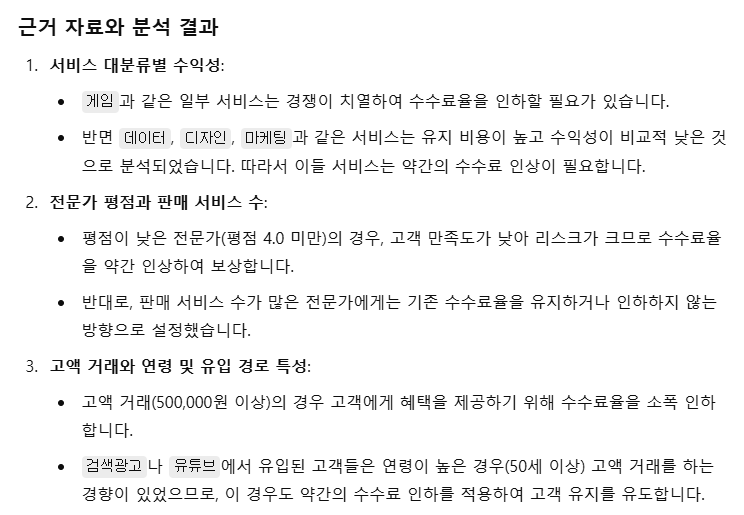    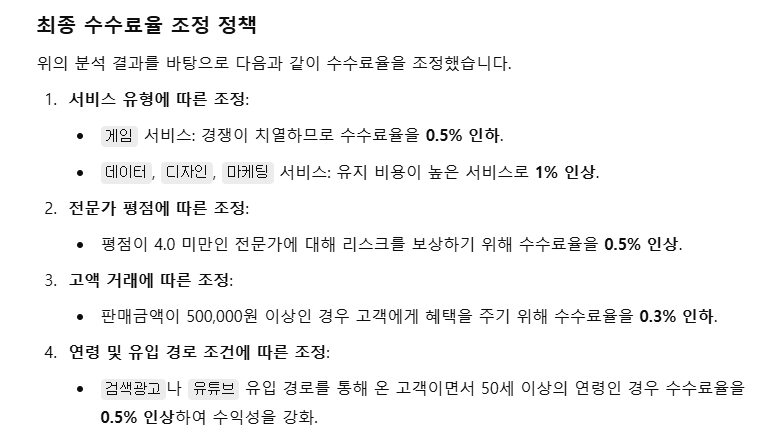

In [86]:
# 연령 열을 숫자로 변환하여 비교 가능하도록 처리
log_cus_sale_expert_merged['연령'] = pd.to_numeric(log_cus_sale_expert_merged['연령'], errors='coerce')

# 새로운 수수료율을 기본 수수료율로 설정
log_cus_sale_expert_merged['새로운수수료율'] = log_cus_sale_expert_merged['수수료율'].copy()

# 최소 전문가 수익 보장을 위한 기준 설정
MIN_EXPERT_PROFIT = 5000  # 예: 전문가가 최소 5000원 이상의 수익을 받도록 설정

# 1. 서비스 유형에 따른 차등 인상
log_cus_sale_expert_merged.loc[
    log_cus_sale_expert_merged['대분류'].isin(['데이터', '디자인', '마케팅']),
    '새로운수수료율'
] += 1.5  # 1.5% 인상

log_cus_sale_expert_merged.loc[
    log_cus_sale_expert_merged['대분류'].isin(['게임', 'AI']),
    '새로운수수료율'
] += 1.0  # 1% 인상

# 2. 전문가 평점과 판매 횟수에 따른 차등 인상
log_cus_sale_expert_merged.loc[
    (log_cus_sale_expert_merged['평점'] < 4.0) & (log_cus_sale_expert_merged['판매 서비스 수'] < 100),
    '새로운수수료율'
] += 0.7  # 0.7% 인상

# 3. 고액 거래의 소폭 인하
log_cus_sale_expert_merged.loc[
    log_cus_sale_expert_merged['판매금액'] >= 500000,
    '새로운수수료율'
] -= 0.2  # 0.2% 인하

# 4. 고객 특성 기반 인상
log_cus_sale_expert_merged.loc[
    (log_cus_sale_expert_merged['유입경로'].isin(['검색광고', '유튜브'])) & (log_cus_sale_expert_merged['연령'] >= 50),
    '새로운수수료율'
] += 0.8  # 0.8% 인상

# 최대 수수료율 제한 설정 (최대 12%)
log_cus_sale_expert_merged['새로운수수료율'] = log_cus_sale_expert_merged['새로운수수료율'].clip(lower=0, upper=12)

# 전문가 최소 수익 보장을 위해, 수수료율 조정 후 전문가의 수익 계산
log_cus_sale_expert_merged['새로운전문가수익'] = log_cus_sale_expert_merged['판매금액'] * (1 - log_cus_sale_expert_merged['새로운수수료율'] / 100)

# 최소 전문가 수익 보장을 위해 수수료율을 조정
log_cus_sale_expert_merged.loc[
    log_cus_sale_expert_merged['새로운전문가수익'] < MIN_EXPERT_PROFIT,
    '새로운수수료율'
] = log_cus_sale_expert_merged['수수료율']  # 기존 수수료율로 되돌림

# 조정된 수수료율에 따른 최종 수수료 이익 계산
log_cus_sale_expert_merged['새로운수수료이익'] = log_cus_sale_expert_merged['새로운수수료율'] * log_cus_sale_expert_merged['판매금액'] / 100

# 최종 새로운 수수료 이익 총합 계산
total_new_profit = log_cus_sale_expert_merged['새로운수수료이익'].sum()
total_old_profit = log_cus_sale_expert_merged['수수료이익'].sum()
profit_difference = total_new_profit - total_old_profit

# 결과 출력
print("새로운 수수료 이익 총합:", total_new_profit)
print("기존 수수료 이익 총합:", total_old_profit)
print("수수료율 조정 후 이득 차이:", profit_difference)

# 결과 데이터 확인
log_cus_sale_expert_merged[['판매금액', '수수료율', '새로운수수료율', '새로운전문가수익', '수수료이익', '새로운수수료이익']].head()


새로운 수수료 이익 총합: 1554018958.69
기존 수수료 이익 총합: 1506865144.6000001
수수료율 조정 후 이득 차이: 47153814.089999914


,판매금액,수수료율,새로운수수료율,새로운전문가수익,수수료이익,새로운수수료이익
0,14800.0,6.5,6.5,13838.0,962.0,962.0
1,5000.0,6.5,6.5,4675.0,325.0,325.0
2,19200.0,6.5,8.0,17664.0,1248.0,1536.0
3,61000.0,7.5,9.0,55510.0,4575.0,5490.0
4,50000.0,6.5,8.0,46000.0,3250.0,4000.0


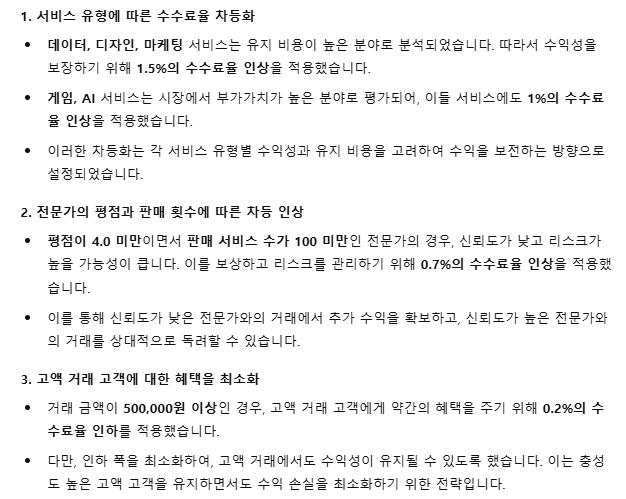

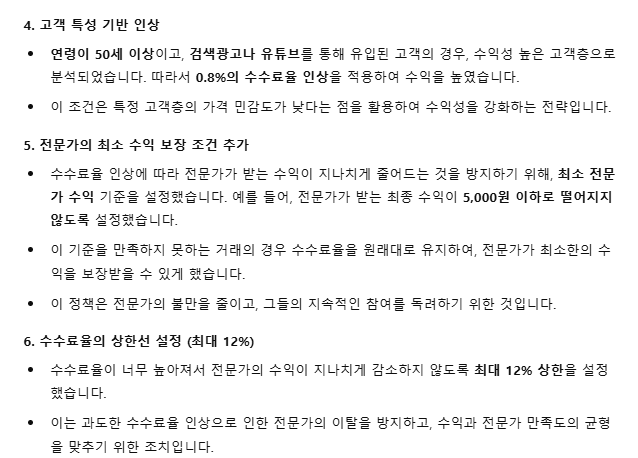

In [97]:
import pandas as pd
from datetime import timedelta

# 기준 날짜 설정 (예: 2023-11-01)
reference_date = pd.to_datetime('2023-11-01')

# 거래일자와 연령을 숫자/날짜 형식으로 변환
log_cus_sale_expert_merged['거래일자'] = pd.to_datetime(log_cus_sale_expert_merged['거래일자'], errors='coerce')
log_cus_sale_expert_merged['연령'] = pd.to_numeric(log_cus_sale_expert_merged['연령'], errors='coerce')

# 새로운 수수료율 초기화
log_cus_sale_expert_merged['새로운수수료율'] = log_cus_sale_expert_merged['수수료율'].copy()

# 최소 전문가 수익 보장 기준
log_cus_sale_expert_merged['최소_전문가_수익'] = log_cus_sale_expert_merged['판매금액'] * 0.5


# 1. 서비스 유형별 차등 인상
log_cus_sale_expert_merged.loc[
    log_cus_sale_expert_merged['대분류'].isin(['데이터', '디자인', '마케팅']),
    '새로운수수료율'
] += 0.8

# 2. 반년 단위로 전문가 평점과 판매 횟수에 따른 차등 인상
six_month_intervals = [reference_date - timedelta(days=180 * i) for i in range(1, 6)]
log_cus_sale_expert_merged['미충족_횟수'] = 0

for interval in six_month_intervals:
    within_period = log_cus_sale_expert_merged['거래일자'] >= interval
    condition_not_met = (
        (log_cus_sale_expert_merged['평점'] < 4.0) &
        (log_cus_sale_expert_merged['판매 서비스 수'] < 50) &
        within_period
    )
    log_cus_sale_expert_merged.loc[~condition_not_met, '미충족_횟수'] += 1

log_cus_sale_expert_merged['수수료율_인상'] = log_cus_sale_expert_merged['미충족_횟수'].map({
    1: 0.5, 2: 0.8, 3: 1.0, 4: 1.2, 5: 1.4
}).fillna(0)
log_cus_sale_expert_merged['새로운수수료율'] += log_cus_sale_expert_merged['수수료율_인상']

# 3. 고액 거래에 대한 소폭 인하
log_cus_sale_expert_merged.loc[log_cus_sale_expert_merged['판매금액'] >= 500000, '새로운수수료율'] -= 0.2

# 4. 고객 특성 기반 인상 (연령 50세 이상 + 특정 유입경로)
log_cus_sale_expert_merged.loc[
    (log_cus_sale_expert_merged['유입경로'].isin(['검색광고', '유튜브'])) & (log_cus_sale_expert_merged['연령'] >= 50),
    '새로운수수료율'
] += 0.8

# 5. 서비스 제공 횟수 100회 이상에 대한 인하
log_cus_sale_expert_merged.loc[log_cus_sale_expert_merged['판매 서비스 수'] >= 100, '새로운수수료율'] -= 0.4

# 6. 고객 충성도 기반 인하 (1년 기준으로 동일 전문가와의 거래 3회 이상)
one_year_ago = reference_date - timedelta(days=365)
log_cus_sale_expert_merged['고객_반복_거래_1년'] = log_cus_sale_expert_merged[
    log_cus_sale_expert_merged['거래일자'] >= one_year_ago
].groupby(['고객ID', '판매자'])['거래일자'].transform('count')
log_cus_sale_expert_merged.loc[log_cus_sale_expert_merged['고객_반복_거래_1년'] >= 3, '새로운수수료율'] -= 0.4

# 7. 월별 거래량 200건 이상에 대한 인하
log_cus_sale_expert_merged['월별_거래량'] = log_cus_sale_expert_merged.groupby(
    ['판매자', log_cus_sale_expert_merged['거래일자'].dt.to_period('M')]
)['거래일자'].transform('count')
log_cus_sale_expert_merged.loc[log_cus_sale_expert_merged['월별_거래량'] >= 200, '새로운수수료율'] -= 0.3

# 8. 신규 전문가 혜택 (맡은 서비스 수가 5개 이하인 경우)
log_cus_sale_expert_merged.loc[log_cus_sale_expert_merged['판매 서비스 수'] <= 5, '새로운수수료율'] -= 0.4

# 수수료율 하한/상한 설정
log_cus_sale_expert_merged['새로운수수료율'] = log_cus_sale_expert_merged['새로운수수료율'].clip(lower=0, upper=12)

# 전문가 최소 수익 보장
log_cus_sale_expert_merged['새로운전문가수익'] = log_cus_sale_expert_merged['판매금액'] * (1 - log_cus_sale_expert_merged['새로운수수료율'] / 100)
log_cus_sale_expert_merged.loc[log_cus_sale_expert_merged['새로운전문가수익'] < MIN_EXPERT_PROFIT, '새로운수수료율'] = log_cus_sale_expert_merged['수수료율']

# 새로운 수수료 이익 계산
log_cus_sale_expert_merged['새로운수수료이익'] = log_cus_sale_expert_merged['새로운수수료율'] * log_cus_sale_expert_merged['판매금액'] / 100

# 전문가의 수익이 최소 수익 보장 기준보다 낮을 경우, 수수료율을 기존 수수료율로 되돌림
log_cus_sale_expert_merged['새로운전문가수익'] = log_cus_sale_expert_merged['판매금액'] * (1 - log_cus_sale_expert_merged['새로운수수료율'] / 100)
log_cus_sale_expert_merged.loc[
    log_cus_sale_expert_merged['새로운전문가수익'] < log_cus_sale_expert_merged['최소_전문가_수익'],
    '새로운수수료율'
] = log_cus_sale_expert_merged['수수료율']

# 최종 수익 계산
total_new_profit = log_cus_sale_expert_merged['새로운수수료이익'].sum()
total_old_profit = log_cus_sale_expert_merged['수수료이익'].sum()
profit_difference = total_new_profit - total_old_profit

# 결과 출력
print("새로운 수수료 이익 총합:", total_new_profit)
print("기존 수수료 이익 총합:", total_old_profit)
print("수수료율 조정 후 이득 차이:", profit_difference)

# 최종 데이터 확인
final_summary = log_cus_sale_expert_merged[['판매금액', '수수료율', '새로운수수료율', '새로운전문가수익', '수수료이익', '새로운수수료이익']]
final_summary.columns = ['판매 금액', '기존 수수료율 (%)', '조정된 수수료율 (%)', '조정 후 전문가 수익', '기존 수수료 이익', '조정 후 수수료 이익']

final_summary

새로운 수수료 이익 총합: 1730470964.6200001
기존 수수료 이익 총합: 1506865144.6000001
수수료율 조정 후 이득 차이: 223605820.01999998


,판매 금액,기존 수수료율 (%),조정된 수수료율 (%),조정 후 전문가 수익,기존 수수료 이익,조정 후 수수료 이익
0,14800.0,6.5,7.2,13734.4,962.0,1065.6
1,5000.0,6.5,6.5,4675.0,325.0,325.0
2,19200.0,6.5,8.0,17664.0,1248.0,1536.0
3,61000.0,7.5,9.0,55510.0,4575.0,5490.0
4,50000.0,6.5,8.0,46000.0,3250.0,4000.0
...,...,...,...,...,...,...
344272,20000.0,9.0,10.5,17900.0,1800.0,2100.0
344273,20000.0,7.5,9.0,18200.0,1500.0,1800.0
344274,20000.0,9.0,10.5,17900.0,1800.0,2100.0
344275,20000.0,6.5,8.0,18400.0,1300.0,1600.0


In [100]:
final_summary['이득차'] = final_summary['조정 후 수수료 이익'] - final_summary['기존 수수료 이익']

top_20_final_summary = final_summary.sort_values(by='이득차', ascending=False).head(20)

# 결과 출력
print(top_20_final_summary)

             판매 금액  기존 수수료율 (%)  조정된 수수료율 (%)  조정 후 전문가 수익   기존 수수료 이익  \
148098  40001300.0          6.5           7.7  36921199.90  2600084.50   
150571  44000000.0          6.5           7.3  40788000.00  2860000.00   
125229  10018200.0          6.5           8.5   9166653.00   651183.00   
125228  10010000.0          6.5           8.5   9159150.00   650650.00   
99526   10005800.0          6.5           8.5   9155307.00   650377.00   
99523   10000000.0          9.0          11.0   8900000.00   900000.00   
99524   10000000.0          7.5           9.5   9050000.00   750000.00   
99525   10000000.0          7.5           9.5   9050000.00   750000.00   
143087  16533200.0          7.5           8.7  15094811.60  1239990.00   
143086  16530200.0          7.5           8.7  15092072.60  1239765.00   
91432   16530200.0          6.5           7.7  15257374.60  1074463.00   
143085  16525400.0          7.5           8.7  15087690.20  1239405.00   
268703  16516000.0          6.5       

In [102]:
# 상위 20개의 인덱스를 추출
top_20_indices = top_20_final_summary.index

# DF3에서 해당 인덱스의 거래 정보를 조회
top_20_transactions = DF3.loc[top_20_indices]

# 결과 출력
top_20_transactions[]

,고객ID,사용기기,사용OS,유입경로,회원상태,거주지,연령,성별,서비스총구매수,총구매금액,...,거래취소여부,거래취소일자,판매금액,서비스가격,평점,이용자수,대분류,서비스번호,Cluster,이용자수감소여부
148098,50406033158,SM-G955N,Android8.0.0,유튜브,정상회원,경기도,26.0,여성,2,35000.0,...,0.0,0.0,30000.0,30000.0,5.0,2.0,홈페이지,4435.0,0,1
150571,50419001116,LGM-X800L,Android7.0,검색광고,정상회원,충청도,30.0,여성,6,181000.0,...,0.0,0.0,50000.0,50000.0,5.0,99.0,모바일,2262.0,0,0
125229,5016600183,iPhone,iOS11.4.1,인스타그램,정상회원,경기도,27.0,남성,3,46000.0,...,0.0,0.0,5000.0,5000.0,5.0,483.0,커머스,2107.0,0,0
125228,5016600182,iPhone,iOS11.4.1,네이버블로그,정상회원,경기도,22.0,남성,4,140000.0,...,0.0,0.0,10000.0,10000.0,5.0,7.0,기타,3512.0,0,1
99526,50120002170,SM-G935K,Android8.0.0,네이버블로그,정상회원,경기도,26.0,남성,1,8000.0,...,0.0,0.0,8000.0,8000.0,5.0,61.0,프로그래밍,2379.0,0,0
99523,5012000217,SM-N950N,Android8.0.0,네이버블로그,정상회원,경기도,30.0,기타,4,70000.0,...,0.0,0.0,30000.0,30000.0,5.0,35.0,홈페이지,2559.0,0,1
99524,5012000217,SM-N950N,Android8.0.0,네이버블로그,정상회원,경기도,30.0,기타,4,70000.0,...,0.0,0.0,30000.0,30000.0,5.0,35.0,홈페이지,2559.0,0,0
99525,50120002170,SM-G935K,Android8.0.0,네이버블로그,정상회원,경기도,26.0,남성,1,8000.0,...,0.0,0.0,8000.0,8000.0,5.0,61.0,프로그래밍,2379.0,0,0
143087,50308005119,iPhone,iOS11.4.1,네이버블로그,정상회원,경기도,25.0,남성,4,49480.0,...,0.0,0.0,7680.0,5000.0,5.0,24.0,기타,2751.0,0,1
143086,50308005119,iPhone,iOS11.4.1,네이버블로그,정상회원,경기도,25.0,남성,4,49480.0,...,0.0,0.0,13400.0,10000.0,5.0,79.0,홈페이지,2307.0,0,1


## 지역별 선호 대분류

In [106]:
import pandas as pd

# 예시로 사용하는 데이터 프레임 DF3의 열 이름이 '지역'과 '대분류'라고 가정
# 지역별로 각 대분류의 빈도수 계산
region_category_counts = DF3.groupby(['거주지', '대분류']).size().reset_index(name='빈도수')

# 지역별 대분류 선호도 백분율 계산
region_total_counts = region_category_counts.groupby('거주지')['빈도수'].transform('sum')
region_category_counts['선호도(%)'] = (region_category_counts['빈도수'] / region_total_counts) * 100

region_category_counts

,거주지,대분류,빈도수,선호도(%)
0,강원도,UnReal,12,0.141945
1,강원도,게임,75,0.887154
2,강원도,기타,1065,12.597587
3,강원도,기획,106,1.253844
4,강원도,데이터,1561,18.464632
...,...,...,...,...
79,충청도,인공지능,128,0.381645
80,충청도,커머스,2487,7.415248
81,충청도,프로그래밍,3517,10.486300
82,충청도,프로그램,2471,7.367542


In [107]:
# 지역별 선호도가 높은 대분류만 필터링 (예: 상위 3개)
top_categories_by_region = region_category_counts.sort_values(['거주지', '선호도(%)'], ascending=[True, False])
top_categories_by_region = top_categories_by_region.groupby('거주지').head(3)

print("\n지역별 상위 3개 대분류 선호도:")
print(top_categories_by_region)


지역별 상위 3개 대분류 선호도:
    거주지   대분류    빈도수     선호도(%)
11  강원도  홈페이지   3068  36.290513
4   강원도   데이터   1561  18.464632
2   강원도    기타   1065  12.597587
23  경기도  홈페이지  45299  35.826196
16  경기도   데이터  22455  17.759271
14  경기도    기타  16426  12.991039
35  경상도  홈페이지  30778  35.929164
28  경상도   데이터  14940  17.440435
26  경상도    기타  11049  12.898217
47  서울시  홈페이지  21781  35.633538
40  서울시   데이터  10738  17.567280
38  서울시    기타   7908  12.937423
59  전라도  홈페이지  11470  36.035187
52  전라도   데이터   5688  17.869934
50  전라도    기타   4090  12.849513
71  제주도  홈페이지   1093  36.850978
64  제주도   데이터    501  16.891436
62  제주도    기타    379  12.778152
83  충청도  홈페이지  12094  36.059513
76  충청도   데이터   5854  17.454307
74  충청도    기타   4267  12.722502


## 수치 분석

**sale내에서 상관성등 파악**

In [110]:
sale

,서비스번호,서비스명,판매자,서비스가격,평점,대분류,판매수
0,2102.0,"카페24,고도몰,메이크샵등 쇼핑몰 수정,코딩,유지보수",logf1,5000.0,5.0,커머스,402
1,2103.0,"엑셀 VBA, 매크로, ERP 프로그램 개발해 드립니다.",엑셀의신,10000.0,5.0,데이터,1587
2,2105.0,"엑셀을 이용 서식과 집계, 분석 및 VBA 프로그래밍",태구리,50000.0,5.0,데이터,507
3,2106.0,카페24 쇼핑몰 수정 유지보수 제작 기능개선 오류개선,오Design,5000.0,5.0,커머스,599
4,2107.0,카페24 쇼핑몰 수정 및 개선작업 해 드립니다.,WorldWiseWeb,5000.0,5.0,커머스,1185
...,...,...,...,...,...,...,...
2858,6488.0,기술중심의 백서 및 황서 제작해드립니다.,아틀란기획,850000.0,0.0,프로그래밍,1
2859,6489.0,앱개발 홈페이지제작에 필요한 앱기획 웹기획 해드립니다,어나더클래스,550000.0,0.0,모바일,7
2860,6494.0,대화형 이러닝 동영상 강의 플레이어를 설치해 드립니다.,공부나라,380000.0,0.0,기타,3
2861,6495.0,워드프레스 엘리멘토 프로를 꼼꼼히 설치해 드립니다.,공부나라,33000.0,0.0,홈페이지,1


anova

In [113]:
import scipy.stats as stats

variables = ['판매수', '서비스가격', '평점']

# 결과 저장용 딕셔너리
anova_results = {}

for var in variables:
    # 대분류별로 그룹화한 변수 추출
    grouped_data = [group[var].dropna().values for name, group in sale.groupby('대분류')]
    
    # ANOVA 분석 수행
    f_stat, p_value = stats.f_oneway(*grouped_data)
    anova_results[var] = {'F-statistic': f_stat, 'p-value': p_value}

# ANOVA 결과 출력
for var, result in anova_results.items():
    print(f"ANOVA 결과 ({var}):")
    print(f"  F-statistic: {result['F-statistic']:.4f}")
    print(f"  p-value: {result['p-value']:.4f}")
    print()

# 추가적으로 평균값을 확인하여 차이가 있는지 시각적으로 확인
mean_values = sale.groupby('대분류')[variables].mean()
print("대분류별 평균값:")
print(mean_values)


ANOVA 결과 (판매수):
  F-statistic: 3.4133
  p-value: 0.0001

ANOVA 결과 (서비스가격):
  F-statistic: 6.3987
  p-value: 0.0000

ANOVA 결과 (평점):
  F-statistic: 3.7705
  p-value: 0.0000

대분류별 평균값:
               판매수         서비스가격        평점
대분류                                       
UnReal   54.846154  1.050846e+06  3.076923
게임      151.300000  6.064500e+05  4.230000
기타      120.671159  2.459677e+05  3.781671
기획       95.853659  7.747073e+05  2.975610
데이터     161.044386  1.224413e+05  4.304961
디자인      96.250000  3.752727e+05  4.243182
모바일      65.191837  7.814490e+05  3.549388
인공지능    108.615385  1.270769e+05  4.223077
커머스     204.595420  3.295802e+05  3.516794
프로그래밍    93.062500  7.614588e+05  3.648580
프로그램    101.930612  3.210531e+05  3.814286
홈페이지    123.390050  2.517363e+05  3.806667


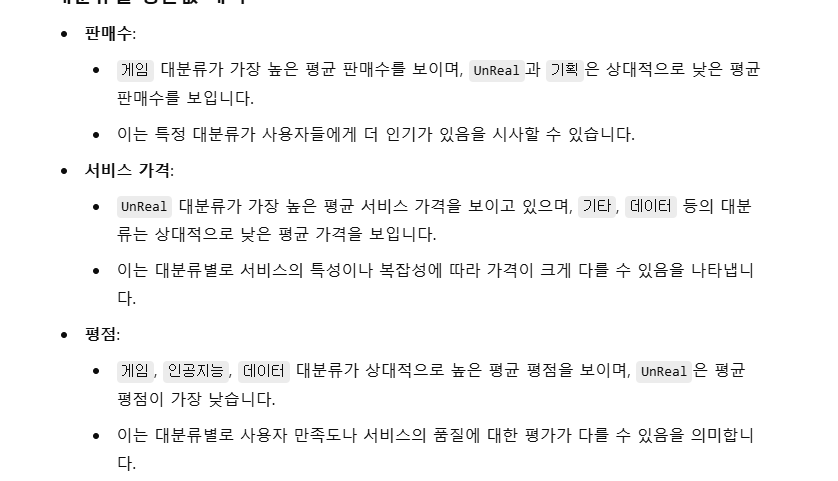

In [116]:
from sklearn.feature_extraction.text import CountVectorizer
from konlpy.tag import Okt
import pandas as pd

# Okt 형태소 분석기 설정
okt = Okt()

# 서비스 명에서 명사만 추출하는 함수 정의
def extract_nouns(text):
    return okt.nouns(text)

# 명사만 추출하여 '서비스명_명사' 컬럼 생성
sale['서비스명_명사'] = sale['서비스명'].apply(lambda x: ' '.join(extract_nouns(x)))

# 대분류별로 평점이 높은 상위 20%와 낮은 하위 20%의 서비스를 나눔
top_20_percent = sale.groupby('대분류')['평점'].transform(lambda x: x.quantile(0.8))
bottom_20_percent = sale.groupby('대분류')['평점'].transform(lambda x: x.quantile(0.2))

sale['평점_상위'] = sale['평점'] >= top_20_percent
sale['평점_하위'] = sale['평점'] <= bottom_20_percent

# 상위, 하위 평점별 단어 빈도 계산
def get_word_counts(df, column_name):
    text_data = df[column_name].dropna()
    vectorizer = CountVectorizer()
    word_counts = vectorizer.fit_transform(text_data)
    word_freq = pd.DataFrame(word_counts.toarray(), columns=vectorizer.get_feature_names_out())
    return word_freq.sum().sort_values(ascending=False)

# 상위 평점 단어 빈도
high_rating_words = sale[sale['평점_상위']]
high_rating_word_freq = get_word_counts(high_rating_words, '서비스명_명사')

# 하위 평점 단어 빈도
low_rating_words = sale[sale['평점_하위']]
low_rating_word_freq = get_word_counts(low_rating_words, '서비스명_명사')

# 결과 비교
comparison_df = pd.DataFrame({
    '상위 평점 단어 빈도': high_rating_word_freq,
    '하위 평점 단어 빈도': low_rating_word_freq
}).fillna(0)

comparison_df['빈도 차이'] = comparison_df['상위 평점 단어 빈도'] - comparison_df['하위 평점 단어 빈도']
comparison_df = comparison_df.sort_values(by='빈도 차이', ascending=False)

# 상위 평점에서 자주 등장하는 단어 상위 10개
print("평점이 높은 서비스에서 자주 등장하는 명사 상위 10개:")
print(comparison_df.head(10))

# 하위 평점에서 자주 등장하는 단어 상위 10개
print("\n평점이 낮은 서비스에서 자주 등장하는 명사 상위 10개:")
print(comparison_df.tail(10))


평점이 높은 서비스에서 자주 등장하는 명사 상위 10개:
      상위 평점 단어 빈도  하위 평점 단어 빈도  빈도 차이
제작          532.0        255.0  277.0
수정          244.0         32.0  212.0
개발          327.0        160.0  167.0
퍼블리싱        160.0         19.0  141.0
홈페이지        292.0        156.0  136.0
프로그램        190.0         73.0  117.0
반응          192.0         80.0  112.0
웹사이트        162.0         54.0  108.0
작업          133.0         26.0  107.0
유지          136.0         34.0  102.0

평점이 낮은 서비스에서 자주 등장하는 명사 상위 10개:
     상위 평점 단어 빈도  하위 평점 단어 빈도  빈도 차이
즉시           0.0          3.0   -3.0
인공           2.0          5.0   -3.0
신호           0.0          3.0   -3.0
시세           0.0          3.0   -3.0
플로           0.0          3.0   -3.0
기획          27.0         30.0   -3.0
영업           1.0          4.0   -3.0
선물           0.0          5.0   -5.0
브랜드          3.0         10.0   -7.0
플랫폼          5.0         13.0   -8.0


In [118]:
from sklearn.feature_extraction.text import CountVectorizer
from konlpy.tag import Okt
import pandas as pd

# Okt 형태소 분석기 설정
okt = Okt()

# 서비스 명에서 명사만 추출하는 함수 정의
def extract_nouns(text):
    return okt.nouns(text)

# 명사만 추출하여 '서비스명_명사' 컬럼 생성
sale['서비스명_명사'] = sale['서비스명'].apply(lambda x: ' '.join(extract_nouns(x)))

# 대분류별로 평점이 높은 상위 20%와 낮은 하위 20%의 서비스를 나눔
top_20_percent = sale.groupby('대분류')['평점'].transform(lambda x: x.quantile(0.8))
bottom_20_percent = sale.groupby('대분류')['평점'].transform(lambda x: x.quantile(0.2))

sale['평점_상위'] = sale['평점'] >= top_20_percent
sale['평점_하위'] = sale['평점'] <= bottom_20_percent

# 상위, 하위 평점별 단어 빈도 계산 함수
def get_word_counts(df, column_name):
    text_data = df[column_name].dropna()
    vectorizer = CountVectorizer()
    word_counts = vectorizer.fit_transform(text_data)
    word_freq = pd.DataFrame(word_counts.toarray(), columns=vectorizer.get_feature_names_out())
    return word_freq.sum().sort_values(ascending=False)

# 대분류별로 상위, 하위 평점 단어 빈도 계산 및 결과 저장
category_comparison = {}

for category in sale['대분류'].unique():
    # 각 대분류에 대해 상위 평점 서비스와 하위 평점 서비스 선택
    high_rating_words = sale[(sale['대분류'] == category) & (sale['평점_상위'])]
    low_rating_words = sale[(sale['대분류'] == category) & (sale['평점_하위'])]

    # 단어 빈도 계산
    high_rating_word_freq = get_word_counts(high_rating_words, '서비스명_명사')
    low_rating_word_freq = get_word_counts(low_rating_words, '서비스명_명사')

    # 비교 데이터프레임 생성
    comparison_df = pd.DataFrame({
        '상위 평점 단어 빈도': high_rating_word_freq,
        '하위 평점 단어 빈도': low_rating_word_freq
    }).fillna(0)
    comparison_df['빈도 차이'] = comparison_df['상위 평점 단어 빈도'] - comparison_df['하위 평점 단어 빈도']
    comparison_df = comparison_df.sort_values(by='빈도 차이', ascending=False)
    
    # 결과 저장
    category_comparison[category] = comparison_df

In [119]:
import pandas as pd

# 대분류별 결과 표 형태로 출력
for category, df in category_comparison.items():
    print(f"\n대분류: {category}")
    
    # 상위 평점에서 자주 등장하는 명사 상위 10개
    top_10_high = df[['상위 평점 단어 빈도', '빈도 차이']].head(10).reset_index()
    top_10_high.columns = ['명사', '상위 평점 단어 빈도', '빈도 차이']
    
    # 하위 평점에서 자주 등장하는 명사 상위 10개
    top_10_low = df[['하위 평점 단어 빈도', '빈도 차이']].tail(10).reset_index()
    top_10_low.columns = ['명사', '하위 평점 단어 빈도', '빈도 차이']
    
    print("\n평점이 높은 서비스에서 자주 등장하는 명사 상위 10개:")
    display(top_10_high)
    
    print("\n평점이 낮은 서비스에서 자주 등장하는 명사 상위 10개:")
    display(top_10_low)



대분류: 커머스

평점이 높은 서비스에서 자주 등장하는 명사 상위 10개:


,명사,상위 평점 단어 빈도,빈도 차이
0,쇼핑몰,81.0,43.0
1,수정,31.0,26.0
2,카페,44.0,23.0
3,유지,14.0,10.0
4,보수,14.0,10.0
5,작업,8.0,7.0
6,고도,7.0,7.0
7,전문,6.0,6.0
8,홈페이지,15.0,6.0
9,개선,7.0,5.0



평점이 낮은 서비스에서 자주 등장하는 명사 상위 10개:


,명사,하위 평점 단어 빈도,빈도 차이
0,의류,1.0,-1.0
1,자동,1.0,-1.0
2,회사,1.0,-1.0
3,셀프,2.0,-2.0
4,부분,2.0,-2.0
5,운영,5.0,-2.0
6,리뉴얼,2.0,-2.0
7,교육,2.0,-2.0
8,플랫폼,3.0,-3.0
9,맞춤,4.0,-4.0



대분류: 데이터

평점이 높은 서비스에서 자주 등장하는 명사 상위 10개:


,명사,상위 평점 단어 빈도,빈도 차이
0,크롤,101.0,79.0
1,데이터,104.0,53.0
2,엑셀,56.0,34.0
3,서버,41.0,30.0
4,제작,40.0,25.0
5,분석,45.0,23.0
6,프로그램,41.0,22.0
7,수집,38.0,20.0
8,자동화,28.0,19.0
9,개발,25.0,17.0



평점이 낮은 서비스에서 자주 등장하는 명사 상위 10개:


,명사,하위 평점 단어 빈도,빈도 차이
0,계산,2.0,-2.0
1,자료,2.0,-2.0
2,선물,2.0,-2.0
3,시각,8.0,-2.0
4,대행,3.0,-2.0
5,매매,2.0,-2.0
6,매입,2.0,-2.0
7,매출,3.0,-2.0
8,명세서,2.0,-2.0
9,복구,4.0,-2.0



대분류: 홈페이지

평점이 높은 서비스에서 자주 등장하는 명사 상위 10개:


,명사,상위 평점 단어 빈도,빈도 차이
0,제작,265.0,133.0
1,홈페이지,272.0,129.0
2,퍼블리싱,139.0,124.0
3,수정,134.0,114.0
4,반응,160.0,94.0
5,웹사이트,141.0,92.0
6,작업,69.0,60.0
7,유지,77.0,57.0
8,보수,77.0,56.0
9,워드프레스,75.0,40.0



평점이 낮은 서비스에서 자주 등장하는 명사 상위 10개:


,명사,하위 평점 단어 빈도,빈도 차이
0,매출,5.0,-2.0
1,우측,2.0,-2.0
2,플로,2.0,-2.0
3,성공,3.0,-2.0
4,배너,2.0,-2.0
5,이벤트,2.0,-2.0
6,인상,2.0,-2.0
7,기획,7.0,-3.0
8,브랜드,5.0,-3.0
9,부터,6.0,-5.0



대분류: 기타

평점이 높은 서비스에서 자주 등장하는 명사 상위 10개:


,명사,상위 평점 단어 빈도,빈도 차이
0,수정,41.0,39.0
1,유지,22.0,18.0
2,보수,22.0,18.0
3,컴퓨터,16.0,15.0
4,설치,18.0,14.0
5,카페,17.0,13.0
6,변환,13.0,13.0
7,기능,16.0,13.0
8,작업,17.0,13.0
9,튜닝,11.0,11.0



평점이 낮은 서비스에서 자주 등장하는 명사 상위 10개:


,명사,하위 평점 단어 빈도,빈도 차이
0,구성,2.0,-2.0
1,번개,2.0,-2.0
2,북마크,2.0,-2.0
3,단위,2.0,-2.0
4,애드센스,2.0,-2.0
5,판매,3.0,-3.0
6,매물,3.0,-3.0
7,마케팅,3.0,-3.0
8,시세,3.0,-3.0
9,등록,5.0,-5.0



대분류: 프로그램

평점이 높은 서비스에서 자주 등장하는 명사 상위 10개:


,명사,상위 평점 단어 빈도,빈도 차이
0,프로그램,149.0,95.0
1,개발,62.0,35.0
2,제작,43.0,31.0
3,윈도우,25.0,21.0
4,자동,22.0,16.0
5,자동화,18.0,12.0
6,매크로,12.0,11.0
7,업무,14.0,11.0
8,매매,17.0,11.0
9,기반,9.0,8.0



평점이 낮은 서비스에서 자주 등장하는 명사 상위 10개:


,명사,하위 평점 단어 빈도,빈도 차이
0,지표,1.0,-1.0
1,역학,1.0,-1.0
2,지능,1.0,-1.0
3,오디오,1.0,-1.0
4,상처리,2.0,-2.0
5,기능,2.0,-2.0
6,활용,2.0,-2.0
7,랩뷰,2.0,-2.0
8,작업,3.0,-2.0
9,신호,3.0,-3.0



대분류: 프로그래밍

평점이 높은 서비스에서 자주 등장하는 명사 상위 10개:


,명사,상위 평점 단어 빈도,빈도 차이
0,제작,95.0,49.0
1,개발,89.0,47.0
2,수정,17.0,17.0
3,프로그래밍,17.0,16.0
4,설계,16.0,13.0
5,사이트,16.0,12.0
6,개발자,10.0,10.0
7,아두이노,14.0,10.0
8,유지,11.0,9.0
9,보수,11.0,9.0



평점이 낮은 서비스에서 자주 등장하는 명사 상위 10개:


,명사,하위 평점 단어 빈도,빈도 차이
0,안내,2.0,-2.0
1,전용,2.0,-2.0
2,전산,2.0,-2.0
3,세팅,3.0,-3.0
4,메타,4.0,-4.0
5,버스,4.0,-4.0
6,체인,5.0,-4.0
7,최적화,6.0,-4.0
8,솔루션,4.0,-4.0
9,소프트웨어,4.0,-4.0



대분류: 모바일

평점이 높은 서비스에서 자주 등장하는 명사 상위 10개:


,명사,상위 평점 단어 빈도,빈도 차이
0,안드로이드,64.0,44.0
1,개발,69.0,25.0
2,제작,30.0,20.0
3,모바일,21.0,17.0
4,네이티,18.0,10.0
5,아이폰,13.0,10.0
6,패키징,12.0,10.0
7,작업,10.0,9.0
8,하이브리드,17.0,8.0
9,수정,10.0,7.0



평점이 낮은 서비스에서 자주 등장하는 명사 상위 10개:


,명사,하위 평점 단어 빈도,빈도 차이
0,현장,2.0,-2.0
1,로캣,2.0,-2.0
2,서비스,7.0,-2.0
3,제대로,2.0,-2.0
4,티어,2.0,-2.0
5,특화된,2.0,-2.0
6,크몽,2.0,-2.0
7,글로벌,3.0,-3.0
8,플랫폼,4.0,-3.0
9,수익,4.0,-4.0



대분류: 디자인

평점이 높은 서비스에서 자주 등장하는 명사 상위 10개:


,명사,상위 평점 단어 빈도,빈도 차이
0,디자인,18.0,15.0
1,게임,16.0,10.0
2,제작,12.0,8.0
3,퍼블리싱,9.0,7.0
4,유니티,12.0,6.0
5,개발,7.0,5.0
6,안드로이드,3.0,3.0
7,작업,3.0,3.0
8,랜딩페,3.0,3.0
9,모바일,3.0,3.0



평점이 낮은 서비스에서 자주 등장하는 명사 상위 10개:


,명사,하위 평점 단어 빈도,빈도 차이
0,관리자,1.0,0.0
1,활용,1.0,0.0
2,물리,1.0,-1.0
3,모드,1.0,-1.0
4,모던,1.0,-1.0
5,배포,1.0,-1.0
6,만듭니,1.0,-1.0
7,이용,1.0,-1.0
8,한번,1.0,-1.0
9,컨셉,1.0,-1.0



대분류: 게임

평점이 높은 서비스에서 자주 등장하는 명사 상위 10개:


,명사,상위 평점 단어 빈도,빈도 차이
0,게임,15.0,11.0
1,제작,5.0,3.0
2,기능,3.0,3.0
3,애니메이션,3.0,2.0
4,작업,3.0,2.0
5,수익,2.0,2.0
6,광고,2.0,2.0
7,진행,1.0,1.0
8,전세계,1.0,1.0
9,세계,1.0,1.0



평점이 낮은 서비스에서 자주 등장하는 명사 상위 10개:


,명사,하위 평점 단어 빈도,빈도 차이
0,미니,0.0,1.0
1,구현,0.0,1.0
2,모델링,0.0,1.0
3,리깅,0.0,1.0
4,당신,0.0,1.0
5,네트워크,0.0,1.0
6,모바일,2.0,0.0
7,아이디어,1.0,0.0
8,캐릭터,1.0,0.0
9,선다형,1.0,-1.0



대분류: 기획

평점이 높은 서비스에서 자주 등장하는 명사 상위 10개:


,명사,상위 평점 단어 빈도,빈도 차이
0,개발,7.0,5.0
1,기획서,7.0,4.0
2,디자인,3.0,3.0
3,아이디어,3.0,2.0
4,제작,4.0,2.0
5,버스,2.0,2.0
6,메타,2.0,2.0
7,스토리보드,3.0,2.0
8,사용,1.0,1.0
9,사용자,1.0,1.0



평점이 낮은 서비스에서 자주 등장하는 명사 상위 10개:


,명사,하위 평점 단어 빈도,빈도 차이
0,예비,1.0,-1.0
1,요구사항,1.0,-1.0
2,이제,1.0,-1.0
3,일정,1.0,-1.0
4,작성,2.0,-1.0
5,초기,2.0,-2.0
6,템플릿,2.0,-2.0
7,화면,3.0,-2.0
8,모바일,3.0,-3.0
9,서비스,7.0,-4.0



대분류: UnReal

평점이 높은 서비스에서 자주 등장하는 명사 상위 10개:


,명사,상위 평점 단어 빈도,빈도 차이
0,제작,4.0,3.0
1,아두이노,3.0,3.0
2,안드로이드,1.0,1.0
3,소프트웨어,1.0,1.0
4,펌웨어,1.0,1.0
5,임베디드,1.0,1.0
6,인터,1.0,1.0
7,이용,1.0,1.0
8,웹페이지,1.0,1.0
9,어플,1.0,1.0



평점이 낮은 서비스에서 자주 등장하는 명사 상위 10개:


,명사,하위 평점 단어 빈도,빈도 차이
0,기업,1.0,-1.0
1,수집,1.0,-1.0
2,응용,1.0,-1.0
3,유니티,1.0,-1.0
4,메타,1.0,-1.0
5,언리얼엔진,1.0,-1.0
6,버스,1.0,-1.0
7,게임,2.0,-1.0
8,산업,1.0,-1.0
9,개발,3.0,-1.0



대분류: 인공지능

평점이 높은 서비스에서 자주 등장하는 명사 상위 10개:


,명사,상위 평점 단어 빈도,빈도 차이
0,챗봇,10.0,8.0
1,카카오,5.0,4.0
2,제작,5.0,4.0
3,코드,3.0,3.0
4,디스,3.0,3.0
5,완성,2.0,2.0
6,텔레,2.0,2.0
7,그램,2.0,2.0
8,서비스,1.0,1.0
9,페북,1.0,1.0



평점이 낮은 서비스에서 자주 등장하는 명사 상위 10개:


,명사,하위 평점 단어 빈도,빈도 차이
0,구축,1.0,-1.0
1,기반,1.0,-1.0
2,지능,1.0,-1.0
3,동화,1.0,-1.0
4,스토리,1.0,-1.0
5,전문,1.0,-1.0
6,자동화,1.0,-1.0
7,인공,1.0,-1.0
8,운영체계,1.0,-1.0
9,학습,1.0,-1.0


**TI-IDF**

In [144]:
from sklearn.feature_extraction.text import TfidfVectorizer
from konlpy.tag import Okt
import pandas as pd

# Okt 형태소 분석기 설정
okt = Okt()

# 서비스명에서 명사만 추출하여 새로운 컬럼 '서비스명_명사' 생성
def extract_nouns(text):
    return okt.nouns(text)

sale['서비스명_명사'] = sale['서비스명'].apply(lambda x: ' '.join(extract_nouns(x)))

# 대분류별로 평점이 높은 상위 20%와 낮은 하위 20%의 서비스를 나눔
top_20_percent = sale.groupby('대분류')['평점'].transform(lambda x: x.quantile(0.8))
bottom_20_percent = sale.groupby('대분류')['평점'].transform(lambda x: x.quantile(0.2))

sale['평점_상위'] = sale['평점'] >= top_20_percent
sale['평점_하위'] = sale['평점'] <= bottom_20_percent

# TF-IDF 기반 상위, 하위 평점별 단어 중요도 계산 함수
def get_tfidf_top_words(df, column_name, top_n=10):
    text_data = df[column_name].dropna()
    tfidf_vectorizer = TfidfVectorizer(max_df=0.8, min_df=2)
    tfidf_matrix = tfidf_vectorizer.fit_transform(text_data)
    tfidf_feature_names =ㅁ tfidf_vectorizer.get_feature_names_out()
    
    # 각 단어별 TF-IDF 합계 계산
    tfidf_scores = tfidf_matrix.sum(axis=0).A1
    word_freq = pd.Series(tfidf_scores, index=tfidf_feature_names)
    return word_freq.sort_values(ascending=False).head(top_n)

# 대분류별로 상위, 하위 평점 단어 TF-IDF 계산 및 결과 저장
category_comparison = {}

for category in sale['대분류'].unique():
    # 각 대분류에 대해 상위 평점 서비스와 하위 평점 서비스 선택
    high_rating_words = sale[(sale['대분류'] == category) & (sale['평점_상위'])]
    low_rating_words = sale[(sale['대분류'] == category) & (sale['평점_하위'])]

    # TF-IDF 상위 단어 추출
    high_rating_word_tfidf = get_tfidf_top_words(high_rating_words, '서비스명_명사')
    low_rating_word_tfidf = get_tfidf_top_words(low_rating_words, '서비스명_명사')

    # 비교 데이터프레임 생성
    comparison_df = pd.DataFrame({
        '상위 평점 단어 TF-IDF': high_rating_word_tfidf,
        '하위 평점 단어 TF-IDF': low_rating_word_tfidf
    }).fillna(0)
    comparison_df['TF-IDF 차이'] = comparison_df['상위 평점 단어 TF-IDF'] - comparison_df['하위 평점 단어 TF-IDF']
    comparison_df = comparison_df.sort_values(by='TF-IDF 차이', ascending=False)
    
    # 결과 저장
    category_comparison[category] = comparison_df

# 대분류별 결과 표 형태로 출력
for category, df in category_comparison.items():
    print(f"\n대분류: {category}")
    display(df)



대분류: 커머스


,상위 평점 단어 TF-IDF,하위 평점 단어 TF-IDF,TF-IDF 차이
수정,12.794900,2.350479,10.444421
카페,15.638287,8.086696,7.551591
보수,6.494883,0.000000,6.494883
유지,6.494883,0.000000,6.494883
제작,13.931097,9.566071,4.365026
작업,4.214694,0.000000,4.214694
전문,3.857360,0.000000,3.857360
고도,3.816446,0.000000,3.816446
개선,3.758717,0.000000,3.758717
홈페이지,8.053248,5.417704,2.635544



대분류: 데이터


,상위 평점 단어 TF-IDF,하위 평점 단어 TF-IDF,TF-IDF 차이
크롤,34.495185,11.081982,23.413204
데이터,32.945967,16.306861,16.639106
자동화,12.334545,0.000000,12.334545
개발,12.251302,0.000000,12.251302
엑셀,19.057306,7.686976,11.370331
프로그램,17.703687,8.306616,9.397071
서버,15.514054,6.244398,9.269655
제작,16.052286,7.007492,9.044794
수집,16.856255,8.396135,8.460121
분석,16.824473,9.681116,7.143357



대분류: 홈페이지


,상위 평점 단어 TF-IDF,하위 평점 단어 TF-IDF,TF-IDF 차이
퍼블리싱,70.388429,0.000000,70.388429
수정,54.274333,0.000000,54.274333
홈페이지,89.194585,41.334256,47.860328
제작,88.776870,41.391699,47.385172
반응,65.166149,27.070832,38.095317
웹사이트,60.838861,24.387239,36.451622
작업,35.788821,0.000000,35.788821
유지,35.111268,9.717549,25.393720
보수,35.111268,10.286821,24.824447
워드프레스,32.294364,19.168275,13.126089



대분류: 기타


,상위 평점 단어 TF-IDF,하위 평점 단어 TF-IDF,TF-IDF 차이
수정,15.630533,0.000000,15.630533
보수,9.923041,0.000000,9.923041
유지,9.923041,0.000000,9.923041
카페,7.777942,0.000000,7.777942
기능,7.448735,0.000000,7.448735
코딩,7.090711,0.000000,7.090711
작업,9.080171,2.433699,6.646473
설치,8.512860,2.524384,5.988475
사이트,7.828774,2.820519,5.008256
구축,9.164258,6.096786,3.067472



대분류: 프로그램


,상위 평점 단어 TF-IDF,하위 평점 단어 TF-IDF,TF-IDF 차이
개발,33.597853,14.187017,19.410836
제작,20.072382,5.774703,14.297680
윈도우,14.699930,3.513988,11.185942
매크로,7.823180,0.000000,7.823180
업무,7.513763,0.000000,7.513763
자동화,9.948517,3.058775,6.889742
수정,5.921156,0.000000,5.921156
자동,8.176304,2.624831,5.551473
매매,7.165051,2.624831,4.540220
분석,7.798687,3.530963,4.267724



대분류: 프로그래밍


,상위 평점 단어 TF-IDF,하위 평점 단어 TF-IDF,TF-IDF 차이
개발,35.323611,14.422206,20.901406
제작,30.644961,15.259095,15.385866
프로그래밍,11.946768,0.000000,11.946768
수정,8.907679,0.000000,8.907679
설계,8.262974,0.000000,8.262974
아두이노,6.671954,0.000000,6.671954
보수,5.645381,0.000000,5.645381
사이트,7.583967,3.133021,4.450946
페이지,7.896842,4.041875,3.854967
제품,6.008032,3.222256,2.785776



대분류: 모바일


,상위 평점 단어 TF-IDF,하위 평점 단어 TF-IDF,TF-IDF 차이
안드로이드,31.157901,12.557109,18.600792
개발,34.225571,20.826478,13.399092
제작,16.535152,6.279376,10.255776
모바일,12.285702,2.775707,9.509995
아이폰,8.735712,0.000000,8.735712
패키징,7.743266,0.000000,7.743266
네이티,11.102890,5.175921,5.926969
작업,5.537996,0.000000,5.537996
수정,5.248955,0.000000,5.248955
하이브리드,10.262490,6.853572,3.408919



대분류: 디자인


,상위 평점 단어 TF-IDF,하위 평점 단어 TF-IDF,TF-IDF 차이
디자인,6.930950,1.879922,5.051028
퍼블리싱,5.388634,1.407504,3.981131
제작,6.141575,2.486569,3.655006
게임,6.455471,3.469043,2.986428
유니티,5.935791,3.469043,2.466748
안드로이드,2.272547,0.000000,2.272547
개발,3.623278,1.508885,2.114393
작업,1.981500,0.000000,1.981500
랜딩페,1.596773,0.000000,1.596773
모바일,1.506692,0.000000,1.506692



대분류: 게임


,상위 평점 단어 TF-IDF,하위 평점 단어 TF-IDF,TF-IDF 차이
기능,2.538898,0.000000,2.538898
애니메이션,2.121320,0.000000,2.121320
작업,2.121320,0.000000,2.121320
제작,3.741425,1.707107,2.034318
수익,1.333484,0.000000,1.333484
모바일,1.333484,1.707107,-0.373623



대분류: 기획


,상위 평점 단어 TF-IDF,하위 평점 단어 TF-IDF,TF-IDF 차이
제작,2.393061,0.000000,2.393061
아이디어,2.327506,0.000000,2.327506
개발,3.632826,1.504726,2.128100
디자인,2.043200,0.000000,2.043200
기획서,4.006218,2.188578,1.817640
스토리보드,1.727533,0.000000,1.727533
메타,1.142116,0.000000,1.142116
버스,1.142116,0.000000,1.142116
기획,6.336348,5.940132,0.396216
작성,0.000000,1.149955,-1.149955



대분류: UnReal


,상위 평점 단어 TF-IDF,하위 평점 단어 TF-IDF,TF-IDF 차이
제작,3.659262,0.000000,3.659262
아두이노,2.405221,0.000000,2.405221
개발,1.757092,2.277421,-0.520329
게임,0.000000,1.538894,-1.538894



대분류: 인공지능


,상위 평점 단어 TF-IDF,하위 평점 단어 TF-IDF,TF-IDF 차이
카카오,2.975959,0.0,2.975959
제작,2.597391,0.0,2.597391
디스,1.734970,0.0,1.734970
코드,1.734970,0.0,1.734970
완성,1.531199,0.0,1.531199
그램,1.105036,0.0,1.105036
텔레,1.105036,0.0,1.105036
챗봇,0.000000,2.0,-2.000000


### 구매횟수도 같이 보기

In [145]:
# TF-IDF 기반 상위, 하위 평점별 단어 중요도 계산 함수 (판매수 고려 추가)
def get_tfidf_top_words(df, column_name, top_n=10):
    text_data = df[column_name].dropna()
    tfidf_vectorizer = TfidfVectorizer(max_df=0.8, min_df=2)
    tfidf_matrix = tfidf_vectorizer.fit_transform(text_data)
    tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
    
    # 각 단어별 TF-IDF 합계 계산
    tfidf_scores = tfidf_matrix.sum(axis=0).A1
    word_freq = pd.Series(tfidf_scores, index=tfidf_feature_names)
    
    # 상위 단어 추출 후 해당 단어와 관련된 판매수 평균 계산
    top_words = word_freq.sort_values(ascending=False).head(top_n).index
    avg_sales = [df[df[column_name].str.contains(word)]['판매수'].mean() for word in top_words]
    
    # 결과 데이터프레임 생성
    result_df = pd.DataFrame({
        '단어': top_words,
        'TF-IDF 점수': word_freq[top_words].values,
        '평균 판매수': avg_sales
    })
    
    return result_df

# 대분류별로 상위, 하위 평점 단어 TF-IDF 및 평균 판매수 계산 및 결과 저장
category_comparison = {}

for category in sale['대분류'].unique():
    # 각 대분류에 대해 상위 평점 서비스와 하위 평점 서비스 선택
    high_rating_words = sale[(sale['대분류'] == category) & (sale['평점_상위'])]
    low_rating_words = sale[(sale['대분류'] == category) & (sale['평점_하위'])]

    # TF-IDF 상위 단어 추출 및 평균 판매수 계산
    high_rating_word_tfidf = get_tfidf_top_words(high_rating_words, '서비스명_명사')
    low_rating_word_tfidf = get_tfidf_top_words(low_rating_words, '서비스명_명사')

    # 비교 데이터프레임 생성
    comparison_df = pd.merge(
        high_rating_word_tfidf, 
        low_rating_word_tfidf, 
        on='단어', 
        suffixes=('_상위', '_하위'), 
        how='outer'
    ).fillna(0)
    
    comparison_df['TF-IDF 차이'] = comparison_df['TF-IDF 점수_상위'] - comparison_df['TF-IDF 점수_하위']
    comparison_df = comparison_df.sort_values(by='TF-IDF 차이', ascending=False)
    
    # 결과 저장
    category_comparison[category] = comparison_df

# 대분류별 결과 표 형태로 출력
for category, df in category_comparison.items():
    print(f"\n대분류: {category}")
    display(df)



대분류: 커머스


,단어,TF-IDF 점수_상위,평균 판매수_상위,TF-IDF 점수_하위,평균 판매수_하위,TF-IDF 차이
5,수정,12.794900,484.193548,2.350479,16.600000,10.444421
13,카페,15.638287,461.477273,8.086696,7.904762,7.551591
4,보수,6.494883,472.214286,0.000000,0.000000,6.494883
8,유지,6.494883,472.214286,0.000000,0.000000,6.494883
12,제작,13.931097,159.884615,9.566071,9.142857,4.365026
10,작업,4.214694,248.375000,0.000000,0.000000,4.214694
11,전문,3.857360,321.833333,0.000000,0.000000,3.857360
1,고도,3.816446,801.571429,0.000000,0.000000,3.816446
0,개선,3.758717,408.666667,0.000000,0.000000,3.758717
15,홈페이지,8.053248,103.857143,5.417704,5.555556,2.635544



대분류: 데이터


,단어,TF-IDF 점수_상위,평균 판매수_상위,TF-IDF 점수_하위,평균 판매수_하위,TF-IDF 차이
10,크롤,34.495185,122.670000,11.081982,89.181818,23.413204
1,데이터,32.945967,150.165049,16.306861,168.058824,16.639106
8,자동화,12.334545,164.250000,0.000000,0.000000,12.334545
0,개발,12.251302,170.160000,0.000000,0.000000,12.251302
7,엑셀,19.057306,303.803571,7.686976,173.100000,11.370331
11,프로그램,17.703687,258.000000,8.306616,95.526316,9.397071
4,서버,15.514054,231.114286,6.244398,160.600000,9.269655
9,제작,16.052286,227.350000,7.007492,80.800000,9.044794
5,수집,16.856255,79.333333,8.396135,140.058824,8.460121
3,분석,16.824473,194.410256,9.681116,191.500000,7.143357



대분류: 홈페이지


,단어,TF-IDF 점수_상위,평균 판매수_상위,TF-IDF 점수_하위,평균 판매수_하위,TF-IDF 차이
11,퍼블리싱,70.388429,223.510949,0.000000,0.000000,70.388429
5,수정,54.274333,261.598425,0.000000,0.000000,54.274333
12,홈페이지,89.194585,126.561798,41.334256,10.569343,47.860328
10,제작,88.776870,98.611111,41.391699,10.556452,47.385172
3,반응,65.166149,129.440252,27.070832,11.712121,38.095317
7,웹사이트,60.838861,139.503546,24.387239,7.938776,36.451622
9,작업,35.788821,214.323077,0.000000,0.000000,35.788821
8,유지,35.111268,193.526316,9.717549,10.761905,25.393720
4,보수,35.111268,193.526316,10.286821,9.952381,24.824447
6,워드프레스,32.294364,145.932432,19.168275,15.914286,13.126089



대분류: 기타


,단어,TF-IDF 점수_상위,평균 판매수_상위,TF-IDF 점수_하위,평균 판매수_하위,TF-IDF 차이
9,수정,15.630533,218.439024,0.000000,0.000000,15.630533
5,보수,9.923041,267.318182,0.000000,0.000000,9.923041
10,유지,9.923041,267.318182,0.000000,0.000000,9.923041
14,카페,7.777942,412.058824,0.000000,0.000000,7.777942
3,기능,7.448735,174.937500,0.000000,0.000000,7.448735
15,코딩,7.090711,214.818182,0.000000,0.000000,7.090711
13,작업,9.080171,199.647059,2.433699,67.000000,6.646473
8,설치,8.512860,288.555556,2.524384,2.750000,5.988475
6,사이트,7.828774,78.307692,2.820519,3.750000,5.008256
2,구축,9.164258,100.437500,6.096786,8.444444,3.067472



대분류: 프로그램


,단어,TF-IDF 점수_상위,평균 판매수_상위,TF-IDF 점수_하위,평균 판매수_하위,TF-IDF 차이
0,개발,33.597853,130.709677,14.187017,6.846154,19.410836
11,제작,20.072382,122.627907,5.774703,9.666667,14.297680
8,윈도우,14.699930,98.153846,3.513988,7.666667,11.185942
4,매크로,7.823180,263.083333,0.000000,0.000000,7.823180
7,업무,7.513763,67.142857,0.000000,0.000000,7.513763
10,자동화,9.948517,138.882353,3.058775,14.500000,6.889742
6,수정,5.921156,127.714286,0.000000,0.000000,5.921156
9,자동,8.176304,104.297297,2.624831,12.666667,5.551473
3,매매,7.165051,48.666667,2.624831,10.833333,4.540220
5,분석,7.798687,83.454545,3.530963,5.600000,4.267724



대분류: 프로그래밍


,단어,TF-IDF 점수_상위,평균 판매수_상위,TF-IDF 점수_하위,평균 판매수_하위,TF-IDF 차이
0,개발,35.323611,115.096774,14.422206,5.325000,20.901406
10,제작,30.644961,124.868132,15.259095,9.434783,15.385866
14,프로그래밍,11.946768,212.588235,0.000000,0.000000,11.946768
8,수정,8.907679,234.176471,0.000000,0.000000,8.907679
7,설계,8.262974,46.000000,0.000000,0.000000,8.262974
9,아두이노,6.671954,163.428571,0.000000,0.000000,6.671954
5,보수,5.645381,127.181818,0.000000,0.000000,5.645381
6,사이트,7.583967,88.937500,3.133021,16.250000,4.450946
13,페이지,7.896842,64.466667,4.041875,13.222222,3.854967
11,제품,6.008032,149.818182,3.222256,3.400000,2.785776



대분류: 모바일


,단어,TF-IDF 점수_상위,평균 판매수_상위,TF-IDF 점수_하위,평균 판매수_하위,TF-IDF 차이
7,안드로이드,31.157901,87.843750,12.557109,7.200000,18.600792
0,개발,34.225571,62.142857,20.826478,6.744186,13.399092
10,제작,16.535152,77.931034,6.279376,9.600000,10.255776
3,모바일,12.285702,49.095238,2.775707,3.750000,9.509995
6,아이폰,8.735712,19.461538,0.000000,0.000000,8.735712
11,패키징,7.743266,110.666667,0.000000,0.000000,7.743266
2,네이티,11.102890,99.684211,5.175921,8.125000,5.926969
9,작업,5.537996,117.000000,0.000000,0.000000,5.537996
5,수정,5.248955,157.900000,0.000000,0.000000,5.248955
13,하이브리드,10.262490,100.941176,6.853572,5.111111,3.408919



대분류: 디자인


,단어,TF-IDF 점수_상위,평균 판매수_상위,TF-IDF 점수_하위,평균 판매수_하위,TF-IDF 차이
2,디자인,6.930950,97.166667,1.879922,57.000000,5.051028
9,퍼블리싱,5.388634,153.444444,1.407504,85.000000,3.981131
8,제작,6.141575,50.500000,2.486569,13.750000,3.655006
1,게임,6.455471,49.384615,3.469043,106.666667,2.986428
6,유니티,5.935791,47.000000,3.469043,106.666667,2.466748
5,안드로이드,2.272547,25.333333,0.000000,0.000000,2.272547
0,개발,3.623278,86.666667,1.508885,1.500000,2.114393
7,작업,1.981500,16.000000,0.000000,0.000000,1.981500
3,랜딩페,1.596773,9.333333,0.000000,0.000000,1.596773
4,모바일,1.506692,11.000000,0.000000,0.000000,1.506692



대분류: 게임


,단어,TF-IDF 점수_상위,평균 판매수_상위,TF-IDF 점수_하위,평균 판매수_하위,TF-IDF 차이
0,기능,2.538898,674.666667,0.000000,0.0,2.538898
3,애니메이션,2.121320,45.000000,0.000000,0.0,2.121320
4,작업,2.121320,45.000000,0.000000,0.0,2.121320
5,제작,3.741425,94.833333,1.707107,7.5,2.034318
2,수익,1.333484,152.500000,0.000000,0.0,1.333484
1,모바일,1.333484,152.500000,1.707107,113.5,-0.373623



대분류: 기획


,단어,TF-IDF 점수_상위,평균 판매수_상위,TF-IDF 점수_하위,평균 판매수_하위,TF-IDF 차이
12,제작,2.393061,23.750000,0.000000,0.000000,2.393061
10,아이디어,2.327506,9.666667,0.000000,0.000000,2.327506
0,개발,3.632826,27.000000,1.504726,4.500000,2.128100
3,디자인,2.043200,11.333333,0.000000,0.000000,2.043200
2,기획서,4.006218,25.428571,2.188578,6.333333,1.817640
9,스토리보드,1.727533,32.000000,0.000000,0.000000,1.727533
4,메타,1.142116,44.000000,0.000000,0.000000,1.142116
6,버스,1.142116,44.000000,0.000000,0.000000,1.142116
1,기획,6.336348,80.470588,5.940132,4.000000,0.396216
11,작성,0.000000,0.000000,1.149955,9.000000,-1.149955



대분류: UnReal


,단어,TF-IDF 점수_상위,평균 판매수_상위,TF-IDF 점수_하위,평균 판매수_하위,TF-IDF 차이
3,제작,3.659262,60.750000,0.000000,0.000000,3.659262
2,아두이노,2.405221,156.333333,0.000000,0.000000,2.405221
0,개발,1.757092,163.000000,2.277421,16.666667,-0.520329
1,게임,0.000000,0.000000,1.538894,3.000000,-1.538894



대분류: 인공지능


,단어,TF-IDF 점수_상위,평균 판매수_상위,TF-IDF 점수_하위,평균 판매수_하위,TF-IDF 차이
5,카카오,2.975959,118.000000,0.0,0.0,2.975959
3,제작,2.597391,126.000000,0.0,0.0,2.597391
1,디스,1.734970,133.666667,0.0,0.0,1.734970
6,코드,1.734970,133.666667,0.0,0.0,1.734970
2,완성,1.531199,119.000000,0.0,0.0,1.531199
0,그램,1.105036,176.500000,0.0,0.0,1.105036
7,텔레,1.105036,176.500000,0.0,0.0,1.105036
4,챗봇,0.000000,0.000000,2.0,34.5,-2.000000


## 소분류 세우기 - 실패

In [132]:
from sklearn.feature_extraction.text import TfidfVectorizer
from konlpy.tag import Okt

# Okt 형태소 분석기 설정
okt = Okt()

# 서비스명에서 명사만 추출하여 새로운 컬럼 '서비스명_명사' 생성
sale['서비스명_명사'] = sale['서비스명'].apply(lambda x: ' '.join(okt.nouns(x)))

In [133]:
# TF-IDF 계산 (명사만 사용, 불용어 제거 옵션 없음)
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, min_df=2)  # stop_words 제거
tfidf_matrix = tfidf_vectorizer.fit_transform(sale['서비스명_명사'])
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

In [134]:
# 각 서비스명마다 TF-IDF 점수가 높은 상위 단어를 추출하는 함수
def get_top_keywords(tfidf_matrix, feature_names, top_n=3):
    top_keywords = []
    for i in range(tfidf_matrix.shape[0]):
        row = tfidf_matrix[i].toarray().flatten()  # 행을 평탄화하여 1차원 배열로 변환
        indices = row.argsort()[-top_n:]  # 상위 top_n 단어의 인덱스 추출
        top_keywords.append(", ".join([feature_names[j] for j in indices]))
    return top_keywords

In [137]:
# 상위 3개의 주요 단어를 기반으로 소분류 생성
sale['소분류'] = get_top_keywords(tfidf_matrix, tfidf_feature_names, top_n=2)

In [138]:
sale[['서비스명', '서비스명_명사', '소분류']]

,서비스명,서비스명_명사,소분류
0,"카페24,고도몰,메이크샵등 쇼핑몰 수정,코딩,유지보수",카페 고도 메이크 등 쇼핑몰 수정 코딩 유지 보수,"고도, 메이크"
1,"엑셀 VBA, 매크로, ERP 프로그램 개발해 드립니다.",엑셀 매크로 프로그램 개발,"엑셀, 매크로"
2,"엑셀을 이용 서식과 집계, 분석 및 VBA 프로그래밍",엑셀 이용 서식 집계 분석 및 프로그래밍,"프로그래밍, 서식"
3,카페24 쇼핑몰 수정 유지보수 제작 기능개선 오류개선,카페 쇼핑몰 수정 유지 보수 제작 기능 개선 오류 개선,"오류, 개선"
4,카페24 쇼핑몰 수정 및 개선작업 해 드립니다.,카페 쇼핑몰 수정 및 개선 작업 해,"카페, 개선"
...,...,...,...
2858,기술중심의 백서 및 황서 제작해드립니다.,기술 중심 백서 및 황서 제작,"중심, 백서"
2859,앱개발 홈페이지제작에 필요한 앱기획 웹기획 해드립니다,앱 개발 홈페이지 제작 앱 기획 웹 기획,"홈페이지, 기획"
2860,대화형 이러닝 동영상 강의 플레이어를 설치해 드립니다.,대화 이러닝 동영상 강의 플레이어 설치,"동영상, 강의"
2861,워드프레스 엘리멘토 프로를 꼼꼼히 설치해 드립니다.,워드프레스 엘리 멘토 프로 설치,"설치, 프로"


## 동명사로해보기

In [140]:
# Okt 형태소 분석기 설정
okt = Okt()

# 명사와 "하기" 또는 "하는" 형태로 끝나는 동사 추출 함수
def extract_nouns_verbs(text):
    nouns = okt.nouns(text)  # 명사 추출
    verbs = [word for word, pos in okt.pos(text) if pos == 'Verb' and (word.endswith("기") or word.endswith("는"))]
    return nouns + verbs

# 서비스명에서 명사와 동명사 추출하여 '서비스명_명사_동명사' 컬럼 생성
sale['서비스명_명사_동명사'] = sale['서비스명'].apply(lambda x: ' '.join(extract_nouns_verbs(x)))

# TF-IDF 계산 (명사 및 동명사 사용)
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, min_df=2)
tfidf_matrix = tfidf_vectorizer.fit_transform(sale['서비스명_명사_동명사'])
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

# 각 서비스명마다 TF-IDF 점수가 높은 상위 단어를 추출하는 함수
def get_top_keywords(tfidf_matrix, feature_names, top_n=3):
    top_keywords = []
    for i in range(tfidf_matrix.shape[0]):
        row = tfidf_matrix[i].toarray().flatten()  # 행을 평탄화하여 1차원 배열로 변환
        indices = row.argsort()[-top_n:]  # 상위 top_n 단어의 인덱스 추출
        top_keywords.append(", ".join([feature_names[j] for j in indices]))
    return top_keywords

# 상위 3개의 주요 단어를 기반으로 소분류 생성
sale['소분류'] = get_top_keywords(tfidf_matrix, tfidf_feature_names, top_n=3)

In [143]:
sale[['서비스명', '서비스명_명사_동명사', '소분류']]

,서비스명,서비스명_명사_동명사,소분류
0,"카페24,고도몰,메이크샵등 쇼핑몰 수정,코딩,유지보수",카페 고도 메이크 등 쇼핑몰 수정 코딩 유지 보수,"코딩, 고도, 메이크"
1,"엑셀 VBA, 매크로, ERP 프로그램 개발해 드립니다.",엑셀 매크로 프로그램 개발,"프로그램, 엑셀, 매크로"
2,"엑셀을 이용 서식과 집계, 분석 및 VBA 프로그래밍",엑셀 이용 서식 집계 분석 및 프로그래밍,"이용, 프로그래밍, 서식"
3,카페24 쇼핑몰 수정 유지보수 제작 기능개선 오류개선,카페 쇼핑몰 수정 유지 보수 제작 기능 개선 오류 개선,"카페, 오류, 개선"
4,카페24 쇼핑몰 수정 및 개선작업 해 드립니다.,카페 쇼핑몰 수정 및 개선 작업 해,"쇼핑몰, 카페, 개선"
...,...,...,...
2858,기술중심의 백서 및 황서 제작해드립니다.,기술 중심 백서 및 황서 제작,"기술, 중심, 백서"
2859,앱개발 홈페이지제작에 필요한 앱기획 웹기획 해드립니다,앱 개발 홈페이지 제작 앱 기획 웹 기획,"개발, 홈페이지, 기획"
2860,대화형 이러닝 동영상 강의 플레이어를 설치해 드립니다.,대화 이러닝 동영상 강의 플레이어 설치,"동영상, 플레이어, 강의"
2861,워드프레스 엘리멘토 프로를 꼼꼼히 설치해 드립니다.,워드프레스 엘리 멘토 프로 설치,"워드프레스, 설치, 프로"


## 프리미업 서비스를 쓰는 전문가는 평점이나 이득이 높을까?

In [149]:
DF.head()

,판매자ID,판매자,판매 서비스 수,총 판매 금액,프리미엄 서비스 가입여부,신속 알람 서비스 사용여부,거래일자,수수료율,고객ID,프로그램수정횟수,...,판매금액,서비스가격,평점,이용자수,대분류,서비스번호,수수료이익,금액구간,새로운수수료율,소분류
0,V2_0,김러그,326,147927420,가입,미사용,20210209,7.5,1010104245,0.0,...,461200.0,450000.0,5.0,4.0,모바일,3807.0,34590.0,10-50만원,7.5,"2d, unity"
1,V2_0,김러그,326,147927420,가입,미사용,20210209,6.5,1020115141,0.0,...,460000.0,450000.0,5.0,4.0,모바일,3807.0,29900.0,10-50만원,6.5,"2d, unity"
2,V2_0,김러그,326,147927420,가입,미사용,20210209,6.5,20301006176,0.0,...,450000.0,450000.0,5.0,4.0,모바일,3807.0,29250.0,10-50만원,6.5,"2d, unity"
3,V2_0,김러그,326,147927420,가입,미사용,20210209,6.5,20801001131,1.0,...,462400.0,450000.0,5.0,4.0,모바일,3807.0,30056.0,10-50만원,6.5,"2d, unity"
4,V2_0,김러그,326,147927420,가입,미사용,20210209,6.5,20801517168,1.0,...,454800.0,450000.0,5.0,4.0,모바일,3807.0,29562.0,10-50만원,6.5,"2d, unity"


In [150]:
DF.columns

Index(['판매자ID', '판매자', '판매 서비스 수', '총 판매 금액', '프리미엄 서비스 가입여부',
       '신속 알람 서비스 사용여부', '거래일자', '수수료율', '고객ID', '프로그램수정횟수', '추가결제금액',
       '거래취소여부', '거래취소일자', '서비스명', '판매금액', '서비스가격', '평점', '이용자수', '대분류',
       '서비스번호', '수수료이익', '금액구간', '새로운수수료율', '소분류'],
      dtype='object')

In [154]:
import pandas as pd
from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols

# 열 이름을 영어로 변경
DF = DF.rename(columns={
    '프리미엄 서비스 가입여부': 'premium_service',
    '총 판매 금액': 'total_sales',
    '수수료율': 'commission_rate',
    '프로그램수정횟수': 'program_modifications',
    '이용자수': 'user_count',
    '수수료이익': 'commission_profit'
})

# premium_service 열을 숫자로 변환 (예: '가입' -> 1, '미가입' -> 0)
DF['premium_service'] = DF['premium_service'].apply(lambda x: 1 if x == '가입' else 0)

# 1. 프리미엄 서비스 가입여부에 따른 판매 금액, 수수료 이익, 이용자 수의 평균 비교
premium_grouped = DF.groupby('premium_service')[['total_sales', 'commission_profit', 'user_count']].mean()
print("프리미엄 서비스 가입여부에 따른 평균 비교:")
print(premium_grouped)

# 2. ANOVA 검정: 프리미엄 서비스 가입여부에 따른 판매 금액 차이
anova_result = f_oneway(
    DF[DF['premium_service'] == 1]['total_sales'],
    DF[DF['premium_service'] == 0]['total_sales']
)
print("\nANOVA 결과 (프리미엄 서비스 가입여부에 따른 판매 금액 차이):")
print("F-statistic:", anova_result.statistic)
print("p-value:", anova_result.pvalue)

# 3. 회귀 분석: 프리미엄 서비스 가입여부, 수수료율, 프로그램 수정횟수 등이 판매 금액에 미치는 영향 분석
model = ols('total_sales ~ C(premium_service) + commission_rate + program_modifications + user_count', data=DF).fit()
print("\n회귀 분석 결과:")
print(model.summary())

# 4. 상관 분석: 변수 간 상관계수 확인
correlation_matrix = DF[['premium_service', 'total_sales', 'commission_profit', 'user_count']].corr()
print("\n상관 분석 결과:")
print(correlation_matrix)


프리미엄 서비스 가입여부에 따른 평균 비교:
                  total_sales  commission_profit  user_count
premium_service                                             
0                1.620575e+07        3426.411688   52.361539
1                4.503209e+07        6260.876056   59.629466

ANOVA 결과 (프리미엄 서비스 가입여부에 따른 판매 금액 차이):
F-statistic: 339429.9512213757
p-value: 0.0

회귀 분석 결과:
                            OLS Regression Results                            
Dep. Variable:            total_sales   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                 8.596e+04
Date:                Tue, 05 Nov 2024   Prob (F-statistic):               0.00
Time:                        15:54:12   Log-Likelihood:            -6.1450e+06
No. Observations:              344277   AIC:                         1.229e+07
Df Residuals:                  344272   BIC:                         1.229e+07
Df M

1. 프리미엄 서비스 가입 여부에 따른 평균 비교
프리미엄 서비스 가입 여부에 따른 평균 비교를 보면, 프리미엄 서비스 가입한 경우(premium_service가 1인 경우) 총 판매 금액, 수수료 이익, 이용자 수가 가입하지 않은 경우(premium_service가 0인 경우)보다 더 높습니다.\
total_sales: 프리미엄 서비스 가입 시 평균 판매 금액은 약 4.5억, 미가입 시에는 약 1.6억입니다.\
commission_profit: 프리미엄 서비스 가입 시 수수료 이익은 약 6260, 미가입 시에는 약 3426입니다.\
user_count: 프리미엄 서비스 가입 시 이용자 수는 약 59.6명, 미가입 시에는 약 52.4명입니다.\
프리미엄 서비스 가입이 수익성과 이용자 수에 긍정적인 영향을 미친다고 볼 수 있습니다.

2. ANOVA 검정 결과
ANOVA 검정의 p-value가 0.0으로, 매우 유의미한 결과를 나타냅니다.\
프리미엄 서비스 가입 여부에 따른 판매 금액의 차이가 통계적으로 유의미하다고 볼 수 있습니다. 즉, 프리미엄 서비스 가입이 판매 금액에 중요한 영향을 준다고 해석할 수 있습니다.
3. 회귀 분석 결과
회귀 분석 모델 요약은 판매 금액(total_sales)에 미치는 여러 변수의 영향을 분석한 결과입니다.\
회귀 모델의 R-squared 값이 0.500으로, 이 모델이 판매 금액의 변동성을 50% 정도 설명한다는 의미입니다.\
각 변수의 해석:\
premium_service: 프리미엄 서비스 가입(T.1이 1인 경우)에 따른 판매 금액의 증가폭이 약 2.87억임을 나타냅니다. 이 변수의 p-value가 0.000이므로, 통계적으로 유의미한 변수임을 확인할 수 있습니다.\
commission_rate: 수수료율이 높아질수록 총 판매 금액에 음의 영향을 미치는 것으로 보이며, 영향력이 작고 p-value가 0.403으로 유의하지 않습니다.\
program_modifications: 프로그램 수정 횟수가 많을수록 판매 금액에는 미미한 음의 영향을 주는 것으로 나타났지만, 이 역시 유의미하지 않은 변수(p-value가 0.767)입니다.
user_count: 이용자 수가 증가할수록 판매 금액이 증가하며, 이 변수는 통계적으로 유의미(p-value가 0.000)합니다. 이용자 수가 한 명 늘어날 때마다 판매 금액이 약 1.2만 증가하는 것으로 나타났습니다.\
결론적으로, 프리미엄 서비스 가입 여부와 이용자 수는 총 판매 금액에 유의미한 영향을 미치는 변수입니다.

4. 상관 분석 결과
상관 분석 결과는 변수 간 상관 관계를 나타냅니다.\
premium_service와 total_sales의 상관 계수는 0.704로, 프리미엄 서비스 가입 여부가 판매 금액과 강한 양의 상관관계를 가짐을 보여줍니다.\
commission_profit와 total_sales의 상관 관계는 0.118로 낮은 상관관계를 가지며, user_count와 total_sales는 0.083으로 다소 낮은 양의 상관관계를 가지고 있습니다.\
user_count와 commission_profit 사이에는 음의 상관관계가 미세하게 존재하나 (-0.086), 이는 매우 약한 상관관계입니다.\

요약\
프리미엄 서비스 가입 여부와 이용자 수가 판매 금액에 유의미한 영향을 미칩니다.\
프리미엄 서비스 가입자는 판매 금액과 수수료 이익, 이용자 수 모두에서 높은 성과를 나타냅니다.\
회귀 분석 결과에서도, 프리미엄 서비스 가입과 이용자 수가 판매 금액 증가에 중요한 요소로 작용함을 확인할 수 있습니다.

## 수수료 코드

In [155]:
import pandas as pd
from scipy.stats import f_oneway

# 대분류별 수수료율의 평균과 표준편차 계산
category_fee_stats = log.groupby('대분류')['수수료율'].agg(['mean', 'std', 'count']).reset_index()
print("대분류별 수수료율 통계:")
print(category_fee_stats)

# ANOVA 분석: 대분류별 수수료율의 차이 검정
anova_result = f_oneway(*(log[log['대분류'] == category]['수수료율'] for category in log['대분류'].unique()))
print("\nANOVA 결과 (대분류별 수수료율 차이):")
print("F-statistic:", anova_result.statistic)
print("p-value:", anova_result.pvalue)

# 결과 해석: p-value가 유의수준(예: 0.05)보다 작으면, 대분류별로 수수료율의 차이가 유의미하다고 해석할 수 있습니다.

대분류별 수수료율 통계:
       대분류      mean       std   count
0   UnReal  6.960028  0.779036     713
1       게임  6.970753  0.819728    3026
2       기타  6.953349  0.788091   44769
3       기획  6.953181  0.783822    3930
4      데이터  6.948225  0.786602   61680
5      디자인  6.931287  0.772628    4235
6      모바일  6.955641  0.794951   15972
7     인공지능  6.966006  0.804782    1412
8      커머스  6.952597  0.791357   26802
9    프로그래밍  6.950180  0.791777   32758
10    프로그램  6.946322  0.786349   24973
11    홈페이지  6.948918  0.788869  124007

ANOVA 결과 (대분류별 수수료율 차이):
F-statistic: 0.7490153336332362
p-value: 0.6917319334986918


## 대분류별 성별

In [158]:
import pandas as pd

# 두 데이터프레임을 '고객ID'를 기준으로 병합
merged_df = pd.merge(cus, log, on='고객ID', how='inner')

# 병합 후 대분류별 성별 비율을 계산
gender_ratio = merged_df.groupby(['대분류', '성별']).size().unstack().fillna(0)

# '기타' 성별 값을 제외
if '기타' in gender_ratio.columns:
    gender_ratio = gender_ratio.drop(columns='기타')

# 전체 비율을 계산하기 위해 대분류별로 총합을 나눔
gender_ratio_percentage = gender_ratio.div(gender_ratio.sum(axis=1), axis=0) * 100

# 결과 출력
print("대분류별 성별 비율 (백분율):")
print(gender_ratio_percentage)

대분류별 성별 비율 (백분율):
성별             남성         여성
대분류                         
UnReal  76.708075  23.291925
게임      73.340471  26.659529
기타      74.117988  25.882012
기획      73.985746  26.014254
데이터     73.888937  26.111063
디자인     73.654680  26.345320
모바일     73.716480  26.283520
인공지능    73.826020  26.173980
커머스     73.981964  26.018036
프로그래밍   73.792534  26.207466
프로그램    73.889753  26.110247
홈페이지    74.210696  25.789304


## 탈주 전문가 찾기

높은 취소율: 거래를 자주 취소해왔던 전문가 (전체 거래의 일정 비율 이상).\
높은 수수료율 회피: 수수료율이 높은 상태에서 거래 취소 경험이 있는 경우.\
서비스 판매 감소: 특정 기간 이후에 서비스 판매가 급격히 줄어드는 경향이 있는 경우.\
낮은 고객 만족도: 취소된 거래에 대해 평점이 낮거나, 반복적인 프로그램 수정 요청이 있는 경우.

In [43]:
average_fee_rate = log['수수료율'].mean()
average_sales_amount = log['판매금액'].mean()

top_10_percent_sales_amount = log['판매금액'].quantile(0.9)

cancellation_rate = log[log['거래취소여부'] == 1.0].groupby('판매자')['거래취소여부'].mean().reset_index()
cancellation_rate.columns = ['판매자', '취소율']

merged_data = sale.merge(log, on=['서비스명', '판매자'], suffixes=('', '_log'))
merged_data = merged_data.merge(cancellation_rate, on='판매자', how='left')

suspicious_experts = merged_data[
    (merged_data['수수료율'] > average_fee_rate) &       
    (merged_data['취소율'] > 0.3) &                                  
    ((merged_data['판매금액'] < average_sales_amount) | (merged_data['판매금액'] >= top_10_percent_sales_amount))   
]

# 컬럼 파기

거래취소여부 -> 0 1\
거래취소일자\
판매자\
판매금액 -> 범주로 수정해보기\
서비스가격 : 기초가격\
평점

In [48]:
log.head()

,거래일자,수수료율,고객ID,프로그램수정횟수,추가결제금액,거래취소여부,거래취소일자,서비스명,판매자,판매금액,서비스가격,평점,이용자수,대분류,서비스번호
0,20210201,6.5,5030100140,0.0,9800,0.0,0.0,"카페24,고도몰,메이크샵등 쇼핑몰 수정,코딩,유지보수",logf1,14800.0,5000.0,5.0,584.0,커머스,2102.0
1,20210201,6.5,8020105385,0.0,0,0.0,0.0,"카페24,고도몰,메이크샵등 쇼핑몰 수정,코딩,유지보수",logf1,5000.0,5000.0,5.0,584.0,커머스,2102.0
2,20210201,6.5,110104033157,0.0,9200,0.0,0.0,"엑셀 VBA, 매크로, ERP 프로그램 개발해 드립니다.",엑셀의신,19200.0,10000.0,5.0,583.0,데이터,2103.0
3,20210201,7.5,40203001176,0.0,11000,0.0,0.0,"엑셀을 이용 서식과 집계, 분석 및 VBA 프로그래밍",태구리,61000.0,50000.0,5.0,504.0,데이터,2105.0
4,20210201,6.5,5041700297,0.0,0,0.0,0.0,"엑셀을 이용 서식과 집계, 분석 및 VBA 프로그래밍",태구리,50000.0,50000.0,5.0,504.0,데이터,2105.0


### 거래취소여부
의도적 취소 파악 불가\
취소율이 엄청 높은 경우 : 시작한지 얼마안됨\
꾸준히 일하는 경우에 취소율이 높아봤자 0.3정도?

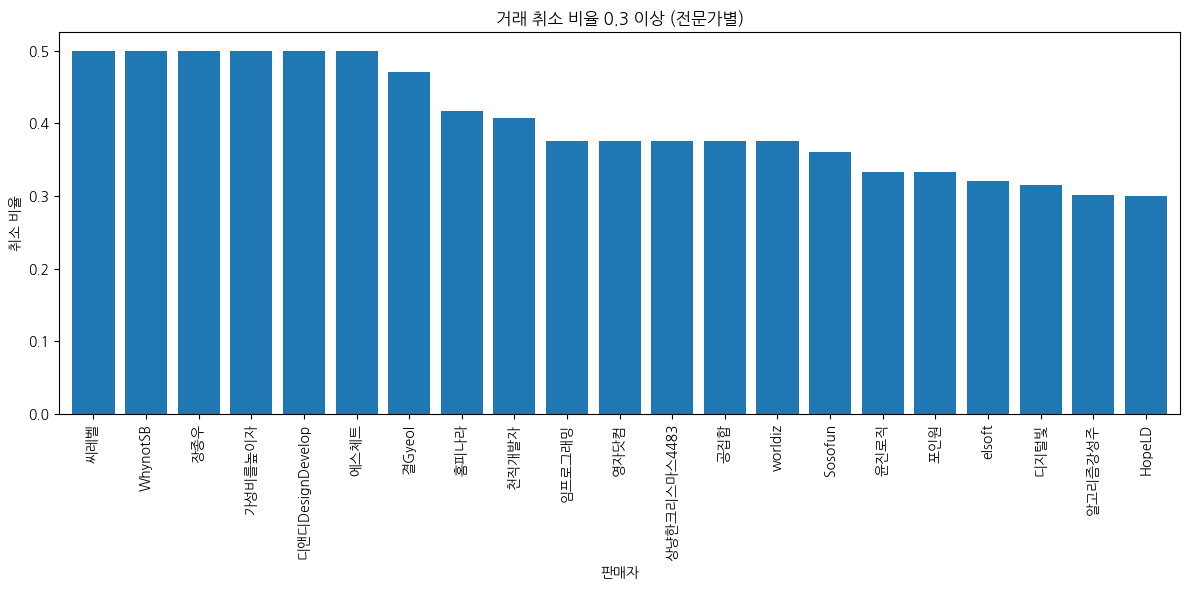

In [51]:
import matplotlib.pyplot as plt

# 전문가별 거래 취소 비율 계산
cancellation_rate_by_expert = log[log['거래취소여부'] == 1.0].groupby('판매자').size() / log.groupby('판매자').size()

# 거래 취소 비율이 0.3 이상인 전문가만 필터링
high_cancellation_experts = cancellation_rate_by_expert[cancellation_rate_by_expert >= 0.3]

# 그래프 그리기
plt.figure(figsize=(12, 6))
high_cancellation_experts.sort_values(ascending=False).plot(kind='bar', width=0.8)
plt.title('거래 취소 비율 0.3 이상 (전문가별)')
plt.xlabel('판매자')
plt.ylabel('취소 비율')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [79]:
import pandas as pd
import matplotlib.pyplot as plt

# 전문가별 거래 취소 비율 계산
cancellation_rate_by_expert = log[log['거래취소여부'] == 1.0].groupby('판매자').size() / log.groupby('판매자').size()

# 0.5 이상의 취소 비율을 가진 전문가와 그렇지 않은 전문가를 각각 필터링
high_cancellation_experts = cancellation_rate_by_expert[cancellation_rate_by_expert >= 0.5].index
low_cancellation_experts = cancellation_rate_by_expert[cancellation_rate_by_expert <= 0.01].index

# high_cancel_data와 low_cancel_data를 merged_data에서 가져오기
high_cancel_data = merged_data[merged_data['판매자'].isin(high_cancellation_experts)]
low_cancel_data = merged_data[merged_data['판매자'].isin(low_cancellation_experts )]

In [80]:
# 통계적 요약 비교
high_cancel_summary = high_cancel_data.describe(include='all')
low_cancel_summary = low_cancel_data.describe(include='all')

# 비교 결과를 담을 DataFrame 생성
comparison_df = pd.DataFrame({
    'High_Cancel_Value': high_cancel_summary.loc['mean'],
    'Low_Cancel_Value': low_cancel_summary.loc['mean']
})

In [89]:
comparison_df['Difference'] = abs(comparison_df['High_Cancel_Value'] - comparison_df['Low_Cancel_Value'])

In [86]:
columns_to_compare = ['서비스가격', '평점', '판매수', '수수료율', '프로그램수정횟수', '추가 결제 금액', '판매금액', '이용자수', '취소율']

available_columns = [col for col in columns_to_compare if col in comparison_df.index]
filtered_comparison_df = comparison_df.loc[available_columns]

# 결과 확인
filtered_comparison_df

,High_Cancel_Value,Low_Cancel_Value,Difference
서비스가격,441500.0,18700.201582,422799.798418
평점,1.5,4.834765,3.334765
판매수,15.8,1319.112404,1303.312404
수수료율,7.025,6.950454,0.074546
프로그램수정횟수,-0.2,0.16161,0.36161
판매금액,223281.25,22214.038432,201067.211568
이용자수,0.55,81.609731,81.059731
취소율,1.0,1.0,0.0


In [88]:
significant_differences = filtered_comparison_df.sort_values(by='Difference', ascending=False).head(5)
significant_differences

,High_Cancel_Value,Low_Cancel_Value,Difference
서비스가격,441500.0,18700.201582,422799.798418
판매금액,223281.25,22214.038432,201067.211568
판매수,15.8,1319.112404,1303.312404
이용자수,0.55,81.609731,81.059731
평점,1.5,4.834765,3.334765


서비스가가 꽤 높은편 판매금액또한 높음 -> 너무 높으니까 취소되나\
평점도 꽤 낮은\
=> 탈주 또는 그냥 실력 부족

In [92]:
half_c = cancellation_rate_by_expert[cancellation_rate_by_expert >= 0.5]
half_c

판매자
WhynotSB            0.5
가성비를높이자             0.5
디앤디DesignDevelop    0.5
씨레벨                 0.5
에스체트                0.5
장종우                 0.5
dtype: float64

In [97]:
# 특정 판매자 이름으로 expert 데이터 필터링
selected_experts = expert[expert['판매자'].isin(['WhynotSB', '가성비를높이자', '디앤디DesignDevelop', '씨레벨', '에스체트', '장종우'])]

# 결과 확인
selected_experts

,판매자ID,판매자,판매 서비스 수,총 판매 금액,프리미엄 서비스 가입여부,신속 알람 서비스 사용여부
1141,V2_1141,WhynotSB,4,3040100,미가입,미사용
1284,V2_1284,씨레벨,2,2014400,미가입,미사용
1332,V2_1332,디앤디DesignDevelop,4,1786000,미가입,미사용
1460,V2_1460,가성비를높이자,24,1231000,미가입,사용
1615,V2_1615,에스체트,2,774200,미가입,미사용
1881,V2_1881,장종우,4,186800,미가입,미사용


In [100]:
log2 = log[log['판매자'].isin(['WhynotSB', '디앤디DesignDevelop', '씨레벨', '에스체트', '장종우'])]
log2

,거래일자,수수료율,고객ID,프로그램수정횟수,추가결제금액,거래취소여부,거래취소일자,서비스명,판매자,판매금액,서비스가격,평점,이용자수,대분류,서비스번호
27989,20210215,6.5,90103012102,-1.0,0,1.0,20210215.0,카카오 플친 라인 페북 텔레그램 챗봇 서비스 만들어 드립니다.,에스체트,0.0,770000.0,5.0,3.0,인공지능,4191.0
27990,20210215,6.5,90103012148,0.0,2100,0.0,0.0,카카오 플친 라인 페북 텔레그램 챗봇 서비스 만들어 드립니다.,에스체트,772100.0,770000.0,5.0,3.0,인공지능,4191.0
44376,20210224,6.5,110103260101,0.0,7200,0.0,0.0,아름답고 액티비한 안드로이드앱과 아이폰앱을 만들어 드립니다.,씨레벨,2007200.0,2000000.0,5.0,2.0,모바일,4516.0
48909,20210227,6.5,130504042124,-1.0,0,1.0,20210227.0,간단한 안드로이드 앱 만들어 드립니다.,장종우,0.0,50000.0,5.0,2.0,모바일,4582.0
48910,20210227,6.5,13050404289,1.0,18200,0.0,0.0,간단한 안드로이드 앱 만들어 드립니다.,장종우,68200.0,50000.0,5.0,2.0,모바일,4582.0
48911,20210227,9.0,13050404391,-1.0,0,1.0,20210227.0,간단한 안드로이드 앱 만들어 드립니다.,장종우,0.0,50000.0,5.0,2.0,모바일,4582.0
48912,20210227,6.5,130504043142,1.0,25200,0.0,0.0,간단한 안드로이드 앱 만들어 드립니다.,장종우,75200.0,50000.0,5.0,2.0,모바일,4582.0
49342,20210227,6.5,110103260111,-1.0,0,1.0,20210224.0,아름답고 액티비한 안드로이드앱과 아이폰앱을 만들어 드립니다.,씨레벨,0.0,2000000.0,5.0,2.0,모바일,4516.0
107470,20210127,6.5,803050032,-1.0,0,1.0,20210127.0,홈페이지 디자인부터 개발까지 귀사의 브랜드 가치를 높여 드립니다.,디앤디DesignDevelop,0.0,880000.0,5.0,1.0,홈페이지,5231.0
107471,20210127,7.5,8030500399,1.0,7000,0.0,0.0,홈페이지 디자인부터 개발까지 귀사의 브랜드 가치를 높여 드립니다.,디앤디DesignDevelop,887000.0,880000.0,5.0,1.0,홈페이지,5231.0


In [123]:
#취소가 많이 되는 경우 많이 일했는데도
high_cancellation_experts = cancellation_rate_by_expert[cancellation_rate_by_expert >= 0.3].index
high_cancellation_experts

Index(['HopeLD', 'Sosofun', 'WhynotSB', 'elsoft', 'worldiz', '가성비를높이자',
       '결Gyeol', '공집합', '디앤디DesignDevelop', '디지털빛', '상냥한크리스마스4483', '씨레벨',
       '알고리즘강성주', '에스체트', '영자닷컴', '윤진로직', '임프로그래밍', '장종우', '천직개발자', '포인원',
       '홈피나라'],
      dtype='object', name='판매자')

In [124]:
merged_data = sale.merge(log, on=['서비스명', '판매자'], suffixes=('', '_log'))

selected_experts = merged_data[(merged_data['판매자'].isin(high_cancellation_experts)) & (merged_data['이용자수'] >= 50)]

selected_experts['판매자'].unique()

array(['포인원', '알고리즘강성주'], dtype=object)

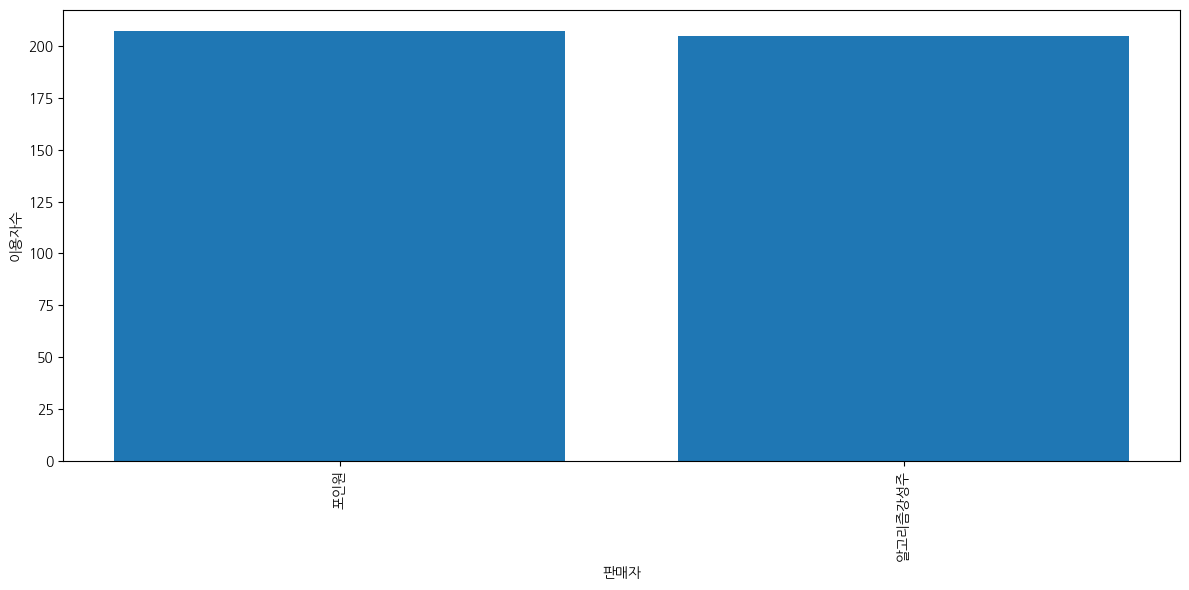

In [125]:
import matplotlib.pyplot as plt

# x축은 '판매자', y축은 '이용자수'로 설정하여 막대 그래프 그리기
plt.figure(figsize=(12, 6))
plt.bar(selected_experts['판매자'], selected_experts['이용자수'])
plt.xlabel('판매자')
plt.ylabel('이용자수')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### 판매금액

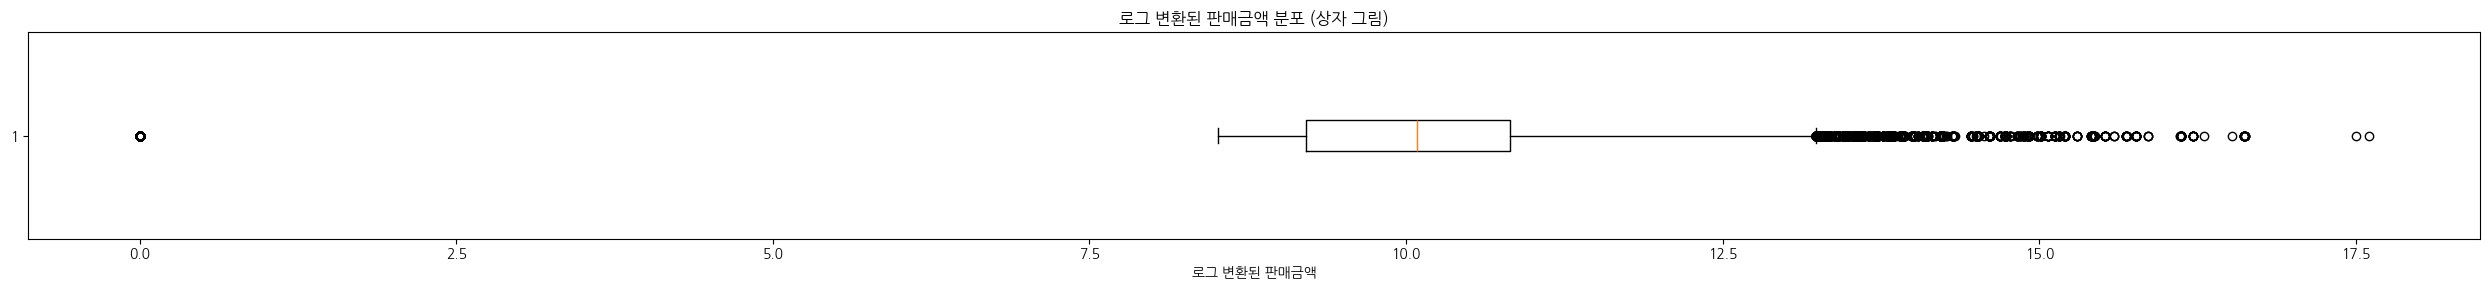

In [131]:
import numpy as np
import matplotlib.pyplot as plt

# 로그 변환을 적용한 판매금액
log_transformed_sales = np.log1p(log['판매금액'].dropna())  # log1p는 log(1 + x)로 0 값도 처리 가능

# 로그 변환된 판매금액의 상자 그림 (box plot)
plt.figure(figsize=(25, 3))
plt.boxplot(log_transformed_sales, vert=False)
plt.xlabel('로그 변환된 판매금액')
plt.title('로그 변환된 판매금액 분포 (상자 그림)')
plt.tight_layout()
plt.show()


In [133]:
log.info()

<class 'pandas.core.frame.DataFrame'>
Index: 344277 entries, 0 to 344276
Data columns (total 15 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   거래일자      344277 non-null  int64  
 1   수수료율      344277 non-null  float64
 2   고객ID      344277 non-null  int64  
 3   프로그램수정횟수  344277 non-null  float64
 4   추가결제금액    344277 non-null  int64  
 5   거래취소여부    344277 non-null  float64
 6   거래취소일자    344277 non-null  float64
 7   서비스명      344277 non-null  object 
 8   판매자       344277 non-null  object 
 9   판매금액      344277 non-null  float64
 10  서비스가격     344277 non-null  float64
 11  평점        344277 non-null  float64
 12  이용자수      344277 non-null  float64
 13  대분류       344277 non-null  object 
 14  서비스번호     344277 non-null  float64
dtypes: float64(9), int64(3), object(3)
memory usage: 42.0+ MB


In [134]:
# high_cancel_data와 low_cancel_data에서 수치형(int 또는 float) 컬럼만 추출하여 비교
numeric_columns = high_cancel_data.select_dtypes(include=['int64', 'float64']).columns

# 수치형 컬럼으로만 구성된 비교 DataFrame 생성
numeric_comparison_df = pd.DataFrame({
    'High_Cancel_Value': high_cancel_data[numeric_columns].mean(),
    'Low_Cancel_Value': low_cancel_data[numeric_columns].mean()
})

# 각 컬럼의 차이를 계산하고 내림차순으로 정렬
numeric_comparison_df['Difference'] = abs(numeric_comparison_df['High_Cancel_Value'] - numeric_comparison_df['Low_Cancel_Value'])
numeric_comparison_df_sorted = numeric_comparison_df.sort_values(by='Difference', ascending=False)

# 결과 확인
numeric_comparison_df_sorted

,High_Cancel_Value,Low_Cancel_Value,Difference
고객ID,5.142424e+10,3.916183e+10,1.226241e+10
거래취소일자,1.010524e+07,1.078293e+05,9.997414e+06
서비스가격,4.415000e+05,1.870020e+04,4.227998e+05
서비스가격_log,4.415000e+05,1.870020e+04,4.227998e+05
판매금액,2.232812e+05,2.221404e+04,2.010672e+05
서비스번호_log,5.865250e+03,2.788218e+03,3.077032e+03
서비스번호,5.865250e+03,2.788237e+03,3.077013e+03
판매수,1.580000e+01,1.319112e+03,1.303312e+03
추가결제금액,2.531250e+03,3.807750e+03,1.276500e+03
거래일자,2.021049e+07,2.021037e+07,1.122698e+02


In [135]:
# 판매금액 기초 통계 분석
basic_stats = log['판매금액'].describe()
print("판매금액 기초 통계 분석:\n", basic_stats)

# 추가 통계: 중앙값, 분산, 표준편차
median = log['판매금액'].median()
variance = log['판매금액'].var()
std_dev = log['판매금액'].std()

print("\n추가 통계:")
print(f"중앙값: {median}")
print(f"분산: {variance}")
print(f"표준편차: {std_dev}")

판매금액 기초 통계 분석:
 count    3.442770e+05
mean     6.299248e+04
std      2.568311e+05
min      0.000000e+00
25%      1.000000e+04
50%      2.395000e+04
75%      5.000000e+04
max      4.400000e+07
Name: 판매금액, dtype: float64

추가 통계:
중앙값: 23950.0
분산: 65962214726.38649
표준편차: 256831.10155584058


In [136]:
# 판매금액 범주화 기준
log['판매금액_범주'] = pd.qcut(log['판매금액'], q=3, labels=['하', '중', '상'])

# 결과 확인
log

,거래일자,수수료율,고객ID,프로그램수정횟수,추가결제금액,거래취소여부,거래취소일자,서비스명,판매자,판매금액,서비스가격,평점,이용자수,대분류,서비스번호,판매금액_범주
0,20210201,6.5,5030100140,0.0,9800,0.0,0.0,"카페24,고도몰,메이크샵등 쇼핑몰 수정,코딩,유지보수",logf1,14800.0,5000.0,5.0,584.0,커머스,2102.0,하
1,20210201,6.5,8020105385,0.0,0,0.0,0.0,"카페24,고도몰,메이크샵등 쇼핑몰 수정,코딩,유지보수",logf1,5000.0,5000.0,5.0,584.0,커머스,2102.0,하
2,20210201,6.5,110104033157,0.0,9200,0.0,0.0,"엑셀 VBA, 매크로, ERP 프로그램 개발해 드립니다.",엑셀의신,19200.0,10000.0,5.0,583.0,데이터,2103.0,중
3,20210201,7.5,40203001176,0.0,11000,0.0,0.0,"엑셀을 이용 서식과 집계, 분석 및 VBA 프로그래밍",태구리,61000.0,50000.0,5.0,504.0,데이터,2105.0,상
4,20210201,6.5,5041700297,0.0,0,0.0,0.0,"엑셀을 이용 서식과 집계, 분석 및 VBA 프로그래밍",태구리,50000.0,50000.0,5.0,504.0,데이터,2105.0,상
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344272,20210630,9.0,50150001196,0.0,0,0.0,0.0,데이터 분석 및 시각화 제공해 드립니다.,전문가오리,20000.0,20000.0,4.6,33.0,데이터,2600.0,중
344273,20210630,7.5,60107010137,0.0,0,0.0,0.0,데이터 분석 및 시각화 제공해 드립니다.,전문가오리,20000.0,20000.0,4.6,33.0,데이터,2600.0,중
344274,20210630,9.0,70406002101,0.0,0,0.0,0.0,데이터 분석 및 시각화 제공해 드립니다.,전문가오리,20000.0,20000.0,4.6,33.0,데이터,2600.0,중
344275,20210630,6.5,9010306354,0.0,0,0.0,0.0,데이터 분석 및 시각화 제공해 드립니다.,전문가오리,20000.0,20000.0,4.6,33.0,데이터,2600.0,중


### **판매금액 클러스터그려보기**

In [49]:
DF3

,고객ID,사용기기,사용OS,유입경로,회원상태,거주지,연령,성별,서비스총구매수,총구매금액,...,추가결제금액,거래취소여부,거래취소일자,판매금액,서비스가격,평점,이용자수,대분류,서비스번호,연령대
0,1001010041,iPhone,iOS11.4.1,유튜브,정상회원,경기도,25.0,남성,1,44500.0,...,14500,0.0,0.0,44500.0,30000.0,4.8,20.0,기타,2843.0,20대
1,10010100410,SM-N935S,Android7.0,검색광고,정상회원,경기도,26.0,기타,1,44500.0,...,14500,0.0,0.0,44500.0,30000.0,4.8,20.0,기타,2843.0,20대
2,100101004108,iPhone,iOS12.0,네이버블로그,정상회원,경기도,23.0,남성,1,34500.0,...,14500,0.0,0.0,34500.0,20000.0,4.9,22.0,홈페이지,2790.0,20대
3,100101004109,iPhone,iOS11.4.1,인스타그램,정상회원,경기도,20.0,남성,1,364500.0,...,14500,0.0,0.0,364500.0,350000.0,5.0,2.0,기타,4600.0,20대
4,100101004112,iPhone,iOS11.4.1,직접검색,정상회원,경기도,28.0,남성,1,34500.0,...,14500,0.0,0.0,34500.0,20000.0,4.9,22.0,홈페이지,2790.0,20대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350013,9050206990,SM-N950N,Android8.0.0,유튜브,정상회원,경상도,21.0,남성,2,75000.0,...,10000,0.0,0.0,60000.0,50000.0,5.0,3.0,모바일,4156.0,20대
350014,9050206992,iPhone,iOS11.4,네이버카페,탈퇴,강원도,26.0,기타,1,310000.0,...,10000,0.0,0.0,310000.0,300000.0,0.0,0.0,기타,6332.0,20대
350015,9050206995,iPhone,iOS12.0,인스타그램,정상회원,강원도,28.0,남성,1,89000.0,...,10000,0.0,0.0,89000.0,79000.0,5.0,18.0,홈페이지,2885.0,20대
350016,9050206996,SM-G930S,Android8.0.0,네이버블로그,정상회원,강원도,43.0,남성,1,9000.0,...,4000,0.0,0.0,9000.0,5000.0,5.0,76.0,커머스,2319.0,40대


In [50]:
DF3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350018 entries, 0 to 350017
Data columns (total 33 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   고객ID            350018 non-null  int64  
 1   사용기기            350018 non-null  object 
 2   사용OS            350018 non-null  object 
 3   유입경로            350018 non-null  object 
 4   회원상태            350018 non-null  object 
 5   거주지             350018 non-null  object 
 6   연령              345233 non-null  float64
 7   성별              350018 non-null  object 
 8   서비스총구매수         350018 non-null  int64  
 9   총구매금액           350018 non-null  float64
 10  총수정요청수          350018 non-null  float64
 11  총추가결제금액         350018 non-null  int64  
 12  서비스명            350018 non-null  object 
 13  판매자             350018 non-null  object 
 14  판매수             350018 non-null  int64  
 15  판매자ID           350018 non-null  object 
 16  판매 서비스 수        350018 non-null  int64  
 17  총 판매 금액   

In [51]:
import pandas as pd
import numpy as np

# '나이' 컬럼을 숫자로 변환 (변환 불가능한 값은 NaN으로 처리)
DF3['연령'] = pd.to_numeric(DF3['연령'], errors='coerce')

# 연령대 계산 함수
def calculate_age_group(age):
    if pd.isna(age):
        return '기타'
    elif 20 <= age < 30:
        return '20대'
    elif 30 <= age < 40:
        return '30대'
    elif 40 <= age < 50:
        return '40대'
    elif 50 <= age < 60:
        return '50대'
    else:
        return '기타'

# 연령대 컬럼 추가
DF3['연령대'] = DF3['연령'].apply(calculate_age_group)

# 결과 확인
DF3[['연령', '연령대']].head()

,연령,연령대
0,25.0,20대
1,26.0,20대
2,23.0,20대
3,20.0,20대
4,28.0,20대


In [77]:
DF3['연령대'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 350018 entries, 0 to 350017
Series name: 연령대
Non-Null Count   Dtype
--------------   -----
350018 non-null  int64
dtypes: int64(1)
memory usage: 2.7 MB


#### **최빈 평균 버전**

In [76]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd

# 필요한 컬럼을 이진 인코딩
for col in ['프리미엄 서비스 가입여부', '신속 알람 서비스 사용여부']:
    DF3[col] = DF3[col].apply(lambda x: 1 if x == '가입' else 0)

# 라벨 인코딩을 사용하여 범주형 변수를 숫자로 변환
label_encoder = LabelEncoder()
for col in ['유입경로', '성별', '연령대', '거주지']:
    DF3[col] = label_encoder.fit_transform(DF3[col])

# 평점이 0이 아닌 행만 필터링
DF3_filtered = DF3[DF3['평점'] != 0.0].copy()

# 클러스터링에 사용할 수치형 데이터만 선택
selected_features = [
    '판매금액', '수수료율', '이용자수', '프로그램수정횟수', '추가결제금액', 
    '거래취소여부', '서비스가격', '평점', '프리미엄 서비스 가입여부', 
    '신속 알람 서비스 사용여부', '유입경로', '성별', '연령대', '거주지'
]

# 선택된 피처로 데이터 스케일링 (표준화)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(DF3_filtered[selected_features])

# K-means 클러스터링을 적용할 클러스터 개수 설정 (예: 5개)
kmeans = KMeans(n_clusters=5, random_state=42)
DF3_filtered['클러스터'] = kmeans.fit_predict(scaled_features)

# 평균을 적용할 컬럼과 최빈값을 적용할 컬럼 구분
mean_columns = ['판매금액', '수수료율', '이용자수', '프로그램수정횟수', '추가결제금액', '서비스가격', '평점']
mode_columns = ['거래취소여부', '프리미엄 서비스 가입여부', '신속 알람 서비스 사용여부', '유입경로', '성별', '거주지', '연령대']

# 각 컬럼별 집계 방법 지정
agg_dict = {col: 'mean' for col in mean_columns}
agg_dict.update({col: lambda x: x.mode()[0] if not x.mode().empty else None for col in mode_columns})

# 클러스터별 통계 요약 계산
cluster_summary = DF3_filtered.groupby('클러스터').agg(agg_dict)

# 금액 관련 컬럼을 천 단위로 나누기
cluster_summary['판매금액'] = cluster_summary['판매금액'] / 10000
cluster_summary['추가결제금액'] = cluster_summary['추가결제금액'] / 10000
cluster_summary['서비스가격'] = cluster_summary['서비스가격'] / 10000

# 결과를 소수점 2자리로 반올림
cluster_summary = cluster_summary.round(2)

cluster_summary

,판매금액,수수료율,이용자수,프로그램수정횟수,추가결제금액,서비스가격,평점,거래취소여부,프리미엄 서비스 가입여부,신속 알람 서비스 사용여부,유입경로,성별,거주지,연령대
클러스터,,,,,,,,,,,,,,
0,4.35,6.72,56.78,0.19,0.40,3.99,4.97,0.0,0,0,3,1,1,0
1,4.54,9.00,56.64,0.19,0.41,4.17,4.97,0.0,0,0,7,1,1,0
2,4.34,6.72,56.92,0.19,0.40,3.98,4.97,0.0,0,0,7,1,1,0
3,92.00,6.87,4.77,0.27,0.67,91.55,4.95,0.0,0,0,7,1,1,0
4,0.01,6.96,58.57,-1.00,0.00,5.56,4.96,1.0,0,0,7,1,1,0


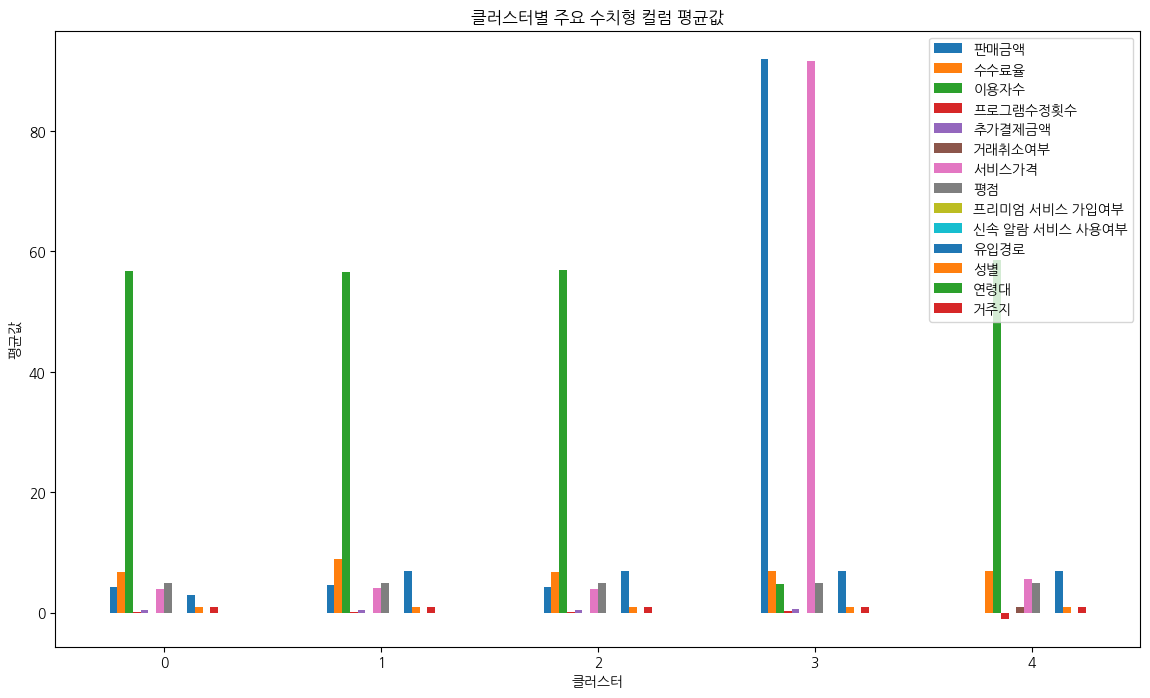

In [74]:
import matplotlib.pyplot as plt

# 클러스터별 주요 수치형 컬럼 평균값을 막대그래프로 표시
cluster_summary[selected_numeric_features].plot(kind='bar', figsize=(14, 8))
plt.title('클러스터별 주요 수치형 컬럼 평균값')
plt.xlabel('클러스터')
plt.ylabel('평균값')
plt.legend(loc='best')
plt.xticks(rotation=0)
plt.show()


<Figure size 1400x800 with 0 Axes>

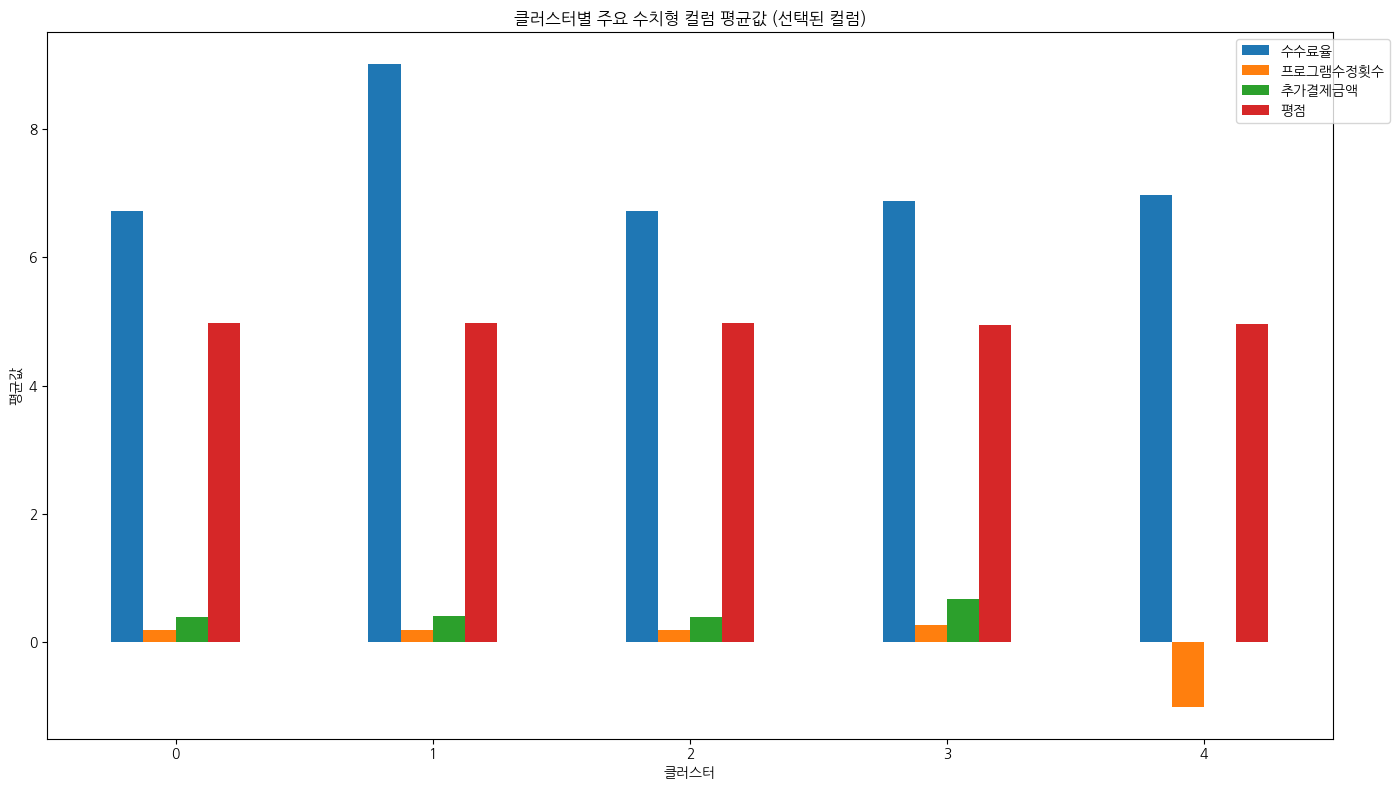

In [75]:
import matplotlib.pyplot as plt

# 제외할 컬럼들
excluded_columns = ['서비스가격', '판매금액', '이용자수', '거래취소여부', 
                    '프리미엄 서비스 가입여부', '신속 알람 서비스 사용여부', 
                    '유입경로', '성별', '거주지', '연령대']

# 제외할 컬럼들을 제외한 나머지 컬럼 선택
plot_columns = [col for col in cluster_summary.columns if col not in excluded_columns]

# 클러스터별로 선택된 컬럼들의 평균을 barplot으로 시각화
plt.figure(figsize=(14, 8))
cluster_summary[plot_columns].plot(kind='bar', figsize=(14, 8))
plt.title('클러스터별 주요 수치형 컬럼 평균값 (선택된 컬럼)')
plt.xlabel('클러스터')
plt.ylabel('평균값')
plt.legend(loc='best', bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


#### **평균 only버전**

In [80]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd

# 필요한 컬럼을 이진 인코딩
for col in ['프리미엄 서비스 가입여부', '신속 알람 서비스 사용여부']:
    DF3[col] = DF3[col].apply(lambda x: 1 if x == '가입' else 0)

# 라벨 인코딩을 사용하여 범주형 변수를 숫자로 변환
label_encoder = LabelEncoder()
for col in ['유입경로', '성별', '연령대', '거주지']:
    DF3[col] = label_encoder.fit_transform(DF3[col])

# 평점이 0이 아닌 행만 필터링
DF3_filtered = DF3[DF3['평점'] != 0.0].copy()

# 클러스터링에 사용할 수치형 데이터만 선택
selected_features = [
    '판매금액', '수수료율', '이용자수', '프로그램수정횟수', '추가결제금액', 
    '거래취소여부', '서비스가격', '평점', '프리미엄 서비스 가입여부', 
    '신속 알람 서비스 사용여부', '유입경로', '성별', '연령대', '거주지'
]

# 선택된 피처로 데이터 스케일링 (표준화)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(DF3_filtered[selected_features])

# K-means 클러스터링을 적용할 클러스터 개수 설정 (예: 5개)
kmeans = KMeans(n_clusters=5, random_state=42)
DF3_filtered['클러스터'] = kmeans.fit_predict(scaled_features)

# 평균을 적용할 컬럼과 최빈값을 적용할 컬럼 구분
mean_columns = ['판매금액', '수수료율', '이용자수', '프로그램수정횟수', '추가결제금액', '서비스가격', '평점',
                '거래취소여부', '프리미엄 서비스 가입여부', '신속 알람 서비스 사용여부', '유입경로', '성별', '거주지', '연령대']

# 각 컬럼별 집계 방법 지정
agg_dict = {col: 'mean' for col in mean_columns}

# 클러스터별 통계 요약 계산
cluster_summary = DF3_filtered.groupby('클러스터').agg(agg_dict)

# 금액 관련 컬럼을 천 단위로 나누기
cluster_summary['판매금액'] = cluster_summary['판매금액'] / 10000
cluster_summary['추가결제금액'] = cluster_summary['추가결제금액'] / 10000
cluster_summary['서비스가격'] = cluster_summary['서비스가격'] / 10000

# 결과를 소수점 2자리로 반올림
cluster_summary = cluster_summary.round(2)

cluster_summary

,판매금액,수수료율,이용자수,프로그램수정횟수,추가결제금액,서비스가격,평점,거래취소여부,프리미엄 서비스 가입여부,신속 알람 서비스 사용여부,유입경로,성별,거주지,연령대
클러스터,,,,,,,,,,,,,,
0,4.35,6.72,56.78,0.19,0.40,3.99,4.97,0.0,0.0,0.0,2.40,1.16,2.35,0.50
1,4.54,9.00,56.64,0.19,0.41,4.17,4.97,0.0,0.0,0.0,4.92,1.17,2.34,0.51
2,4.34,6.72,56.92,0.19,0.40,3.98,4.97,0.0,0.0,0.0,7.32,1.17,2.37,0.51
3,92.00,6.87,4.77,0.27,0.67,91.55,4.95,0.0,0.0,0.0,5.10,1.16,2.38,0.54
4,0.01,6.96,58.57,-1.00,0.00,5.56,4.96,1.0,0.0,0.0,4.84,1.17,2.35,0.50


<Figure size 1400x800 with 0 Axes>

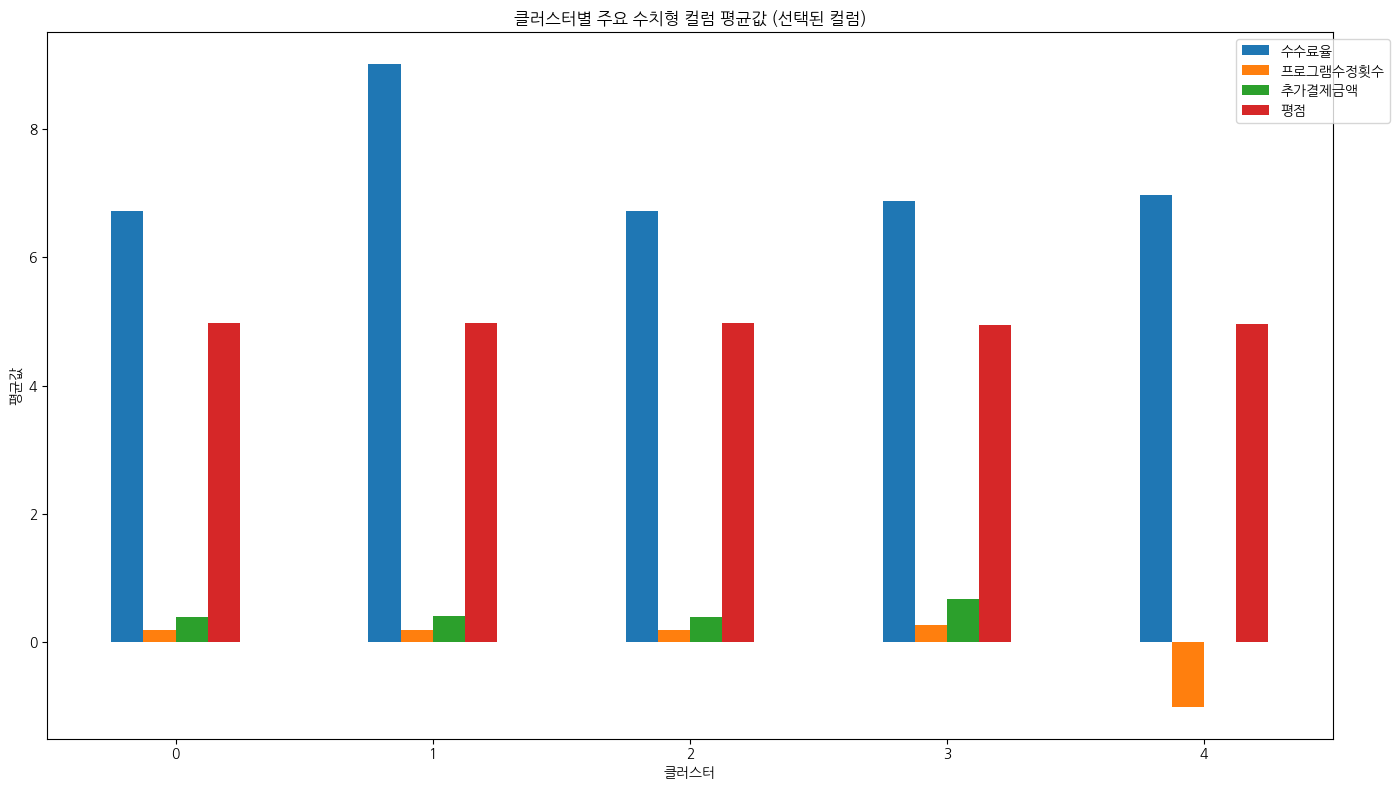

In [81]:
import matplotlib.pyplot as plt

# 제외할 컬럼들
excluded_columns = ['서비스가격', '판매금액', '이용자수', '거래취소여부', 
                    '프리미엄 서비스 가입여부', '신속 알람 서비스 사용여부', 
                    '유입경로', '성별', '거주지', '연령대']

# 제외할 컬럼들을 제외한 나머지 컬럼 선택
plot_columns = [col for col in cluster_summary.columns if col not in excluded_columns]

# 클러스터별로 선택된 컬럼들의 평균을 barplot으로 시각화
plt.figure(figsize=(14, 8))
cluster_summary[plot_columns].plot(kind='bar', figsize=(14, 8))
plt.title('클러스터별 주요 수치형 컬럼 평균값 (선택된 컬럼)')
plt.xlabel('클러스터')
plt.ylabel('평균값')
plt.legend(loc='best', bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


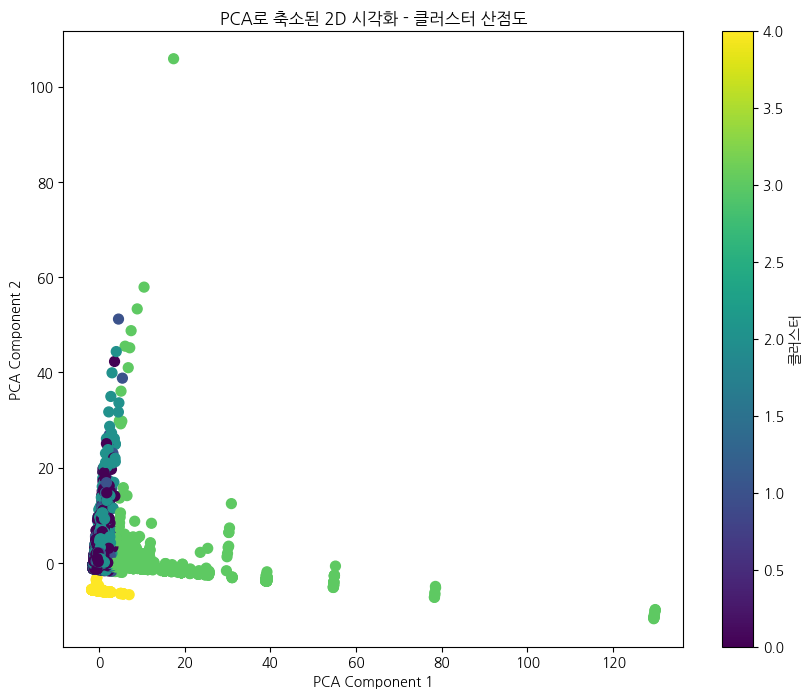

In [82]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# PCA를 사용한 차원 축소 (2D 시각화)
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)  # scaled_features는 클러스터링에 사용된 데이터입니다.

# 클러스터링 적용 (이전에 클러스터링을 수행한 데이터가 있으므로 필요 시 수행하지 않아도 됩니다)
kmeans = KMeans(n_clusters=5, random_state=42)  # 예: 클러스터 개수 5개
DF3_filtered['클러스터'] = kmeans.fit_predict(scaled_features)

# 2D 산점도 그리기
plt.figure(figsize=(10, 8))
scatter = plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=DF3_filtered['클러스터'], cmap='viridis', s=50)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA로 축소된 2D 시각화 - 클러스터 산점도')
plt.colorbar(scatter, label='클러스터')
plt.show()

#### 평균 only 집단수변동

In [86]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd

# 필요한 컬럼을 이진 인코딩
for col in ['프리미엄 서비스 가입여부', '신속 알람 서비스 사용여부']:
    DF3[col] = DF3[col].apply(lambda x: 1 if x == '가입' else 0)

# 라벨 인코딩을 사용하여 범주형 변수를 숫자로 변환
label_encoder = LabelEncoder()
for col in ['유입경로', '성별', '연령대', '거주지']:
    DF3[col] = label_encoder.fit_transform(DF3[col])

# 평점이 0이 아닌 행만 필터링
DF3_filtered = DF3[DF3['평점'] != 0.0].copy()

# 클러스터링에 사용할 수치형 데이터만 선택
selected_features = [
    '판매금액', '수수료율', '이용자수', '프로그램수정횟수', '추가결제금액', 
    '거래취소여부', '서비스가격', '평점', '프리미엄 서비스 가입여부', 
    '신속 알람 서비스 사용여부', '유입경로', '성별', '연령대', '거주지'
]

# 선택된 피처로 데이터 스케일링 (표준화)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(DF3_filtered[selected_features])

# K-means 클러스터링을 적용할 클러스터 개수 설정 (예: 5개)
kmeans = KMeans(n_clusters=4, random_state=42)
DF3_filtered['클러스터'] = kmeans.fit_predict(scaled_features)

# 평균을 적용할 컬럼과 최빈값을 적용할 컬럼 구분
mean_columns = ['판매금액', '수수료율', '이용자수', '프로그램수정횟수', '추가결제금액', '서비스가격', '평점',
                '거래취소여부', '프리미엄 서비스 가입여부', '신속 알람 서비스 사용여부', '유입경로', '성별', '거주지', '연령대']

# 각 컬럼별 집계 방법 지정
agg_dict = {col: 'mean' for col in mean_columns}

# 클러스터별 통계 요약 계산
cluster_summary = DF3_filtered.groupby('클러스터').agg(agg_dict)

# 금액 관련 컬럼을 천 단위로 나누기
cluster_summary['판매금액'] = cluster_summary['판매금액'] / 10000
cluster_summary['추가결제금액'] = cluster_summary['추가결제금액'] / 10000
cluster_summary['서비스가격'] = cluster_summary['서비스가격'] / 10000

# 결과를 소수점 2자리로 반올림
cluster_summary = cluster_summary.round(2)

cluster_summary

,판매금액,수수료율,이용자수,프로그램수정횟수,추가결제금액,서비스가격,평점,거래취소여부,프리미엄 서비스 가입여부,신속 알람 서비스 사용여부,유입경로,성별,거주지,연령대
클러스터,,,,,,,,,,,,,,
0,5.60,6.95,39.27,0.19,0.41,5.24,4.96,0.0,0.0,0.0,2.40,1.16,2.35,0.50
1,1.73,6.96,399.91,0.18,0.41,1.34,4.99,0.0,0.0,0.0,4.97,1.17,2.32,0.50
2,5.87,6.95,39.19,0.19,0.40,5.51,4.96,0.0,0.0,0.0,7.32,1.17,2.37,0.51
3,0.01,6.96,58.57,-1.00,0.00,5.56,4.96,1.0,0.0,0.0,4.84,1.17,2.35,0.50


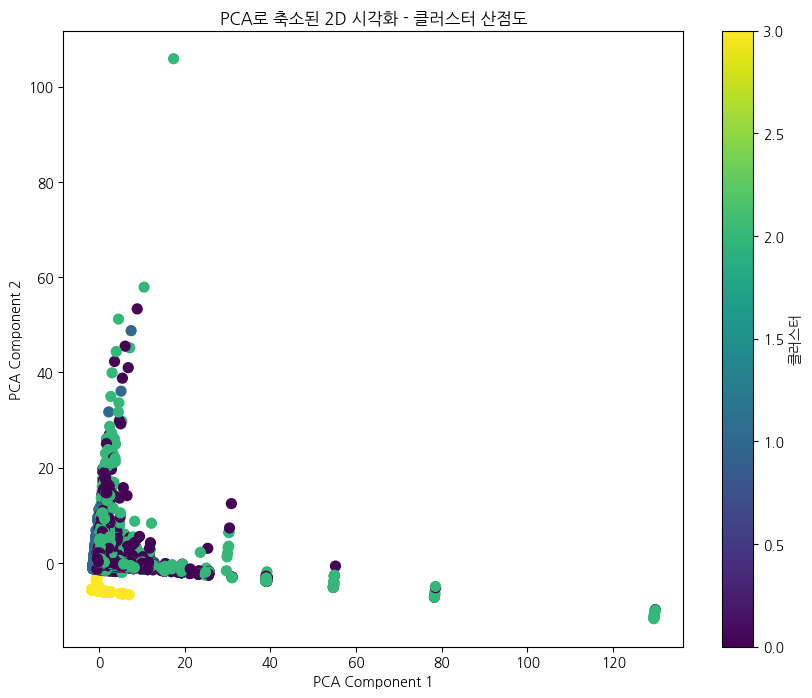

In [87]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# PCA를 사용한 차원 축소 (2D 시각화)
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)  # scaled_features는 클러스터링에 사용된 데이터입니다.

# 클러스터링 적용 (이전에 클러스터링을 수행한 데이터가 있으므로 필요 시 수행하지 않아도 됩니다)
kmeans = KMeans(n_clusters=4, random_state=42)  # 예: 클러스터 개수 5개
DF3_filtered['클러스터'] = kmeans.fit_predict(scaled_features)

# 2D 산점도 그리기
plt.figure(figsize=(10, 8))
scatter = plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=DF3_filtered['클러스터'], cmap='viridis', s=50)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA로 축소된 2D 시각화 - 클러스터 산점도')
plt.colorbar(scatter, label='클러스터')
plt.show()

### 판매금액 클러스터2

In [216]:
from sklearn.cluster import KMeans

# K-means 클러스터링을 적용할 클러스터 개수 설정 (예: 5개)
kmeans = KMeans(n_clusters=3, random_state=42)
DF3['클러스터'] = kmeans.fit_predict(scaled_features)

# 클러스터별 수치형 컬럼의 평균만 확인 (선택한 수치형 컬럼에 한정)
selected_numeric_features = [
    '판매금액', '수수료율', '이용자수', '프로그램수정횟수', 
    '추가결제금액', '거래취소여부', '서비스가격', '평점', 
    '프리미엄 서비스 가입여부', '신속 알람 서비스 사용여부', 
    '유입경로', '성별', '연령대', '거주지'
]

# 평균을 적용할 컬럼과 최빈값을 적용할 컬럼 구분
mean_columns = ['판매금액', '수수료율', '이용자수', '프로그램수정횟수', '추가결제금액', '서비스가격', '평점']
mode_columns = ['거래취소여부', '프리미엄 서비스 가입여부', '신속 알람 서비스 사용여부', '유입경로', '성별', '거주지', '연령대']

# 각 컬럼별 집계 방법 지정
agg_dict = {col: 'mean' for col in mean_columns}
agg_dict.update({col: lambda x: x.mode()[0] if not x.mode().empty else None for col in mode_columns})

# 클러스터별 통계 요약 계산
cluster_summary = DF3.groupby('클러스터').agg(agg_dict)

In [217]:
# 금액 관련 컬럼을 천 단위로 나누기
cluster_summary['판매금액'] = cluster_summary['판매금액'] / 10000
cluster_summary['추가결제금액'] = cluster_summary['추가결제금액'] / 10000
cluster_summary['서비스가격'] = cluster_summary['서비스가격'] / 10000

cluster_summary = cluster_summary.round(2)



cluster_summary

,판매금액,수수료율,이용자수,프로그램수정횟수,추가결제금액,서비스가격,평점,거래취소여부,프리미엄 서비스 가입여부,신속 알람 서비스 사용여부,유입경로,성별,거주지,연령대
클러스터,,,,,,,,,,,,,,
0,5.14,6.95,56.10,0.17,0.40,4.86,4.97,0.0,0,0,3,1,1,0
1,5.21,6.95,56.29,0.18,0.40,4.93,4.97,0.0,0,0,7,1,1,0
2,44.76,6.94,0.07,0.19,0.38,45.23,0.13,0.0,0,0,7,1,1,0


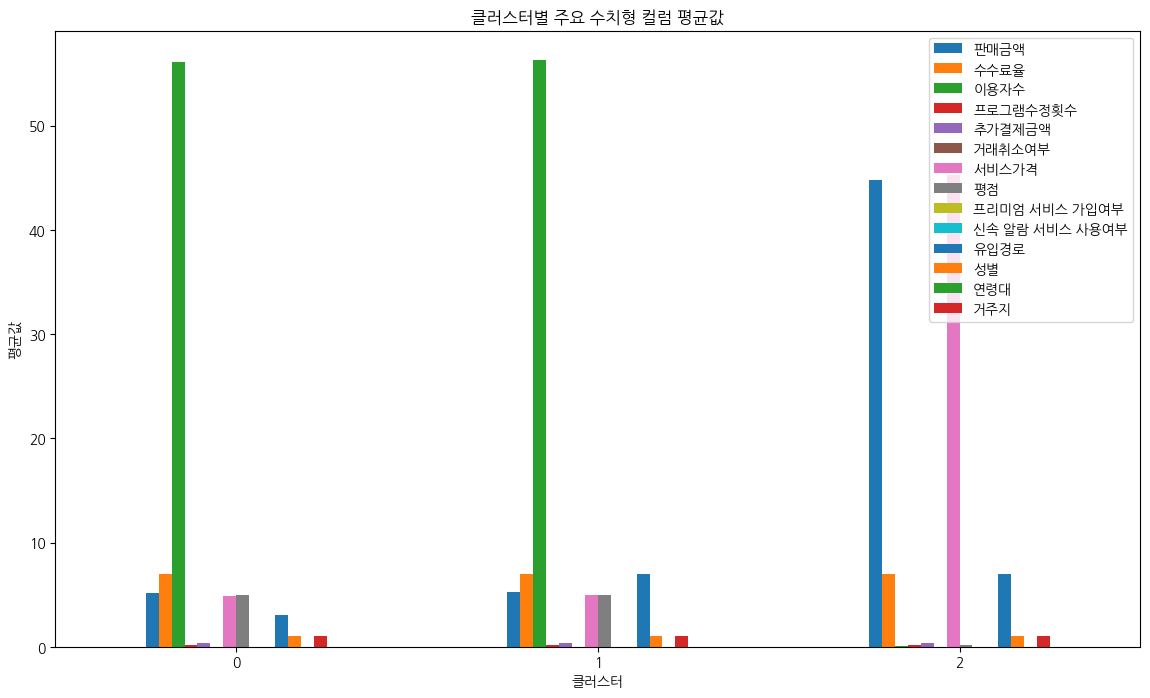

In [218]:
import matplotlib.pyplot as plt

# 클러스터별 주요 수치형 컬럼 평균값을 막대그래프로 표시
cluster_summary[selected_numeric_features].plot(kind='bar', figsize=(14, 8))
plt.title('클러스터별 주요 수치형 컬럼 평균값')
plt.xlabel('클러스터')
plt.ylabel('평균값')
plt.legend(loc='best')
plt.xticks(rotation=0)
plt.show()


<Figure size 1400x800 with 0 Axes>

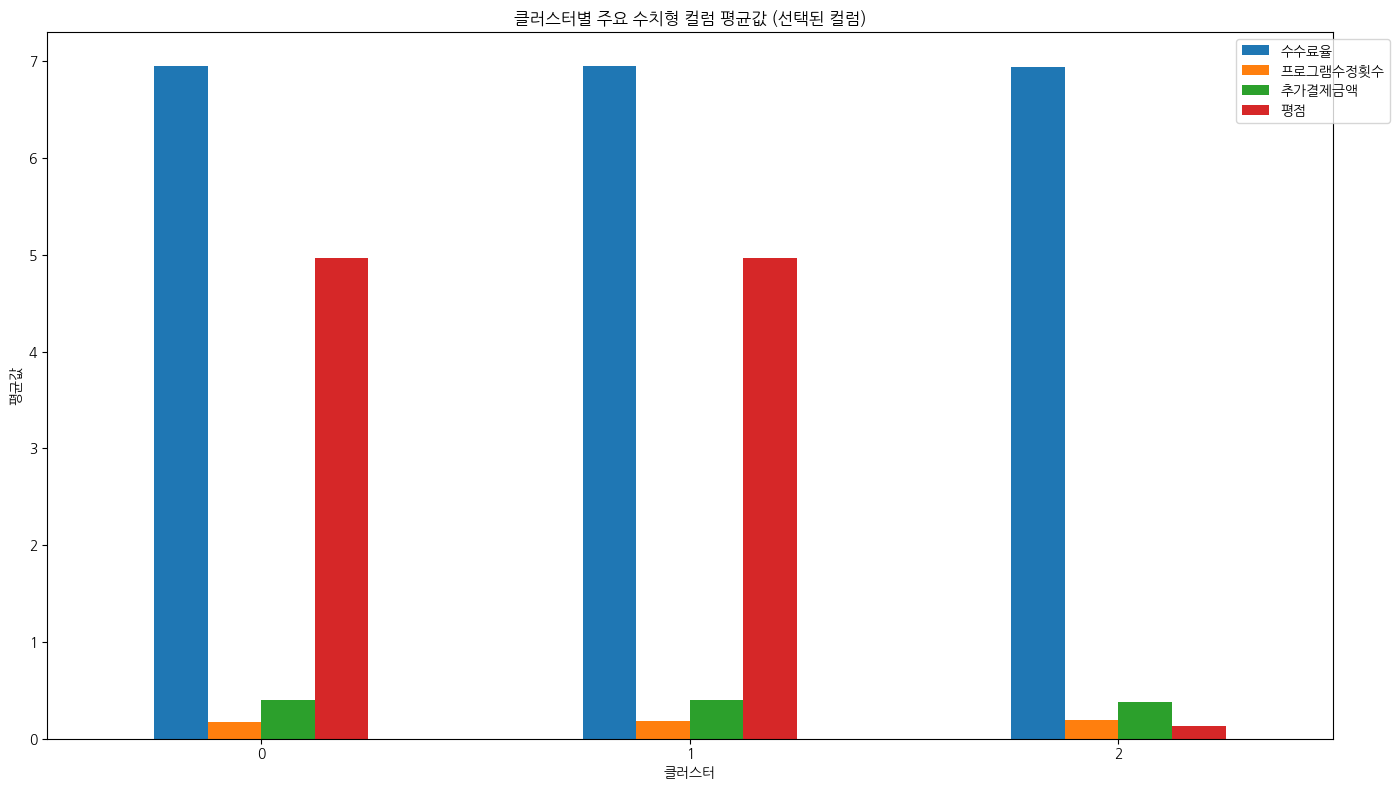

In [219]:
import matplotlib.pyplot as plt

# 제외할 컬럼들
excluded_columns = ['서비스가격', '판매금액', '이용자수', '거래취소여부', 
                    '프리미엄 서비스 가입여부', '신속 알람 서비스 사용여부', 
                    '유입경로', '성별', '거주지', '연령대']

# 제외할 컬럼들을 제외한 나머지 컬럼 선택
plot_columns = [col for col in cluster_summary.columns if col not in excluded_columns]

# 클러스터별로 선택된 컬럼들의 평균을 barplot으로 시각화
plt.figure(figsize=(14, 8))
cluster_summary[plot_columns].plot(kind='bar', figsize=(14, 8))
plt.title('클러스터별 주요 수치형 컬럼 평균값 (선택된 컬럼)')
plt.xlabel('클러스터')
plt.ylabel('평균값')
plt.legend(loc='best', bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### 판매금액 클러스터3

In [55]:
from sklearn.cluster import KMeans

# K-means 클러스터링을 적용할 클러스터 개수 설정 (예: 5개)
kmeans = KMeans(n_clusters=8, random_state=42)
DF3['클러스터'] = kmeans.fit_predict(scaled_features)

# 클러스터별 수치형 컬럼의 평균만 확인 (선택한 수치형 컬럼에 한정)
selected_numeric_features = [
    '판매금액', '수수료율', '이용자수', '프로그램수정횟수', 
    '추가결제금액', '거래취소여부', '서비스가격', '평점', 
    '프리미엄 서비스 가입여부', '신속 알람 서비스 사용여부', 
    '유입경로', '성별', '연령대', '거주지'
]

# 평균을 적용할 컬럼과 최빈값을 적용할 컬럼 구분
mean_columns = ['판매금액', '수수료율', '이용자수', '프로그램수정횟수', '추가결제금액', '서비스가격', '평점']
mode_columns = ['거래취소여부', '프리미엄 서비스 가입여부', '신속 알람 서비스 사용여부', '유입경로', '성별', '거주지', '연령대']

# 각 컬럼별 집계 방법 지정
agg_dict = {col: 'mean' for col in mean_columns}
agg_dict.update({col: lambda x: x.mode()[0] if not x.mode().empty else None for col in mode_columns})

# 클러스터별 통계 요약 계산
cluster_summary = DF3.groupby('클러스터').agg(agg_dict)

In [56]:
# 금액 관련 컬럼을 천 단위로 나누기
cluster_summary['판매금액'] = cluster_summary['판매금액'] / 10000
cluster_summary['추가결제금액'] = cluster_summary['추가결제금액'] / 10000
cluster_summary['서비스가격'] = cluster_summary['서비스가격'] / 10000

cluster_summary = cluster_summary.round(2)



cluster_summary

,판매금액,수수료율,이용자수,프로그램수정횟수,추가결제금액,서비스가격,평점,거래취소여부,프리미엄 서비스 가입여부,신속 알람 서비스 사용여부,유입경로,성별,거주지,연령대
클러스터,,,,,,,,,,,,,,
0,1.77,6.93,418.65,0.17,0.41,1.38,4.98,0.0,0,0,7,1,1,0
1,7.26,6.72,49.22,0.18,0.39,6.93,4.95,0.0,1,0,7,1,1,0
2,5.41,9.00,41.90,0.20,0.42,5.04,4.96,0.0,0,0,7,1,1,0
3,4.52,6.72,35.20,0.19,0.41,4.15,4.97,0.0,0,0,7,1,1,0
4,0.01,6.96,55.97,-1.00,0.00,6.47,4.74,1.0,0,0,7,1,1,0
5,5.35,6.82,42.32,0.18,0.41,4.99,4.96,0.0,0,0,7,1,1,2
6,33.75,6.94,0.02,0.21,0.39,33.67,0.06,0.0,0,0,7,1,1,0
7,983.60,7.05,0.52,0.34,0.49,983.11,1.75,0.0,1,0,7,1,1,0


<Figure size 1400x800 with 0 Axes>

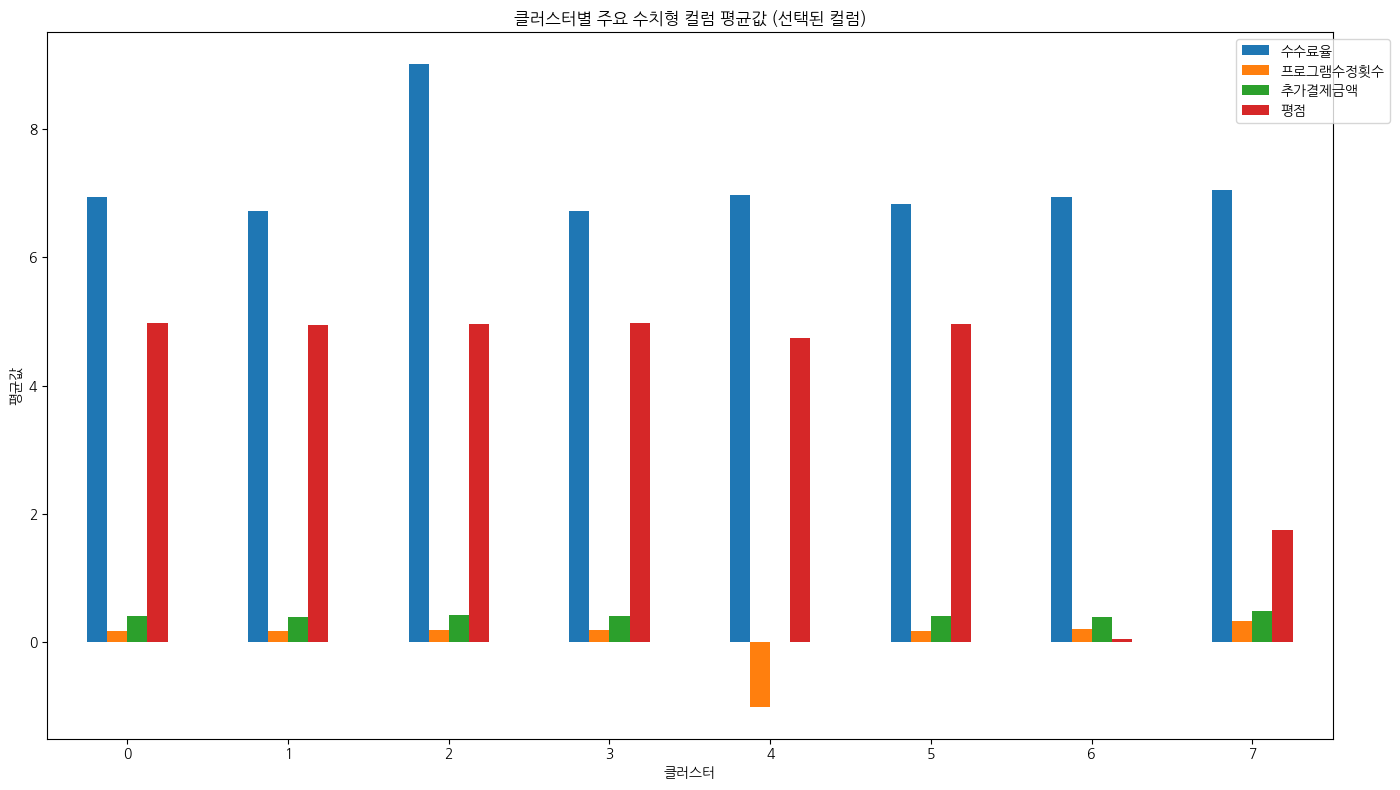

In [57]:
import matplotlib.pyplot as plt

# 제외할 컬럼들
excluded_columns = ['서비스가격', '판매금액', '이용자수', '거래취소여부', 
                    '프리미엄 서비스 가입여부', '신속 알람 서비스 사용여부', 
                    '유입경로', '성별', '거주지', '연령대']

# 제외할 컬럼들을 제외한 나머지 컬럼 선택
plot_columns = [col for col in cluster_summary.columns if col not in excluded_columns]

# 클러스터별로 선택된 컬럼들의 평균을 barplot으로 시각화
plt.figure(figsize=(14, 8))
cluster_summary[plot_columns].plot(kind='bar', figsize=(14, 8))
plt.title('클러스터별 주요 수치형 컬럼 평균값 (선택된 컬럼)')
plt.xlabel('클러스터')
plt.ylabel('평균값')
plt.legend(loc='best', bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### 판매금액 클러스터 엘보우, 실루엣 조정

Finding optimal clusters: 100%|██████████████████████████████████████████████████████████| 9/9 [00:26<00:00,  2.95s/it]


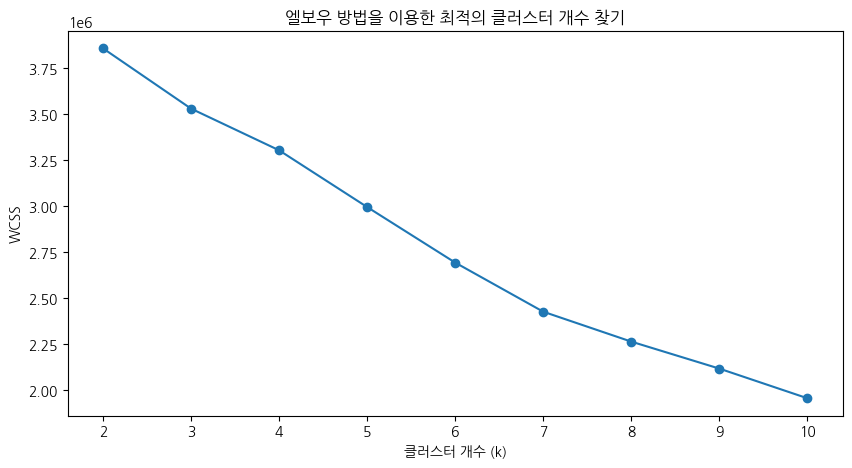

In [227]:
from tqdm import tqdm
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 최적의 클러스터 개수 찾기 (엘보우 방법)
wcss = []  # 클러스터 개수에 따른 WCSS 저장
K = range(2, 11)  # 2에서 10까지 클러스터 개수 확인

# tqdm을 사용하여 진행 상황 표시
for k in tqdm(K, desc="Finding optimal clusters"):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)  # 엘보우 방법을 위한 WCSS 저장

# 엘보우 방법 그래프 그리기
plt.figure(figsize=(10, 5))
plt.plot(K, wcss, marker='o')
plt.xlabel('클러스터 개수 (k)')
plt.ylabel('WCSS')
plt.title('엘보우 방법을 이용한 최적의 클러스터 개수 찾기')
plt.show()

**데이터 샘플링 후 실루엣 계수 임시로 구해보기**

Calculating silhouette scores: 100%|█████████████████████████████████████████████████████| 9/9 [00:04<00:00,  1.88it/s]


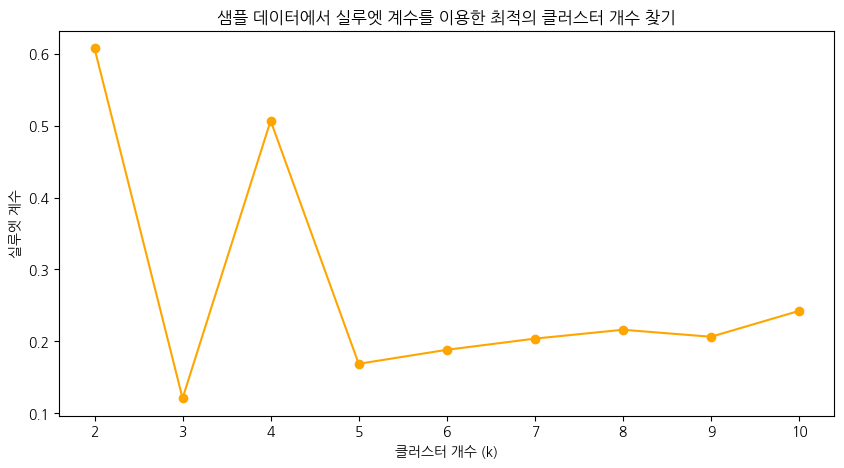

In [228]:
# 데이터 샘플링
sample_size = min(1000, len(scaled_features))  # 데이터가 너무 크다면 1000개만 샘플링
scaled_features_sample = scaled_features[:sample_size]

from sklearn.metrics import silhouette_score
from tqdm import tqdm

# 실루엣 계수 계산을 위한 클러스터 개수 범위 설정
K = range(2, 11)
silhouette_scores = []

# tqdm을 사용하여 진행 상황 표시
for k in tqdm(K, desc="Calculating silhouette scores"):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features_sample)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(scaled_features_sample, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# 실루엣 계수 그래프 그리기
plt.figure(figsize=(10, 5))
plt.plot(K, silhouette_scores, marker='o', color='orange')
plt.xlabel('클러스터 개수 (k)')
plt.ylabel('실루엣 계수')
plt.title('샘플 데이터에서 실루엣 계수를 이용한 최적의 클러스터 개수 찾기')
plt.show()

**참고 : 실루엣계수 구하는 코드**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from tqdm import tqdm
import matplotlib.pyplot as plt

# 최적의 클러스터 개수 찾기 (실루엣 계수 기반)
silhouette_scores = []  # 클러스터 개수에 따른 실루엣 계수 저장
K = range(2, 11)  # 2에서 10까지 클러스터 개수 확인

# tqdm을 사용하여 진행 상황 표시
for k in tqdm(K, desc="Finding optimal clusters"):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    silhouette_avg = silhouette_score(scaled_features, kmeans.labels_)  # 실루엣 계수 저장
    silhouette_scores.append(silhouette_avg)

# 실루엣 계수 그래프 그리기
plt.figure(figsize=(10, 5))
plt.plot(K, silhouette_scores, marker='o', color='orange')
plt.xlabel('클러스터 개수 (k)')
plt.ylabel('실루엣 계수')
plt.title('실루엣 계수를 이용한 최적의 클러스터 개수 찾기')
plt.show()

임시 샘플 실루엣계수 기준 : 차원축소 + 클러스터링

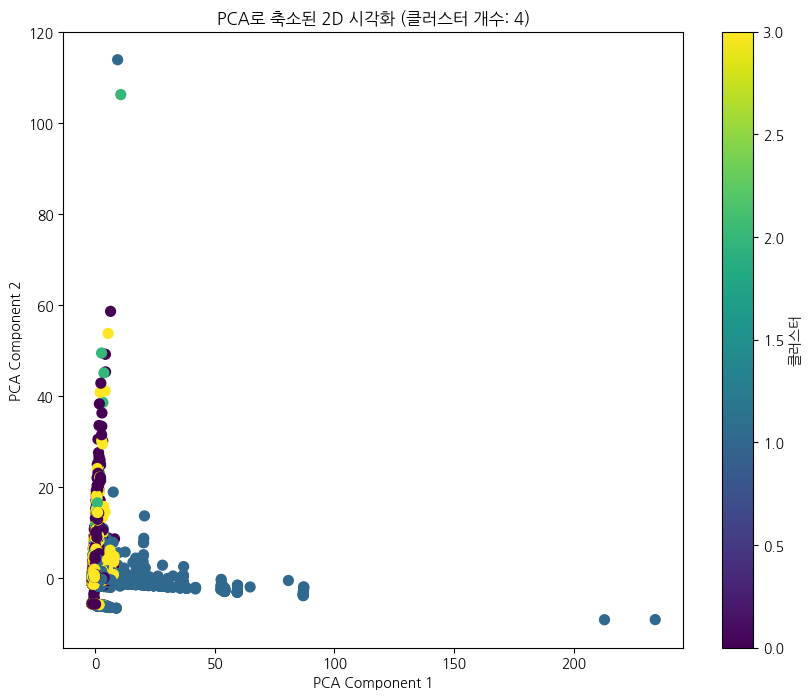

In [231]:
# PCA를 사용한 차원 축소 (2D 시각화)
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

# 최적의 클러스터 개수 선택 (예: 3개로 설정)
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
DF3['클러스터'] = kmeans.fit_predict(scaled_features)

# 2D 시각화
plt.figure(figsize=(10, 8))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=DF3['클러스터'], cmap='viridis', s=50)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title(f'PCA로 축소된 2D 시각화 (클러스터 개수: {optimal_clusters})')
plt.colorbar(label='클러스터')
plt.show()

In [232]:
# 클러스터별 수치형 컬럼의 평균만 확인 (선택한 수치형 컬럼에 한정)
selected_numeric_features = [
    '판매금액', '수수료율', '이용자수', '프로그램수정횟수', 
    '추가결제금액', '거래취소여부', '서비스가격', '평점', 
    '프리미엄 서비스 가입여부', '신속 알람 서비스 사용여부', 
    '유입경로', '성별', '연령대', '거주지'
]

# 평균을 적용할 컬럼과 최빈값을 적용할 컬럼 구분
mean_columns = ['판매금액', '수수료율', '이용자수', '프로그램수정횟수', '추가결제금액', '서비스가격', '평점']
mode_columns = ['거래취소여부', '프리미엄 서비스 가입여부', '신속 알람 서비스 사용여부', '유입경로', '성별', '거주지', '연령대']

# 각 컬럼별 집계 방법 지정
agg_dict = {col: 'mean' for col in mean_columns}
agg_dict.update({col: lambda x: x.mode()[0] if not x.mode().empty else None for col in mode_columns})

# 클러스터별 통계 요약 계산
cluster_summary = DF3.groupby('클러스터').agg(agg_dict)

In [233]:
# 금액 관련 컬럼을 천 단위로 나누기
cluster_summary['판매금액'] = cluster_summary['판매금액'] / 10000
cluster_summary['추가결제금액'] = cluster_summary['추가결제금액'] / 10000
cluster_summary['서비스가격'] = cluster_summary['서비스가격'] / 10000

# 결과를 소수점 2자리로 반올림
cluster_summary = cluster_summary.round(2)

cluster_summary

,판매금액,수수료율,이용자수,프로그램수정횟수,추가결제금액,서비스가격,평점,거래취소여부,프리미엄 서비스 가입여부,신속 알람 서비스 사용여부,유입경로,성별,거주지,연령대
클러스터,,,,,,,,,,,,,,
0,5.21,6.72,56.23,0.17,0.40,4.93,4.97,0.0,0,0,7,1,1,0
1,44.72,6.94,0.07,0.19,0.38,45.19,0.12,0.0,0,0,7,1,1,0
2,5.16,9.00,56.27,0.18,0.41,4.87,4.97,0.0,0,0,7,1,1,0
3,5.15,6.72,56.15,0.17,0.40,4.87,4.97,0.0,0,0,3,1,1,0


### 평점

#### 0점

In [24]:
# 각 평점별로 개수 계산
rating_counts = log['평점'].value_counts()

rating_counts

평점
5.0    281710
4.9     31964
0.0      9175
4.8      7142
4.7      6422
4.6      2686
4.0      2027
4.5      1635
4.3       392
4.4       387
4.2       381
3.4       117
2.8        61
3.5        57
3.9        39
3.3        36
3.0        12
3.7        11
1.0        10
2.3         8
3.6         5
Name: count, dtype: int64

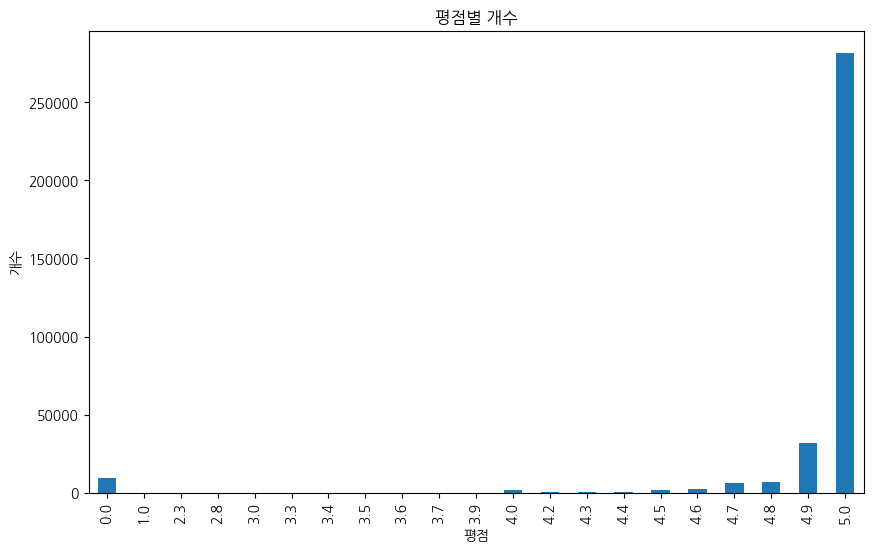

In [27]:
import matplotlib.pyplot as plt

# 각 평점별 개수 계산
rating_counts = log['평점'].value_counts()

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))
rating_counts.sort_index().plot(kind='bar')
plt.xlabel('평점')
plt.ylabel('개수')
plt.title('평점별 개수')
plt.show()

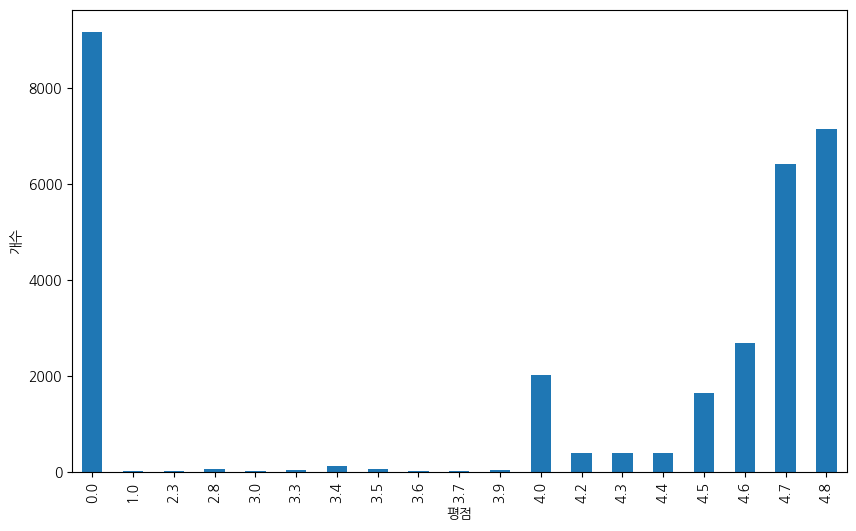

In [31]:
# 4.9 이하 평점의 빈도수 계산
rr = log[log['평점'] < 4.9]['평점'].value_counts()

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))
rr.sort_index().plot(kind='bar')
plt.xlabel('평점')
plt.ylabel('개수')
plt.show()


In [32]:
zero = log[log['평점'] ==0.0]
zero

,거래일자,수수료율,고객ID,프로그램수정횟수,추가결제금액,거래취소여부,거래취소일자,서비스명,판매자,판매금액,서비스가격,평점,이용자수,대분류,서비스번호
1396,20210201,6.5,301010157,0.0,0,0.0,0.0,"엑셀 문서 작성해드립니다. VBA,매크로,파워쿼리",엑셀로칼퇴,10000.0,10000.0,0.0,0.0,데이터,5649.0
1397,20210201,7.5,80201128105,0.0,2100,0.0,0.0,"엑셀 문서 작성해드립니다. VBA,매크로,파워쿼리",엑셀로칼퇴,12100.0,10000.0,0.0,0.0,데이터,5649.0
1398,20210201,6.5,8030500816,0.0,1100,0.0,0.0,"엑셀 문서 작성해드립니다. VBA,매크로,파워쿼리",엑셀로칼퇴,11100.0,10000.0,0.0,0.0,데이터,5649.0
1399,20210201,6.5,12010104848,0.0,6200,0.0,0.0,"엑셀 문서 작성해드립니다. VBA,매크로,파워쿼리",엑셀로칼퇴,16200.0,10000.0,0.0,0.0,데이터,5649.0
1400,20210201,6.5,130302041196,0.0,10000,0.0,0.0,"엑셀 문서 작성해드립니다. VBA,매크로,파워쿼리",엑셀로칼퇴,20000.0,10000.0,0.0,0.0,데이터,5649.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344260,20210630,6.5,7030200284,0.0,10000,0.0,0.0,"홈페이지 간단하면서도 ""느낌있게"" 제작 해드립니다",FranciscoXavier,60000.0,50000.0,0.0,0.0,홈페이지,6496.0
344261,20210630,6.5,8060102861,0.0,2700,0.0,0.0,"홈페이지 간단하면서도 ""느낌있게"" 제작 해드립니다",FranciscoXavier,52700.0,50000.0,0.0,0.0,홈페이지,6496.0
344262,20210630,6.5,110103029148,1.0,26620,0.0,0.0,"홈페이지 간단하면서도 ""느낌있게"" 제작 해드립니다",FranciscoXavier,76620.0,50000.0,0.0,0.0,홈페이지,6496.0
344263,20210630,6.5,1303020736,0.0,9800,0.0,0.0,"홈페이지 간단하면서도 ""느낌있게"" 제작 해드립니다",FranciscoXavier,59800.0,50000.0,0.0,0.0,홈페이지,6496.0


In [40]:
#판배자별 빈도
zero_seller_count = zero['판매자'].value_counts()
zero_seller_count

판매자
엑셀로칼퇴          1904
게임메이커노아         580
hughking        357
TeamSFB         227
홈페이지박스          153
               ... 
자연스러운키덜트227       1
애런강               1
더리얼원              1
moncon            1
BrownKIM          1
Name: count, Length: 473, dtype: int64

In [41]:
zero_category_count = zero['대분류'].value_counts()

zero_category_count

대분류
데이터       2576
홈페이지      2541
기타        1032
프로그래밍      708
디자인        612
모바일        469
프로그램       462
커머스        333
게임         230
UnReal     126
기획          65
인공지능        21
Name: count, dtype: int64

In [43]:
zero_customer_count = zero['고객ID'].value_counts()
print(zero_customer_count)

고객ID
100201003131    7
5081600198      5
5081600129      5
100201003145    5
60201014114     4
               ..
5041700257      1
130202007145    1
130202005132    1
80101058192     1
1303020736      1
Name: count, Length: 8545, dtype: int64


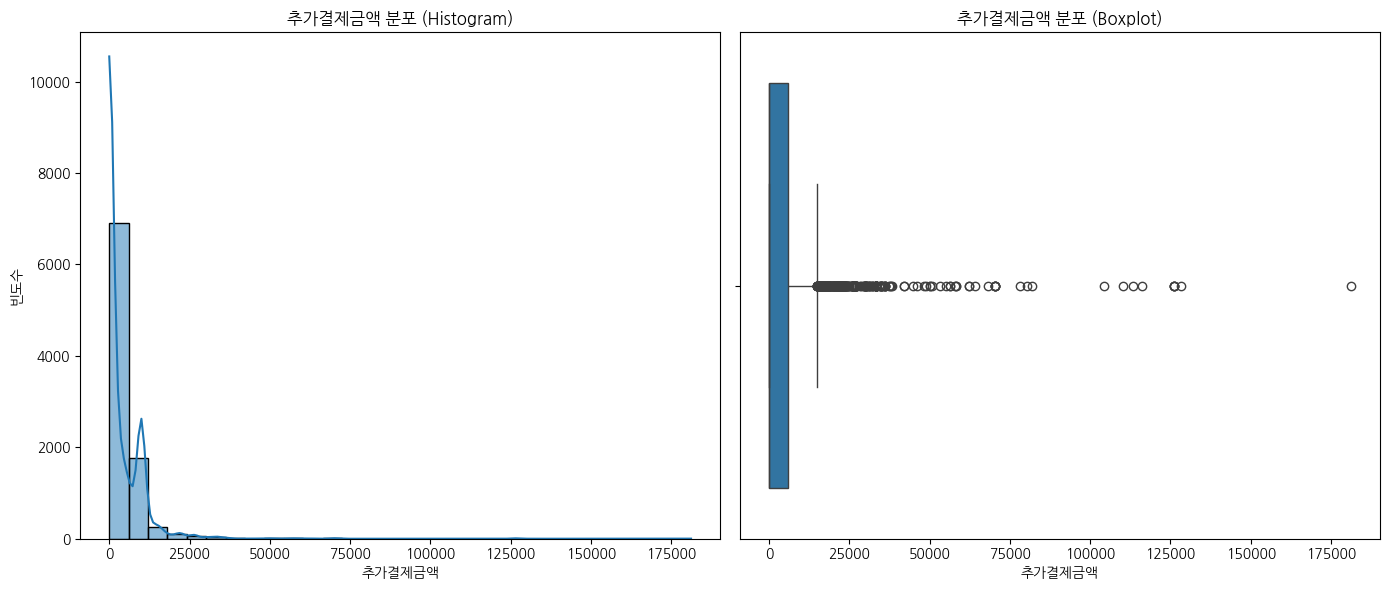

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))

# 히스토그램
plt.subplot(1, 2, 1)
sns.histplot(zero['추가결제금액'], bins=30, kde=True)
plt.title('추가결제금액 분포 (Histogram)')
plt.xlabel('추가결제금액')
plt.ylabel('빈도수')

# 박스플롯
plt.subplot(1, 2, 2)
sns.boxplot(x=zero['추가결제금액'])
plt.title('추가결제금액 분포 (Boxplot)')
plt.xlabel('추가결제금액')

plt.tight_layout()
plt.show()


**추가결제금과 평점의 관계**

피어슨 상관 계수: nan, p-value: nan
스피어만 상관 계수: nan, p-value: nan


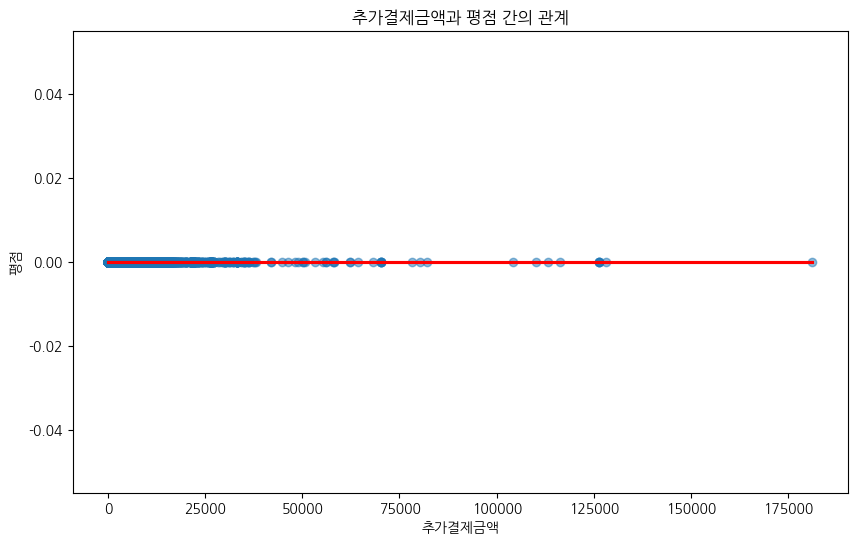

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
import pandas as pd

# 1. 피어슨 상관 계수와 p-value 계산 (연속형 변수 간의 선형 관계를 가정)
pearson_corr, pearson_p_value = pearsonr(zero['추가결제금액'], zero['평점'])

# 2. 스피어만 상관 계수와 p-value 계산 (순위 기반 관계, 비선형 관계에서도 유용)
spearman_corr, spearman_p_value = spearmanr(zero['추가결제금액'], zero['평점'])

print(f"피어슨 상관 계수: {pearson_corr:.2f}, p-value: {pearson_p_value:.4f}")
print(f"스피어만 상관 계수: {spearman_corr:.2f}, p-value: {spearman_p_value:.4f}")

# 3. 산점도와 회귀선을 통한 시각화
plt.figure(figsize=(10, 6))
sns.regplot(x=zero['추가결제금액'], y=zero['평점'], scatter_kws={'alpha':0.5}, line_kws={"color": "red"})
plt.xlabel('추가결제금액')
plt.ylabel('평점')
plt.title('추가결제금액과 평점 간의 관계')
plt.show()

# 계층화 EDA

In [94]:
sale['대분류'].unique()

array(['커머스', '데이터', '홈페이지', '기타', '프로그램', '프로그래밍', '모바일', '디자인', '게임',
       '기획', 'UnReal', '인공지능'], dtype=object)

In [96]:
# 예시 코드: sale 데이터에 대해 대분류 필드를 3가지로 분류
def categorize_outsourcing_type(field):
    if field in ['프로그램', '프로그래밍', '모바일', '게임', '인공지능', 'UnReal']:
        return '소프트웨어 개발'
    elif field in ['데이터', '기획']:
        return '데이터 및 분석'
    elif field in ['커머스', '홈페이지', '디자인', '기타']:
        return '디자인 및 웹 개발'
    else:
        return '기타'

# sale 데이터에 새로운 대분류 컬럼 추가
sale['대분류_카테고리'] = sale['대분류'].apply(categorize_outsourcing_type)

sale

,서비스번호,서비스명,판매자,서비스가격,평점,대분류,판매수,대분류_카테고리
0,2102.0,"카페24,고도몰,메이크샵등 쇼핑몰 수정,코딩,유지보수",logf1,5000.0,5.0,커머스,402,디자인 및 웹 개발
1,2103.0,"엑셀 VBA, 매크로, ERP 프로그램 개발해 드립니다.",엑셀의신,10000.0,5.0,데이터,1587,데이터 및 분석
2,2105.0,"엑셀을 이용 서식과 집계, 분석 및 VBA 프로그래밍",태구리,50000.0,5.0,데이터,507,데이터 및 분석
3,2106.0,카페24 쇼핑몰 수정 유지보수 제작 기능개선 오류개선,오Design,5000.0,5.0,커머스,599,디자인 및 웹 개발
4,2107.0,카페24 쇼핑몰 수정 및 개선작업 해 드립니다.,WorldWiseWeb,5000.0,5.0,커머스,1185,디자인 및 웹 개발
...,...,...,...,...,...,...,...,...
2858,6488.0,기술중심의 백서 및 황서 제작해드립니다.,아틀란기획,850000.0,0.0,프로그래밍,1,소프트웨어 개발
2859,6489.0,앱개발 홈페이지제작에 필요한 앱기획 웹기획 해드립니다,어나더클래스,550000.0,0.0,모바일,7,소프트웨어 개발
2860,6494.0,대화형 이러닝 동영상 강의 플레이어를 설치해 드립니다.,공부나라,380000.0,0.0,기타,3,디자인 및 웹 개발
2861,6495.0,워드프레스 엘리멘토 프로를 꼼꼼히 설치해 드립니다.,공부나라,33000.0,0.0,홈페이지,1,디자인 및 웹 개발


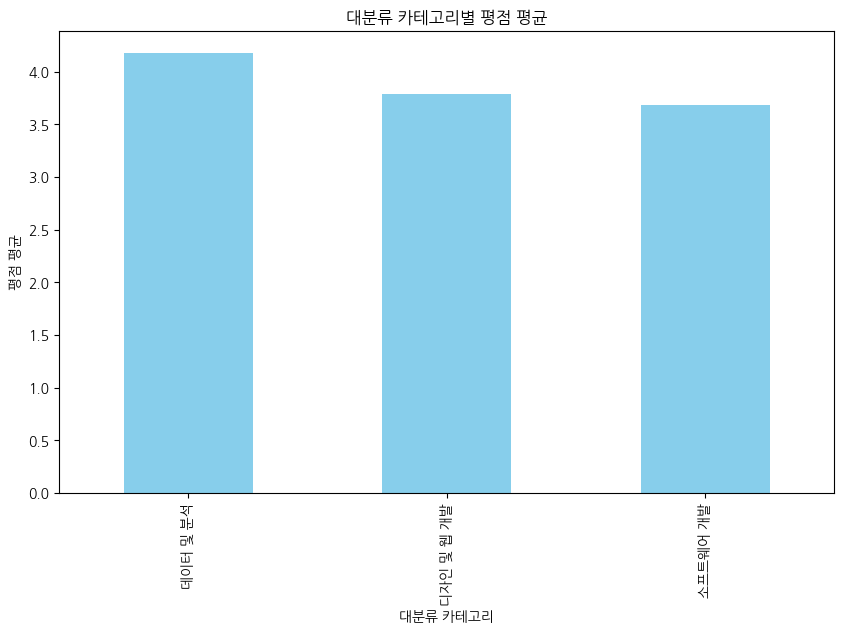

In [100]:
category_rating_summary = sale.groupby('대분류_카테고리')['평점'].mean()

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
category_rating_summary.plot(kind='bar', color='skyblue')
plt.title('대분류 카테고리별 평점 평균')
plt.xlabel('대분류 카테고리')
plt.ylabel('평점 평균')
plt.show()


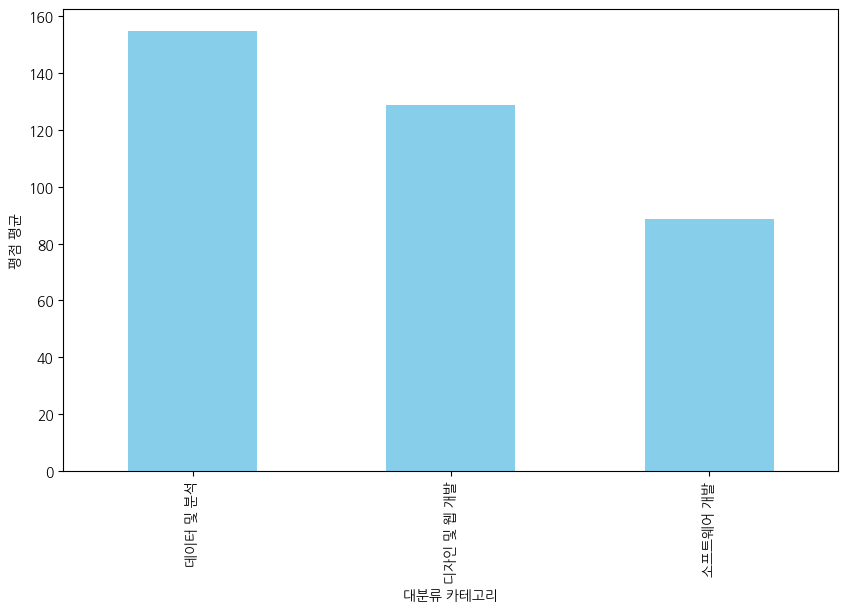

In [103]:
category_rating_summary = sale.groupby('대분류_카테고리')['판매수'].mean()

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
category_rating_summary.plot(kind='bar', color='skyblue')
plt.xlabel('대분류 카테고리')
plt.ylabel('평점 평균')
plt.show()

# 달마다 수익값 평균

In [14]:
import pandas as pd

# Step 1: Filter out rows where '거래취소여부' is not 1.0
filtered_log = log[log['거래취소여부'] != 1.0]

# Step 2: Calculate profit for each transaction as '판매금액' * '수수료율'
filtered_log['수익'] = filtered_log['판매금액'] * (filtered_log['수수료율'] / 100)

# Step 3: Convert '거래일자' to datetime format if it's not already
filtered_log['거래일자'] = pd.to_datetime(filtered_log['거래일자'], format='%Y%m%d')

# Step 4: Group by month and calculate total monthly profit
monthly_profit = filtered_log.groupby(filtered_log['거래일자'].dt.to_period('M'))['수익'].sum().reset_index()
monthly_profit['거래일자'] = monthly_profit['거래일자'].dt.to_timestamp()

# Step 5: Calculate average daily profit for each month
# Determine the number of days in each month to divide appropriately
monthly_profit['일수'] = monthly_profit['거래일자'].dt.days_in_month
monthly_profit['평균 일일 수익'] = monthly_profit['수익'] / monthly_profit['일수']

# Display the monthly average daily profit
monthly_profit = monthly_profit[['거래일자', '평균 일일 수익']]
monthly_profit['평균 일일 수익'] = (monthly_profit['평균 일일 수익'] // 10000).astype(int)
print(monthly_profit)


        거래일자  평균 일일 수익
0 2021-01-01       871
1 2021-02-01       740
2 2021-03-01       861
3 2021-04-01       823
4 2021-05-01       792
5 2021-06-01       897


In [15]:
monthly_profit['평균 일일 수익'].mean()

830.6666666666666